# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [80]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [81]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [82]:
adver_data.head(5)

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [83]:
adver_data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [84]:
import numpy as np


X = np.array([adver_data['TV'].values, adver_data['Radio'].values,  adver_data['Newspaper'].values]).T
y = np.array(adver_data['Sales'])

print X.shape
print y.shape


(200, 3)
(200,)


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [85]:
means, stds = np.mean(X, axis=0), np.std(X, axis=0)

print means
print stds

[ 147.0425   23.264    30.554 ]
[ 85.63933176  14.80964564  21.72410606]


In [86]:
X[:, 0] = (X[:, 0] - means[0]) / stds[0]
X[:, 1] = (X[:, 1] - means[1]) / stds[1]
X[:, 2] = (X[:, 2] - means[2]) / stds[2]

print X.shape

(200, 3)


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [87]:
import numpy as np


x0 = np.ones((X.shape[0], 1))
X = np.hstack((x0, X))


print X
print y

[[  1.00000000e+00   9.69852266e-01   9.81522472e-01   1.77894547e+00]
 [  1.00000000e+00  -1.19737623e+00   1.08280781e+00   6.69578760e-01]
 [  1.00000000e+00  -1.51615499e+00   1.52846331e+00   1.78354865e+00]
 [  1.00000000e+00   5.20496822e-02   1.21785493e+00   1.28640506e+00]
 [  1.00000000e+00   3.94182198e-01  -8.41613655e-01   1.28180188e+00]
 [  1.00000000e+00  -1.61540845e+00   1.73103399e+00   2.04592999e+00]
 [  1.00000000e+00  -1.04557682e+00   6.43904671e-01  -3.24708413e-01]
 [  1.00000000e+00  -3.13436589e-01  -2.47406325e-01  -8.72486994e-01]
 [  1.00000000e+00  -1.61657614e+00  -1.42906863e+00  -1.36042422e+00]
 [  1.00000000e+00   6.16042873e-01  -1.39530685e+00  -4.30581584e-01]
 [  1.00000000e+00  -9.45155670e-01  -1.17923146e+00  -2.92486143e-01]
 [  1.00000000e+00   7.90028350e-01   4.96973404e-02  -1.22232878e+00]
 [  1.00000000e+00  -1.43908760e+00   7.99208859e-01   1.62704048e+00]
 [  1.00000000e+00  -5.78501712e-01  -1.05768905e+00  -1.07502697e+00]
 [  1.

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [88]:
def mserror(y, y_pred):
    return ((y - y_pred) ** 2).sum() / y.shape[0]

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [104]:
y_median = np.median(y)
y_median_pred = np.array([y_median for some in y])

answer1 = mserror(y, y_median_pred)
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [105]:
def normal_equation(X, y):
    return np.linalg.pinv(X).dot(y)

In [106]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[ 14.0225       3.91925365   2.79206274  -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [107]:
answer2 = norm_eq_weights.dot([1, 0, 0, 0])
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.0225


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [108]:
def linear_prediction(X, w):
    return X.dot(w);

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [110]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [124]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    
    l = float(len(y))

    train_y = y[train_ind]
    train_x = X[train_ind, :]
    prediction = train_x.dot(w)
    
    grad0 = (2 / l) * (prediction - train_y)
    grad1 = (2 * train_x[1] / l) * (prediction - train_y)
    grad2 = (2 * train_x[2] / l) * (prediction - train_y)
    grad3 = (2 * train_x[3] / l) * (prediction - train_y)
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [125]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки

        random_ind = np.random.randint(X.shape[0]);
        
        w_updated = stochastic_gradient_step(X, y, w, random_ind, eta);
        
        weight_dist = np.linalg.norm(w_updated - w);
        w = w_updated;
        
        prediction = linear_prediction(X, w)
        errors.append(mserror(y, prediction))
        

        print 'iter=', iter_num, random_ind, w_updated
        iter_num += 1;
        # Ваш код здесь
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [126]:
%%time

stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, [0, 0, 0, 0], eta=0.01, seed=42, max_iter=1e5)

iter= 0 102 [ 0.00148     0.0023012  -0.00131554 -0.00062364]
iter= 1 179 [ 0.00273965  0.00257416 -0.00244372 -0.00137476]
iter= 2 92 [ 0.00467951  0.00417466 -0.00110295  0.00116534]
iter= 3 14 [ 0.00657875  0.00544003  0.00013281  0.00251571]
iter= 4 106 [ 0.00729889  0.00441378 -0.00046354  0.0024874 ]
iter= 5 71 [ 0.00853831  0.00387479 -0.00121374  0.00255279]
iter= 6 188 [ 0.01012707  0.00645269 -0.0022183   0.00058886]
iter= 7 20 [ 0.01192552  0.00795122 -0.0016796   0.0024802 ]
iter= 8 102 [ 0.01340305  0.01024857 -0.00299294  0.0018576 ]
iter= 9 121 [ 0.01410304  0.00920035 -0.00306687  0.00249708]
iter= 10 74 [ 0.01580115  0.01051613 -0.00291368  0.00113276]
iter= 11 87 [ 0.01740018  0.00983755 -0.00104186  0.00353572]
iter= 12 116 [ 0.01861855  0.00972597 -0.00177932  0.00325788]
iter= 13 99 [ 0.02033682  0.00948837  0.00035969  0.00447167]
iter= 14 103 [ 0.0218046   0.01018863 -0.00024132  0.0036167 ]
iter= 15 151 [ 0.02296241  0.00983655 -0.00140337  0.0045838 ]
iter= 16 

iter= 425 142 [ 0.60125613  0.20466016  0.13317688  0.03876759]
iter= 426 91 [ 0.60197345  0.20366808  0.13212273  0.03884836]
iter= 427 97 [ 0.60345779  0.20432425  0.13189581  0.03826389]
iter= 428 65 [ 0.60436373  0.20349868  0.13104161  0.03702726]
iter= 429 31 [ 0.60550522  0.20304359  0.13058962  0.03745004]
iter= 430 190 [ 0.60653871  0.20174578  0.1318343   0.03627241]
iter= 431 85 [ 0.60798564  0.20252564  0.13135908  0.03861331]
iter= 432 50 [ 0.60906953  0.20319337  0.12988331  0.03881518]
iter= 433 152 [ 0.61065952  0.20413202  0.12988718  0.03761823]
iter= 434 185 [ 0.61282739  0.20559915  0.13308357  0.03652512]
iter= 435 62 [ 0.61432148  0.20720871  0.13230029  0.03630133]
iter= 436 189 [ 0.61497227  0.20623341  0.13180971  0.03608701]
iter= 437 124 [ 0.61684562  0.20803716  0.13295272  0.03985078]
iter= 438 149 [ 0.61781835  0.20687471  0.13311929  0.03940507]
iter= 439 57 [ 0.61908537  0.2067143   0.1327716   0.03859123]
iter= 440 57 [ 0.6203522   0.20655391  0.1324239

iter= 703 147 [ 0.97185626  0.31184071  0.20127049  0.03419316]
iter= 704 199 [ 0.97309147  0.31306753  0.20004742  0.03295056]
iter= 705 60 [ 0.97386847  0.31221882  0.19893179  0.03262315]
iter= 706 126 [ 0.97445783  0.31126056  0.19955404  0.03316699]
iter= 707 104 [ 0.97638624  0.31331323  0.20099107  0.03092524]
iter= 708 166 [ 0.97711766  0.31221025  0.20169911  0.03062377]
iter= 709 0 [ 0.97917443  0.31420501  0.20371787  0.03428264]
iter= 710 130 [ 0.97927118  0.31403968  0.20382459  0.03418531]
iter= 711 91 [ 0.97997625  0.31306453  0.20278842  0.0342647 ]
iter= 712 189 [ 0.98061159  0.31211239  0.20230949  0.03405547]
iter= 713 190 [ 0.98161224  0.31085582  0.20351462  0.03291526]
iter= 714 112 [ 0.98292875  0.31129636  0.20281555  0.03120909]
iter= 715 152 [ 0.98447438  0.31220883  0.2028193   0.03004554]
iter= 716 55 [ 0.98668716  0.31354874  0.20672441  0.03304486]
iter= 717 160 [ 0.98802635  0.31394684  0.20625744  0.03305386]
iter= 718 165 [ 0.9891049   0.31504828  0.204

iter= 1062 18 [ 1.42281436  0.43764276  0.2580723   0.08573938]
iter= 1063 19 [ 1.42413536  0.43764673  0.25812903  0.08504289]
iter= 1064 112 [ 1.42541303  0.43807428  0.25745058  0.08338705]
iter= 1065 139 [ 1.42729632  0.4389068   0.26007479  0.08088566]
iter= 1066 46 [ 1.42826454  0.43825851  0.25920109  0.08111501]
iter= 1067 0 [ 1.43024933  0.44018347  0.26114921  0.08464585]
iter= 1068 89 [ 1.43174406  0.43953345  0.26362562  0.08608016]
iter= 1069 141 [ 1.43345749  0.44046695  0.26502971  0.08963304]
iter= 1070 63 [ 1.43473475  0.4398056   0.26557616  0.0883305 ]
iter= 1071 37 [ 1.4360454   0.43869845  0.2678892   0.08924428]
iter= 1072 36 [ 1.43835375  0.44192912  0.2710901   0.08652898]
iter= 1073 125 [ 1.43932363  0.44125139  0.27033932  0.0863212 ]
iter= 1074 138 [ 1.44019249  0.44019583  0.27049397  0.08591909]
iter= 1075 99 [ 1.44173482  0.43998255  0.27241396  0.0870086 ]
iter= 1076 76 [ 1.44238586  0.43907377  0.2714616   0.08671329]
iter= 1077 2 [ 1.44318123  0.4378678

iter= 1386 87 [ 1.82339771  0.54050397  0.31496733  0.12210139]
iter= 1387 77 [ 1.82465018  0.54011578  0.31541015  0.12115852]
iter= 1388 31 [ 1.82568725  0.53970233  0.31499951  0.12154263]
iter= 1389 119 [ 1.82626519  0.53884093  0.31471604  0.12132304]
iter= 1390 45 [ 1.82755601  0.53926383  0.31464945  0.12137925]
iter= 1391 143 [ 1.82847514  0.53880831  0.31355936  0.12154197]
iter= 1392 195 [ 1.82917157  0.53792319  0.31263936  0.12100487]
iter= 1393 164 [ 1.83022949  0.53755454  0.3120276   0.11977993]
iter= 1394 181 [ 1.83126099  0.53841523  0.31078336  0.11963017]
iter= 1395 141 [ 1.83291826  0.53931813  0.31214143  0.12306659]
iter= 1396 54 [ 1.83467876  0.54169572  0.31279953  0.12187905]
iter= 1397 175 [ 1.8370527   0.54529539  0.31690889  0.12310797]
iter= 1398 6 [ 1.8380896   0.54421124  0.31757656  0.12277128]
iter= 1399 73 [ 1.83905424  0.54401251  0.31643251  0.12280441]
iter= 1400 6 [ 1.84009083  0.54292868  0.31709997  0.12246782]
iter= 1401 160 [ 1.84134166  0.5433

iter= 1692 62 [ 2.20020459  0.67041854  0.41242515  0.14888747]
iter= 1693 53 [ 2.20199357  0.67116132  0.41519578  0.15120529]
iter= 1694 116 [ 2.20302809  0.67106658  0.4145696   0.15096938]
iter= 1695 109 [ 2.20471011  0.67319481  0.41498256  0.14902953]
iter= 1696 73 [ 2.20565222  0.67300073  0.41386525  0.14906188]
iter= 1697 106 [ 2.20628242  0.67210264  0.41334337  0.14903711]
iter= 1698 56 [ 2.20670052  0.6714204   0.4134799   0.14924585]
iter= 1699 168 [ 2.20811674  0.67255083  0.41351203  0.15100901]
iter= 1700 2 [ 2.20883776  0.67145765  0.41461409  0.15229499]
iter= 1701 119 [ 2.20940308  0.67061506  0.4143368   0.1520802 ]
iter= 1702 5 [ 2.20990763  0.6698      0.4152102   0.15311248]
iter= 1703 4 [ 2.21096556  0.67021702  0.41431984  0.15446853]
iter= 1704 4 [ 2.21202311  0.67063388  0.41342978  0.1558241 ]
iter= 1705 53 [ 2.21380985  0.67137574  0.41619694  0.15813902]
iter= 1706 46 [ 2.21472723  0.67076147  0.4153691   0.15835633]
iter= 1707 176 [ 2.21643439  0.67278197

iter= 2021 102 [ 2.57718201  0.77423181  0.48321128  0.21298221]
iter= 2022 159 [ 2.57824007  0.77404226  0.48286378  0.21317927]
iter= 2023 40 [ 2.57959424  0.77491918  0.48277563  0.21324447]
iter= 2024 113 [ 2.58089784  0.77587143  0.48254114  0.21205309]
iter= 2025 7 [ 2.58201451  0.77552143  0.48226487  0.21107881]
iter= 2026 71 [ 2.58305811  0.77506759  0.48163319  0.21113386]
iter= 2027 177 [ 2.58399462  0.77532083  0.4806553   0.21133415]
iter= 2028 91 [ 2.58464171  0.77442588  0.47970436  0.211407  ]
iter= 2029 61 [ 2.58661347  0.77705655  0.48229207  0.21359858]
iter= 2030 83 [ 2.58771205  0.77604773  0.48386735  0.21385376]
iter= 2031 61 [ 2.58968247  0.7786766   0.48645331  0.21604385]
iter= 2032 110 [ 2.59071557  0.77962669  0.48540246  0.21727772]
iter= 2033 126 [ 2.59117196  0.77888463  0.48588432  0.21769886]
iter= 2034 6 [ 2.59215006  0.77786195  0.48651413  0.21738126]
iter= 2035 83 [ 2.59324747  0.7768542   0.48808773  0.21763616]
iter= 2036 131 [ 2.5942056   0.77817

iter= 2187 48 [ 2.76879132  0.83957761  0.5346788   0.22951746]
iter= 2188 119 [ 2.76933452  0.83876799  0.53441237  0.22931107]
iter= 2189 43 [ 2.77034699  0.83947565  0.53339619  0.22911747]
iter= 2190 55 [ 2.77226393  0.84063642  0.5367792   0.2317158 ]
iter= 2191 155 [ 2.7725158   0.84021602  0.53658083  0.23142764]
iter= 2192 110 [ 2.77352822  0.84114708  0.53555102  0.23263681]
iter= 2193 133 [ 2.77508681  0.84247123  0.53662828  0.23368041]
iter= 2194 107 [ 2.77582615  0.84198223  0.53548186  0.23343013]
iter= 2195 188 [ 2.77706466  0.84399182  0.53469876  0.23189916]
iter= 2196 147 [ 2.77912459  0.84630476  0.53827849  0.23320259]
iter= 2197 113 [ 2.78040586  0.84724069  0.53804801  0.23203163]
iter= 2198 77 [ 2.78157252  0.8468791   0.53846049  0.23115336]
iter= 2199 129 [ 2.78237844  0.84605621  0.53784752  0.23161879]
iter= 2200 36 [ 2.78447445  0.84898972  0.54075398  0.22915325]
iter= 2201 19 [ 2.78566551  0.8489933   0.54080513  0.22852527]
iter= 2202 25 [ 2.78655589  0.8

iter= 2553 135 [ 3.1818707   0.96884631  0.61568846  0.26178662]
iter= 2554 2 [ 3.1824886   0.96790947  0.61663291  0.26288869]
iter= 2555 143 [ 3.1833268   0.96749406  0.61563882  0.26303709]
iter= 2556 29 [ 3.18416262  0.966748    0.61522886  0.26343129]
iter= 2557 22 [ 3.18456279  0.96612259  0.61502988  0.26378213]
iter= 2558 91 [ 3.18519537  0.96524772  0.61410026  0.26385335]
iter= 2559 114 [ 3.18631205  0.96435005  0.61587493  0.26405619]
iter= 2560 103 [ 3.18745801  0.96489678  0.6154057   0.26338869]
iter= 2561 117 [ 3.18827131  0.9642259   0.61417206  0.2627989 ]
iter= 2562 4 [ 3.18922247  0.96460084  0.61337154  0.26401811]
iter= 2563 103 [ 3.19036803  0.96514736  0.61290248  0.26335084]
iter= 2564 107 [ 3.19108678  0.96467198  0.61178798  0.26310753]
iter= 2565 64 [ 3.19250693  0.9644076   0.61366135  0.2629994 ]
iter= 2566 120 [ 3.19371055  0.9643269   0.61394873  0.26386627]
iter= 2567 29 [ 3.19454492  0.96358213  0.61353948  0.26425979]
iter= 2568 148 [ 3.19539027  0.962

iter= 2792 192 [ 3.42529204  0.99590947  0.63707783  0.24281205]
iter= 2793 86 [ 3.42622983  0.99513481  0.63734606  0.24218379]
iter= 2794 100 [ 3.42702979  0.99583874  0.63632169  0.2428925 ]
iter= 2795 7 [ 3.42807524  0.99551106  0.63606304  0.24198037]
iter= 2796 76 [ 3.42866541  0.99468724  0.63519971  0.24171266]
iter= 2797 199 [ 3.42965097  0.99566609  0.63422385  0.24072122]
iter= 2798 86 [ 3.43058823  0.99489186  0.63449194  0.2400933 ]
iter= 2799 42 [ 3.43215769  0.99757773  0.63496204  0.23801597]
iter= 2800 128 [ 3.43411877  0.99925527  0.63836998  0.23554667]
iter= 2801 108 [ 3.43456557  0.99855646  0.63768018  0.23544478]
iter= 2802 178 [ 3.43534863  0.999742    0.63657171  0.23519773]
iter= 2803 151 [ 3.43623974  0.99947102  0.63567733  0.23594207]
iter= 2804 151 [ 3.4371306   0.99920011  0.63478319  0.2366862 ]
iter= 2805 16 [ 3.43798127  0.99841299  0.63554921  0.23995375]
iter= 2806 132 [ 3.43838364  0.99776158  0.63565615  0.23942673]
iter= 2807 147 [ 3.44034216  0.9

iter= 3045 160 [ 3.68141928  1.03579865  0.66893321  0.24720341]
iter= 3046 144 [ 3.68228136  1.03528684  0.66844051  0.24753461]
iter= 3047 197 [ 3.68324747  1.0356248   0.66752957  0.24646044]
iter= 3048 3 [ 3.68461075  1.03569576  0.66918985  0.24821418]
iter= 3049 147 [ 3.686534    1.03785522  0.67253206  0.24943112]
iter= 3050 46 [ 3.68734962  1.0373091   0.67179605  0.24962433]
iter= 3051 142 [ 3.6888484   1.03859468  0.6728016   0.25013114]
iter= 3052 197 [ 3.68981443  1.03893261  0.67189073  0.24905705]
iter= 3053 46 [ 3.69062975  1.03838669  0.671155    0.24925018]
iter= 3054 77 [ 3.6917079   1.03805253  0.67153619  0.24843854]
iter= 3055 123 [ 3.69285711  1.03773124  0.67241585  0.24747819]
iter= 3056 74 [ 3.69412123  1.03871075  0.67252989  0.24646255]
iter= 3057 102 [ 3.69514048  1.04029554  0.6716239   0.24603306]
iter= 3058 136 [ 3.6958212   1.03933024  0.67234719  0.24536708]
iter= 3059 89 [ 3.69703188  1.03880374  0.67435299  0.24652882]
iter= 3060 143 [ 3.69782927  1.0

iter= 3268 50 [ 3.90425891  1.09701454  0.69401405  0.26452038]
iter= 3269 10 [ 3.90492175  1.09638805  0.69323242  0.26432651]
iter= 3270 11 [ 3.90621351  1.09740858  0.69329661  0.26274756]
iter= 3271 73 [ 3.90702681  1.09724103  0.69233204  0.26277549]
iter= 3272 7 [ 3.90803056  1.09692642  0.69208371  0.26189974]
iter= 3273 151 [ 3.9088807   1.09666789  0.69123045  0.26260985]
iter= 3274 40 [ 3.91008203  1.09744584  0.69115225  0.2626677 ]
iter= 3275 163 [ 3.91143475  1.0977058   0.69238864  0.26122593]
iter= 3276 84 [ 3.91303225  1.09894548  0.69451754  0.26146463]
iter= 3277 71 [ 3.9139694   1.09853794  0.6939503   0.26151407]
iter= 3278 54 [ 3.91544134  1.10052583  0.69450053  0.26052117]
iter= 3279 136 [ 3.91610755  1.09958109  0.69520842  0.25986937]
iter= 3280 46 [ 3.91690615  1.09904637  0.69448778  0.26005854]
iter= 3281 142 [ 3.9183748   1.10030611  0.69547312  0.26055517]
iter= 3282 175 [ 3.92038224  1.10335005  0.69894807  0.26159437]
iter= 3283 103 [ 3.92145142  1.10386

iter= 3513 188 [ 4.14628011  1.1525954   0.74389702  0.27205731]
iter= 3514 136 [ 4.1469265   1.15167877  0.74458385  0.2714249 ]
iter= 3515 67 [ 4.14793172  1.15158789  0.74398898  0.27048309]
iter= 3516 34 [ 4.14867463  1.1511425   0.7428922   0.26969128]
iter= 3517 64 [ 4.14998525  1.15089852  0.74462108  0.26959149]
iter= 3518 7 [ 4.15096827  1.1505904   0.74437788  0.26873382]
iter= 3519 44 [ 4.15153899  1.14977774  0.74447176  0.26906868]
iter= 3520 86 [ 4.15241555  1.14905366  0.74472248  0.26848143]
iter= 3521 174 [ 4.15317066  1.14971811  0.74370966  0.26787475]
iter= 3522 167 [ 4.15399958  1.15029652  0.74269858  0.26744914]
iter= 3523 75 [ 4.15445405  1.14960588  0.74332572  0.26868022]
iter= 3524 181 [ 4.15525625  1.15027523  0.74235807  0.26856375]
iter= 3525 75 [ 4.15571034  1.14958517  0.74298468  0.26979378]
iter= 3526 173 [ 4.15653924  1.14979189  0.74207997  0.26911637]
iter= 3527 46 [ 4.15732116  1.14926833  0.74137438  0.26930159]
iter= 3528 14 [ 4.15866148  1.15016

iter= 3777 115 [ 4.39576347  1.2038738   0.79765888  0.27523012]
iter= 3778 183 [ 4.39758775  1.20686794  0.80009     0.27869375]
iter= 3779 64 [ 4.39886704  1.20662979  0.80177756  0.27859635]
iter= 3780 30 [ 4.40031816  1.20910128  0.80227101  0.27944108]
iter= 3781 131 [ 4.40107562  1.21014635  0.80122947  0.27987503]
iter= 3782 112 [ 4.40208383  1.21048373  0.80069411  0.2785684 ]
iter= 3783 108 [ 4.40249292  1.20984391  0.80006254  0.27847512]
iter= 3784 177 [ 4.40326754  1.21005337  0.79925369  0.27864078]
iter= 3785 68 [ 4.40459176  1.21145055  0.79963246  0.27744884]
iter= 3786 157 [ 4.40528398  1.21147284  0.79860584  0.27724956]
iter= 3787 119 [ 4.40573372  1.21080251  0.79838524  0.27707868]
iter= 3788 87 [ 4.40680943  1.21034601  0.79964446  0.27869522]
iter= 3789 186 [ 4.40752876  1.21028266  0.79861649  0.27856429]
iter= 3790 66 [ 4.40823045  1.20933596  0.79867979  0.27764846]
iter= 3791 74 [ 4.40941102  1.21025073  0.7987863   0.27669994]
iter= 3792 44 [ 4.40996304  1.2

iter= 4020 123 [ 4.62721459  1.2744583   0.82986587  0.28636837]
iter= 4021 143 [ 4.62794838  1.27409464  0.82899561  0.28649828]
iter= 4022 101 [ 4.62947764  1.2767617   0.83034171  0.29145024]
iter= 4023 187 [ 4.6306651   1.2773726   0.83077758  0.29077496]
iter= 4024 65 [ 4.63136647  1.27673345  0.83011627  0.28981757]
iter= 4025 193 [ 4.63276482  1.27705606  0.83188535  0.28808259]
iter= 4026 12 [ 4.63329196  1.27629745  0.83230664  0.28894027]
iter= 4027 183 [ 4.63507338  1.27922124  0.83468064  0.29232253]
iter= 4028 110 [ 4.63588222  1.27996508  0.83385791  0.29328856]
iter= 4029 158 [ 4.63625436  1.27937696  0.83420057  0.29353945]
iter= 4030 33 [ 4.63741289  1.2809808   0.83394523  0.29192603]
iter= 4031 38 [ 4.63808917  1.28015998  0.83410214  0.29206755]
iter= 4032 194 [ 4.63931492  1.28019802  0.83512315  0.29068213]
iter= 4033 135 [ 4.64005426  1.27934556  0.83630811  0.28993156]
iter= 4034 119 [ 4.64049297  1.27869167  0.83609293  0.28976488]
iter= 4035 125 [ 4.6412492   

iter= 4302 89 [ 4.89298213  1.34992922  0.92016365  0.33677772]
iter= 4303 198 [ 4.8946559   1.35259817  0.92228118  0.33952414]
iter= 4304 105 [ 4.89591234  1.35246403  0.92424401  0.34116934]
iter= 4305 184 [ 4.89702728  1.35385391  0.92409615  0.34114091]
iter= 4306 25 [ 4.8976951   1.35475738  0.92320492  0.3408011 ]
iter= 4307 24 [ 4.89839509  1.35406472  0.92270088  0.34040625]
iter= 4308 137 [ 4.8997042   1.35600085  0.92319908  0.34216261]
iter= 4309 44 [ 4.90022205  1.35526348  0.92328426  0.34246645]
iter= 4310 82 [ 4.90099098  1.35461933  0.92313037  0.34253533]
iter= 4311 10 [ 4.90160779  1.35403635  0.922403    0.34235492]
iter= 4312 180 [ 4.90231629  1.35411542  0.92141443  0.34162913]
iter= 4313 199 [ 4.90315717  1.35495059  0.92058182  0.34078323]
iter= 4314 103 [ 4.90412975  1.3554146   0.92018358  0.34021671]
iter= 4315 67 [ 4.90507793  1.35532887  0.91962247  0.33932834]
iter= 4316 94 [ 4.90588838  1.35495371  0.9191155   0.33859511]
iter= 4317 155 [ 4.90605508  1.35

iter= 4558 53 [ 5.12841786  1.43153008  0.97838896  0.36746821]
iter= 4559 69 [ 5.12988776  1.43272738  0.98043714  0.36724128]
iter= 4560 100 [ 5.13051171  1.43327642  0.97963816  0.36779405]
iter= 4561 56 [ 5.13073218  1.43291666  0.97971015  0.36790413]
iter= 4562 137 [ 5.13200054  1.43479252  0.98019284  0.36960581]
iter= 4563 167 [ 5.13274576  1.43531252  0.97928387  0.36922319]
iter= 4564 134 [ 5.13333611  1.43455326  0.9798952   0.37017556]
iter= 4565 102 [ 5.13418242  1.43586916  0.97914293  0.36981895]
iter= 4566 165 [ 5.13475136  1.43645017  0.97837983  0.37123959]
iter= 4567 84 [ 5.13616048  1.43754367  0.98025769  0.37145014]
iter= 4568 60 [ 5.13677028  1.43687759  0.97938212  0.37119319]
iter= 4569 2 [ 5.13718856  1.43624342  0.98002144  0.3719392 ]
iter= 4570 127 [ 5.13785745  1.43572135  0.9789707   0.37128171]
iter= 4571 178 [ 5.13845659  1.43662844  0.97812258  0.37109268]
iter= 4572 85 [ 5.1393574   1.43711396  0.97782672  0.37255004]
iter= 4573 46 [ 5.14007911  1.436

iter= 4844 21 [ 5.37065895  1.48024773  1.02432432  0.36994537]
iter= 4845 99 [ 5.37170871  1.48010257  1.02563112  0.37068692]
iter= 4846 97 [ 5.37268638  1.48053476  1.02548166  0.37030195]
iter= 4847 157 [ 5.37331709  1.48055507  1.02454626  0.37012038]
iter= 4848 24 [ 5.37399092  1.4798883   1.02406106  0.36974029]
iter= 4849 27 [ 5.37494113  1.48092081  1.0236399   0.36940551]
iter= 4850 192 [ 5.37534885  1.48030265  1.02311231  0.36942514]
iter= 4851 112 [ 5.37627398  1.48061223  1.02262106  0.36822618]
iter= 4852 44 [ 5.37675876  1.47992196  1.02270079  0.36851061]
iter= 4853 67 [ 5.37766951  1.47983962  1.02216183  0.3676573 ]
iter= 4854 6 [ 5.37841259  1.47906267  1.02264031  0.36741601]
iter= 4855 48 [ 5.37923513  1.47983256  1.02222575  0.36814851]
iter= 4856 136 [ 5.37978446  1.47905357  1.02280944  0.36761107]
iter= 4857 163 [ 5.38096375  1.4792802   1.02388731  0.36635416]
iter= 4858 82 [ 5.38169679  1.47866611  1.0237406   0.36641982]
iter= 4859 128 [ 5.38337037  1.48009

iter= 5197 82 [ 5.66359352  1.55978841  1.07853302  0.36097794]
iter= 5198 2 [ 5.66396441  1.55922607  1.07909993  0.36163945]
iter= 5199 181 [ 5.66462333  1.55977587  1.07830511  0.36154379]
iter= 5200 63 [ 5.66552837  1.55930726  1.07869231  0.36062084]
iter= 5201 39 [ 5.66685686  1.56056312  1.07998729  0.36070927]
iter= 5202 58 [ 5.66835007  1.5616748   1.08264267  0.36120045]
iter= 5203 182 [ 5.66894871  1.56103979  1.08193269  0.36117691]
iter= 5204 61 [ 5.67041141  1.56299128  1.08385232  0.36280268]
iter= 5205 131 [ 5.67102698  1.56384058  1.0830059   0.36315534]
iter= 5206 59 [ 5.67217356  1.56469286  1.08348869  0.36203358]
iter= 5207 115 [ 5.67287501  1.56410359  1.08404457  0.36274866]
iter= 5208 74 [ 5.6739059   1.56490237  1.08413757  0.36192041]
iter= 5209 121 [ 5.67425123  1.56438524  1.0841011   0.36223589]
iter= 5210 106 [ 5.67471794  1.56372014  1.08371461  0.36221754]
iter= 5211 95 [ 5.67571253  1.56390895  1.08427444  0.36324059]
iter= 5212 90 [ 5.67645822  1.56379

iter= 5476 25 [ 5.89812951  1.63938713  1.14417971  0.36410912]
iter= 5477 74 [ 5.8991316   1.6401636   1.14427011  0.363304  ]
iter= 5478 199 [ 5.89986863  1.64089562  1.14354032  0.36256256]
iter= 5479 107 [ 5.90044677  1.64051324  1.14264386  0.36236685]
iter= 5480 167 [ 5.90112023  1.64098317  1.14182241  0.36202107]
iter= 5481 42 [ 5.90233301  1.64305863  1.14218568  0.36041584]
iter= 5482 149 [ 5.90294608  1.64232598  1.14229066  0.36013493]
iter= 5483 147 [ 5.90449009  1.64405963  1.14497381  0.3611119 ]
iter= 5484 7 [ 5.905331    1.64379605  1.14476577  0.36037821]
iter= 5485 28 [ 5.9064182   1.64508787  1.14504737  0.35999517]
iter= 5486 39 [ 5.90770803  1.64630719  1.14630466  0.36008102]
iter= 5487 157 [ 5.90830233  1.64632632  1.14542326  0.35990993]
iter= 5488 127 [ 5.90893531  1.64583228  1.14442894  0.35928774]
iter= 5489 83 [ 5.9096831   1.64514558  1.14550122  0.35946143]
iter= 5490 115 [ 5.91036292  1.64457449  1.14603995  0.36015445]
iter= 5491 182 [ 5.91095366  1.64

iter= 5772 138 [ 6.13320286  1.71018297  1.20230927  0.40526897]
iter= 5773 102 [ 6.13392757  1.71130981  1.20166509  0.4049636 ]
iter= 5774 170 [ 6.1344654   1.71070037  1.2012415   0.4046627 ]
iter= 5775 94 [ 6.13519289  1.71036362  1.20078642  0.40400453]
iter= 5776 16 [ 6.13572432  1.70987189  1.20126497  0.40604583]
iter= 5777 159 [ 6.13646327  1.7097395   1.20102227  0.40618345]
iter= 5778 84 [ 6.13772082  1.71071538  1.20269814  0.40637136]
iter= 5779 167 [ 6.13837524  1.71117202  1.20189992  0.40603535]
iter= 5780 150 [ 6.13916829  1.71240973  1.20139848  0.40627066]
iter= 5781 55 [ 6.14055359  1.71324858  1.20384325  0.40814837]
iter= 5782 133 [ 6.14164345  1.7141745   1.20459653  0.40887812]
iter= 5783 85 [ 6.1424303   1.7145986   1.2043381   0.41015113]
iter= 5784 177 [ 6.14305668  1.71476797  1.20368405  0.41028509]
iter= 5785 101 [ 6.14428451  1.71690934  1.20476482  0.41426097]
iter= 5786 164 [ 6.14503754  1.71664693  1.20432936  0.41338904]
iter= 5787 191 [ 6.14570453  1

iter= 6027 134 [ 6.33389547  1.78108227  1.25353314  0.41069252]
iter= 6028 127 [ 6.33451838  1.78059608  1.25255463  0.41008022]
iter= 6029 43 [ 6.33518403  1.78106133  1.25188654  0.40995294]
iter= 6030 118 [ 6.33597783  1.78086351  1.25261743  0.41173047]
iter= 6031 142 [ 6.33710352  1.78182907  1.25337267  0.41211112]
iter= 6032 18 [ 6.33780841  1.78118835  1.25324111  0.41171351]
iter= 6033 62 [ 6.33862461  1.78206763  1.25281322  0.41159125]
iter= 6034 162 [ 6.33944776  1.78246515  1.25252619  0.41140354]
iter= 6035 80 [ 6.34012742  1.78190451  1.25268388  0.41114531]
iter= 6036 162 [ 6.34095041  1.78230196  1.25239691  0.41095763]
iter= 6037 146 [ 6.34161899  1.78302845  1.25167622  0.41028506]
iter= 6038 147 [ 6.34308115  1.78467019  1.25421714  0.41121024]
iter= 6039 99 [ 6.34400634  1.78454225  1.25536888  0.4118638 ]
iter= 6040 162 [ 6.34482892  1.7849395   1.25508205  0.41167622]
iter= 6041 159 [ 6.34554997  1.78481032  1.25484523  0.41181051]
iter= 6042 121 [ 6.34585832  1

iter= 6300 4 [ 6.53837236  1.82876947  1.29049246  0.41691011]
iter= 6301 147 [ 6.53980254  1.83037531  1.29297782  0.41781507]
iter= 6302 86 [ 6.54049077  1.8298068   1.29317467  0.41735399]
iter= 6303 125 [ 6.54113363  1.82935759  1.29267704  0.41721627]
iter= 6304 74 [ 6.54205963  1.83007509  1.29276058  0.41647229]
iter= 6305 164 [ 6.54278217  1.82982331  1.29234275  0.41563566]
iter= 6306 21 [ 6.54335683  1.83042963  1.29163793  0.41544907]
iter= 6307 185 [ 6.54466912  1.83131774  1.29357283  0.41478737]
iter= 6308 67 [ 6.54548663  1.83124383  1.29308905  0.41402142]
iter= 6309 43 [ 6.54613178  1.83169476  1.29244153  0.41389806]
iter= 6310 33 [ 6.54704972  1.83296554  1.29223921  0.4126197 ]
iter= 6311 76 [ 6.54754862  1.83226913  1.2915094   0.4123934 ]
iter= 6312 41 [ 6.54843592  1.83257951  1.29211668  0.41272611]
iter= 6313 136 [ 6.54889403  1.83192987  1.29260345  0.41227791]
iter= 6314 105 [ 6.54992278  1.83182005  1.29421059  0.41362497]
iter= 6315 94 [ 6.55062096  1.83149

iter= 6532 71 [ 6.7128249   1.86686449  1.32242587  0.40793677]
iter= 6533 128 [ 6.71428548  1.8681139   1.32496404  0.40609768]
iter= 6534 171 [ 6.71501563  1.86826274  1.32484749  0.40666387]
iter= 6535 86 [ 6.71568781  1.86770749  1.32503976  0.40621355]
iter= 6536 95 [ 6.71655441  1.867872    1.32552755  0.40710497]
iter= 6537 74 [ 6.71745878  1.86857275  1.32560913  0.40637837]
iter= 6538 166 [ 6.71775724  1.86812267  1.32589805  0.40625535]
iter= 6539 53 [ 6.71886992  1.86858466  1.32762128  0.40769695]
iter= 6540 87 [ 6.71966065  1.8682491   1.3285469   0.40888523]
iter= 6541 156 [ 6.72041554  1.86778066  1.32957839  0.40957833]
iter= 6542 53 [ 6.72152697  1.86824213  1.33129968  0.41101831]
iter= 6543 15 [ 6.72272738  1.86891996  1.33328036  0.41225309]
iter= 6544 98 [ 6.72407323  1.87116186  1.33501029  0.41353214]
iter= 6545 19 [ 6.72487633  1.87116427  1.33504478  0.41310871]
iter= 6546 45 [ 6.72563762  1.87141369  1.3350055   0.41314186]
iter= 6547 194 [ 6.72662475  1.87144

iter= 6803 165 [ 6.90786641  1.91685557  1.35351209  0.42440063]
iter= 6804 164 [ 6.90855983  1.91661394  1.3531111   0.42359773]
iter= 6805 185 [ 6.90982112  1.91746753  1.3549708   0.42296175]
iter= 6806 160 [ 6.9105601   1.9176872   1.35471312  0.42296672]
iter= 6807 107 [ 6.91109026  1.91733655  1.35389105  0.42278725]
iter= 6808 186 [ 6.91164721  1.9172875   1.35309512  0.42268587]
iter= 6809 94 [ 6.91231768  1.91697714  1.35267572  0.4220793 ]
iter= 6810 121 [ 6.91258924  1.91657049  1.35264704  0.42232737]
iter= 6811 10 [ 6.91311099  1.91607736  1.35203178  0.42217477]
iter= 6812 67 [ 6.91389656  1.91600633  1.35156689  0.42143874]
iter= 6813 122 [ 6.91441242  1.91646989  1.35084015  0.42108365]
iter= 6814 195 [ 6.91493547  1.91580512  1.35014918  0.42068026]
iter= 6815 112 [ 6.91571608  1.91606633  1.34973467  0.4196686 ]
iter= 6816 97 [ 6.91652697  1.91642479  1.34961071  0.41934931]
iter= 6817 92 [ 6.91746901  1.91720203  1.35026182  0.42058284]
iter= 6818 21 [ 6.91800424  1.

iter= 7054 20 [ 7.07983391  1.96156707  1.36928972  0.42285612]
iter= 7055 89 [ 7.0806138   1.96122791  1.3705818   0.42360448]
iter= 7056 39 [ 7.08173391  1.96228679  1.37167365  0.42367904]
iter= 7057 111 [ 7.0828667   1.96353887  1.37280081  0.42329557]
iter= 7058 44 [ 7.08324059  1.96300649  1.37286231  0.42351493]
iter= 7059 76 [ 7.08371632  1.96234244  1.37216641  0.42329915]
iter= 7060 176 [ 7.08475141  1.96356751  1.37265119  0.42281057]
iter= 7061 86 [ 7.0853942   1.96303653  1.37283504  0.42237994]
iter= 7062 147 [ 7.08673995  1.96454757  1.37517367  0.42323147]
iter= 7063 100 [ 7.08716701  1.96492335  1.37462682  0.42360981]
iter= 7064 116 [ 7.08778915  1.96486638  1.37425025  0.42346793]
iter= 7065 91 [ 7.08827931  1.96418847  1.37352992  0.42352312]
iter= 7066 144 [ 7.08888932  1.96382632  1.37318129  0.42375748]
iter= 7067 27 [ 7.08963283  1.96463423  1.37285174  0.42349552]
iter= 7068 168 [ 7.09042121  1.96526352  1.37286963  0.42447703]
iter= 7069 193 [ 7.09150581  1.96

iter= 7269 125 [ 7.23239251  2.00531977  1.40033559  0.42965233]
iter= 7270 27 [ 7.23311857  2.00610872  1.40001378  0.42939652]
iter= 7271 130 [ 7.23278683  2.0066756   1.39964785  0.42973024]
iter= 7272 74 [ 7.23362996  2.0073289   1.39972391  0.42905283]
iter= 7273 165 [ 7.23397221  2.00767842  1.39926486  0.42990744]
iter= 7274 188 [ 7.23465467  2.00878576  1.39883335  0.42906383]
iter= 7275 77 [ 7.23539631  2.00855591  1.39909556  0.42850552]
iter= 7276 178 [ 7.23576024  2.0091069   1.39858038  0.4283907 ]
iter= 7277 89 [ 7.23652122  2.00877597  1.39984113  0.42912092]
iter= 7278 175 [ 7.23792844  2.01090978  1.40227708  0.4298494 ]
iter= 7279 20 [ 7.23874988  2.01159424  1.40252313  0.43071327]
iter= 7280 53 [ 7.23978947  2.01202587  1.40413316  0.43206017]
iter= 7281 183 [ 7.24108611  2.01415401  1.40586112  0.434522  ]
iter= 7282 102 [ 7.2416721   2.01506515  1.40534024  0.43427508]
iter= 7283 58 [ 7.24291372  2.01598952  1.40754821  0.4346835 ]
iter= 7284 71 [ 7.2436      2.01

iter= 7557 60 [ 7.43019862  2.08529265  1.45631411  0.44939536]
iter= 7558 53 [ 7.43120525  2.0857106   1.45787311  0.45069956]
iter= 7559 167 [ 7.43173756  2.08608204  1.45722383  0.45042626]
iter= 7560 25 [ 7.43212956  2.08661236  1.45670069  0.45022679]
iter= 7561 79 [ 7.43273052  2.08639452  1.45606912  0.45002059]
iter= 7562 64 [ 7.43363744  2.08622569  1.45726547  0.44995154]
iter= 7563 99 [ 7.43442973  2.08611613  1.45825176  0.45051122]
iter= 7564 73 [ 7.43500066  2.08599851  1.45757465  0.45053083]
iter= 7565 191 [ 7.43559502  2.08550199  1.45707443  0.44985904]
iter= 7566 170 [ 7.4360677   2.08496636  1.45670214  0.44959459]
iter= 7567 16 [ 7.43646315  2.08460046  1.45705824  0.45111356]
iter= 7568 120 [ 7.4372162   2.08454996  1.45723804  0.45165592]
iter= 7569 186 [ 7.43773731  2.08450407  1.45649334  0.45156107]
iter= 7570 22 [ 7.43791215  2.08423082  1.4564064   0.45171436]
iter= 7571 134 [ 7.43829272  2.08374135  1.45680051  0.45232832]
iter= 7572 171 [ 7.4389446   2.083

iter= 7862 43 [ 7.62295775  2.12863563  1.49028107  0.45368999]
iter= 7863 133 [ 7.62384122  2.12938621  1.49089171  0.45428154]
iter= 7864 191 [ 7.62442355  2.12889974  1.49040161  0.45362336]
iter= 7865 99 [ 7.62519297  2.12879334  1.49135943  0.45416688]
iter= 7866 21 [ 7.6256535   2.12927925  1.49079459  0.45401734]
iter= 7867 17 [ 7.62677967  2.13104607  1.49203683  0.45532609]
iter= 7868 11 [ 7.62763688  2.13172329  1.49207943  0.4542783 ]
iter= 7869 179 [ 7.62824864  2.13185586  1.49153151  0.45391351]
iter= 7870 122 [ 7.62869562  2.13225752  1.49090181  0.45360583]
iter= 7871 116 [ 7.62927286  2.13220466  1.49055241  0.45347419]
iter= 7872 50 [ 7.62971308  2.13247585  1.48995303  0.45355618]
iter= 7873 70 [ 7.63055967  2.13299047  1.49037239  0.45387363]
iter= 7874 47 [ 7.631727    2.13425619  1.4918098   0.45322592]
iter= 7875 18 [ 7.63234123  2.13369788  1.49169516  0.45287945]
iter= 7876 5 [ 7.6322918   2.13377773  1.4916096   0.45277832]
iter= 7877 83 [ 7.63286012  2.133255

iter= 8187 142 [ 7.82551002  2.1931203   1.530926    0.4546192 ]
iter= 8188 4 [ 7.82600159  2.19331406  1.53051229  0.4552493 ]
iter= 8189 82 [ 7.82655928  2.19284687  1.53040067  0.45529926]
iter= 8190 181 [ 7.82700487  2.19321867  1.52986319  0.45523456]
iter= 8191 50 [ 7.82742687  2.19347864  1.5292886   0.45531316]
iter= 8192 9 [ 7.82780199  2.19370973  1.5287652   0.45515164]
iter= 8193 139 [ 7.82883967  2.19416844  1.53021112  0.4537734 ]
iter= 8194 3 [ 7.82965063  2.19421065  1.53119875  0.45481662]
iter= 8195 94 [ 7.83025617  2.19393035  1.53081997  0.45426879]
iter= 8196 145 [ 7.83078632  2.19388861  1.53005519  0.45374279]
iter= 8197 79 [ 7.83135913  2.19368098  1.5294532   0.45354625]
iter= 8198 35 [ 7.83173197  2.1943064   1.52897074  0.45316775]
iter= 8199 24 [ 7.83227159  2.19377244  1.52858217  0.45286336]
iter= 8200 97 [ 7.83298258  2.19408674  1.52847348  0.4525834 ]
iter= 8201 163 [ 7.83386566  2.19425644  1.52928061  0.45164221]
iter= 8202 100 [ 7.834215    2.1945638

iter= 8464 108 [ 7.9904967   2.24031158  1.54598549  0.43745307]
iter= 8465 75 [ 7.99057627  2.24019066  1.54609529  0.43766861]
iter= 8466 147 [ 7.99176931  2.24153022  1.54816853  0.43842351]
iter= 8467 64 [ 7.99261098  2.24137354  1.54927881  0.43835943]
iter= 8468 176 [ 7.99351457  2.24244298  1.549702    0.43793292]
iter= 8469 108 [ 7.99384518  2.24192589  1.54919158  0.43785753]
iter= 8470 128 [ 7.99510994  2.24300779  1.55138945  0.43626501]
iter= 8471 9 [ 7.9954675   2.24322806  1.55089054  0.43611105]
iter= 8472 46 [ 7.99600777  2.2428663   1.55040301  0.43623903]
iter= 8473 122 [ 7.99641507  2.24323231  1.5498292   0.43595866]
iter= 8474 58 [ 7.99753848  2.24406868  1.55182695  0.4363282 ]
iter= 8475 95 [ 7.99825389  2.24420449  1.55222964  0.43706409]
iter= 8476 189 [ 7.9985918   2.24369809  1.55197492  0.43695282]
iter= 8477 102 [ 7.99907944  2.24445631  1.55154146  0.43674734]
iter= 8478 123 [ 7.99978002  2.24426044  1.55207772  0.43616189]
iter= 8479 85 [ 8.00035949  2.24

iter= 8793 1 [ 8.18768991  2.29587098  1.59632173  0.45079792]
iter= 8794 161 [ 8.18819157  2.29551165  1.59674637  0.4512308 ]
iter= 8795 187 [ 8.18895171  2.29590271  1.59702539  0.45079853]
iter= 8796 188 [ 8.18950698  2.2968037   1.59667429  0.45011213]
iter= 8797 158 [ 8.18960365  2.29665092  1.5967633   0.4501773 ]
iter= 8798 9 [ 8.18994539  2.29686144  1.59628647  0.45003016]
iter= 8799 113 [ 8.19061846  2.2973531   1.5961654   0.44941503]
iter= 8800 75 [ 8.19067652  2.29726487  1.59624552  0.44957231]
iter= 8801 163 [ 8.19151533  2.29742606  1.59701219  0.4486783 ]
iter= 8802 84 [ 8.19246836  2.29816563  1.59828225  0.4488207 ]
iter= 8803 48 [ 8.1929546   2.29862074  1.59803719  0.4492537 ]
iter= 8804 69 [ 8.19396233  2.29944159  1.59944138  0.44909812]
iter= 8805 176 [ 8.19483707  2.30047688  1.59985106  0.44868523]
iter= 8806 130 [ 8.19443936  2.3011565   1.59941236  0.44908532]
iter= 8807 132 [ 8.19457877  2.30093081  1.59944941  0.44890272]
iter= 8808 188 [ 8.19513259  2.30

iter= 9010 67 [ 8.3150471   2.34304191  1.6262857   0.44840361]
iter= 9011 35 [ 8.31535852  2.34356431  1.62588271  0.44808745]
iter= 9012 179 [ 8.31590854  2.3436835   1.6253901   0.44775948]
iter= 9013 180 [ 8.31637346  2.34373538  1.6247414   0.44728323]
iter= 9014 177 [ 8.31680853  2.34385303  1.6242871   0.44737627]
iter= 9015 168 [ 8.31744038  2.34435738  1.62430144  0.44816291]
iter= 9016 145 [ 8.31793588  2.34431836  1.62358665  0.44767129]
iter= 9017 21 [ 8.3183204   2.34472408  1.62311503  0.44754644]
iter= 9018 65 [ 8.31884638  2.34424476  1.62261908  0.44682846]
iter= 9019 20 [ 8.31952357  2.34480902  1.62282193  0.44754063]
iter= 9020 99 [ 8.32021041  2.34471404  1.62367695  0.44802581]
iter= 9021 127 [ 8.32074049  2.3443003   1.62284425  0.44750476]
iter= 9022 43 [ 8.321206    2.34462567  1.62237704  0.44741575]
iter= 9023 102 [ 8.32165239  2.34531974  1.62198025  0.44722765]
iter= 9024 46 [ 8.32217303  2.34497112  1.62151043  0.44735098]
iter= 9025 38 [ 8.32258845  2.344

iter= 9315 191 [ 8.48269839  2.39523523  1.65015575  0.44961215]
iter= 9316 146 [ 8.48313296  2.39570744  1.64968731  0.44917499]
iter= 9317 66 [ 8.48360161  2.39507514  1.64972958  0.44856331]
iter= 9318 102 [ 8.48402639  2.39573562  1.649352    0.44838432]
iter= 9319 72 [ 8.48430916  2.39533859  1.6495379   0.44823783]
iter= 9320 115 [ 8.48474554  2.39497201  1.64988371  0.44868268]
iter= 9321 132 [ 8.48486971  2.39477099  1.64991671  0.44852005]
iter= 9322 66 [ 8.48533798  2.39413921  1.64995896  0.44790887]
iter= 9323 138 [ 8.48573167  2.39366092  1.65002903  0.44772667]
iter= 9324 120 [ 8.4863775   2.39361762  1.65018323  0.44819181]
iter= 9325 93 [ 8.48722497  2.39464537  1.65094065  0.44982035]
iter= 9326 195 [ 8.48769338  2.39405005  1.65032187  0.44945911]
iter= 9327 196 [ 8.48821343  2.39372916  1.64967701  0.44892158]
iter= 9328 128 [ 8.48939969  2.39474392  1.65173848  0.4474279 ]
iter= 9329 90 [ 8.48995497  2.39466129  1.65104993  0.44688463]
iter= 9330 91 [ 8.49040477  2.

iter= 9590 30 [ 8.63047678  2.43957689  1.67138591  0.44214652]
iter= 9591 58 [ 8.63150034  2.44033892  1.67320611  0.44248322]
iter= 9592 28 [ 8.63220947  2.44118152  1.67338979  0.44223337]
iter= 9593 105 [ 8.63297299  2.44110001  1.67458257  0.44323313]
iter= 9594 16 [ 8.63326452  2.44083026  1.67484509  0.44435295]
iter= 9595 141 [ 8.63395882  2.44120853  1.67541405  0.44579263]
iter= 9596 163 [ 8.6347429   2.4413592   1.67613069  0.44495695]
iter= 9597 185 [ 8.6357495   2.44204043  1.67761488  0.44444938]
iter= 9598 23 [ 8.63628521  2.44254874  1.67738467  0.44434201]
iter= 9599 108 [ 8.6366027   2.44205217  1.67689451  0.44426961]
iter= 9600 190 [ 8.63697437  2.44158544  1.67734213  0.44384611]
iter= 9601 90 [ 8.63751842  2.44150449  1.67666751  0.44331383]
iter= 9602 24 [ 8.638012    2.44101608  1.6763121   0.44303542]
iter= 9603 186 [ 8.63844732  2.44097774  1.67569     0.44295619]
iter= 9604 31 [ 8.63892073  2.440789    1.67550254  0.44313153]
iter= 9605 115 [ 8.63934393  2.44

iter= 9941 52 [ 8.81047676  2.48011911  1.70913683  0.43154638]
iter= 9942 55 [ 8.81145541  2.48071171  1.71086395  0.43287289]
iter= 9943 103 [ 8.81202118  2.48098164  1.71063229  0.43254334]
iter= 9944 128 [ 8.81315494  2.48195148  1.71260252  0.43111576]
iter= 9945 55 [ 8.81413266  2.48254352  1.714328    0.43244101]
iter= 9946 117 [ 8.81468743  2.4820859   1.7134865   0.4320387 ]
iter= 9947 131 [ 8.81494437  2.4824404   1.7131332   0.4321859 ]
iter= 9948 29 [ 8.8153981   2.48203539  1.71291065  0.4323999 ]
iter= 9949 11 [ 8.81610481  2.48259372  1.71294577  0.43153607]
iter= 9950 34 [ 8.81662092  2.4822843   1.71218382  0.43098599]
iter= 9951 76 [ 8.81704577  2.48169126  1.71156234  0.43079328]
iter= 9952 179 [ 8.81754927  2.48180037  1.71111139  0.43049304]
iter= 9953 158 [ 8.81760316  2.4817152   1.71116101  0.43052937]
iter= 9954 101 [ 8.81837855  2.4830675   1.71184353  0.43304019]
iter= 9955 86 [ 8.81888187  2.48265173  1.7119875   0.43270299]
iter= 9956 195 [ 8.81933504  2.48

iter= 10247 171 [ 8.96968687  2.53410127  1.74690765  0.43256267]
iter= 10248 123 [ 8.97028318  2.53393455  1.74736409  0.43206435]
iter= 10249 18 [ 8.97080346  2.53346164  1.74726699  0.43177088]
iter= 10250 198 [ 8.9717605   2.53498771  1.74847777  0.43334124]
iter= 10251 101 [ 8.97250699  2.5362896   1.74913485  0.43575848]
iter= 10252 135 [ 8.97282607  2.5359217   1.74964626  0.43543455]
iter= 10253 76 [ 8.97324846  2.53533209  1.74902836  0.43524295]
iter= 10254 193 [ 8.97408538  2.53552517  1.75008716  0.43420456]
iter= 10255 40 [ 8.97469308  2.53591869  1.7500476   0.43423382]
iter= 10256 197 [ 8.97520019  2.53609609  1.74956944  0.43366998]
iter= 10257 60 [ 8.97565916  2.53559476  1.74891044  0.43347658]
iter= 10258 25 [ 8.97587402  2.53588543  1.7486237   0.43336725]
iter= 10259 70 [ 8.97654942  2.53629598  1.74895826  0.43362051]
iter= 10260 102 [ 8.97691114  2.53685841  1.74863674  0.43346809]
iter= 10261 69 [ 8.97779984  2.5375823   1.74987507  0.43333088]
iter= 10262 106 [

iter= 10567 80 [ 9.13333758  2.5801331   1.79505425  0.42540458]
iter= 10568 191 [ 9.13382894  2.57972261  1.79464071  0.42484921]
iter= 10569 61 [ 9.13470863  2.58089627  1.79579521  0.42582697]
iter= 10570 71 [ 9.13525385  2.58065917  1.7954652   0.42585573]
iter= 10571 188 [ 9.13567776  2.581347    1.79519717  0.42533172]
iter= 10572 124 [ 9.13629066  2.58193713  1.79557112  0.42656311]
iter= 10573 160 [ 9.1368026   2.58208931  1.79539261  0.42656655]
iter= 10574 65 [ 9.13728174  2.58165267  1.79494083  0.42591251]
iter= 10575 29 [ 9.1377164   2.58126469  1.79472764  0.42611752]
iter= 10576 19 [ 9.13827662  2.58126637  1.79475169  0.42582215]
iter= 10577 187 [ 9.13891833  2.5815965   1.79498724  0.42545722]
iter= 10578 81 [ 9.13917467  2.58187415  1.79465553  0.4255321 ]
iter= 10579 106 [ 9.13949898  2.58141198  1.79438697  0.42551935]
iter= 10580 151 [ 9.13996808  2.58126933  1.79391615  0.42591119]
iter= 10581 131 [ 9.14019022  2.58157581  1.7936107   0.42603845]
iter= 10582 36 [ 

iter= 10915 125 [ 9.31260749  2.64493062  1.84114169  0.42106977]
iter= 10916 57 [ 9.31310728  2.64486734  1.84100454  0.42074874]
iter= 10917 141 [ 9.31371377  2.64519777  1.84150153  0.42200632]
iter= 10918 124 [ 9.31430056  2.64576276  1.84185956  0.42318524]
iter= 10919 111 [ 9.31508775  2.64663284  1.84264284  0.42291877]
iter= 10920 83 [ 9.31548523  2.64626783  1.8432128   0.42301109]
iter= 10921 142 [ 9.31619873  2.64687984  1.8436915   0.42325236]
iter= 10922 95 [ 9.31675955  2.6469863   1.84400717  0.42382924]
iter= 10923 32 [ 9.317214    2.64672181  1.84333931  0.42381765]
iter= 10924 144 [ 9.31766848  2.64645199  1.84307957  0.42399225]
iter= 10925 151 [ 9.31812676  2.64631263  1.84261961  0.42437505]
iter= 10926 157 [ 9.31848192  2.64632407  1.84209288  0.4242728 ]
iter= 10927 189 [ 9.3187695   2.64589309  1.84187609  0.4241781 ]
iter= 10928 140 [ 9.31926752  2.64546484  1.84166545  0.42377338]
iter= 10929 189 [ 9.31955484  2.64503425  1.84144885  0.42367877]
iter= 10930 46

iter= 11179 30 [ 9.43221776  2.65959173  1.85279147  0.43159453]
iter= 11180 134 [ 9.4324351   2.6593122   1.85301654  0.43194516]
iter= 11181 57 [ 9.43292412  2.65925029  1.85288234  0.43163105]
iter= 11182 104 [ 9.43367987  2.66005473  1.85344552  0.4307525 ]
iter= 11183 9 [ 9.43390979  2.66019638  1.85312471  0.4306535 ]
iter= 11184 9 [ 9.43413964  2.66033797  1.85280401  0.43055453]
iter= 11185 38 [ 9.43447712  2.65992836  1.85288231  0.43062515]
iter= 11186 155 [ 9.43449284  2.65990211  1.85286992  0.43060716]
iter= 11187 157 [ 9.43483802  2.65991323  1.85235799  0.43050779]
iter= 11188 36 [ 9.43585605  2.66133801  1.85376965  0.42931029]
iter= 11189 118 [ 9.43630197  2.66122689  1.85418023  0.43030882]
iter= 11190 66 [ 9.43670682  2.66068067  1.85421675  0.42978041]
iter= 11191 42 [ 9.43737916  2.66183127  1.85441814  0.4288905 ]
iter= 11192 51 [ 9.43787471  2.66156138  1.85396093  0.42827565]
iter= 11193 100 [ 9.43806618  2.66172986  1.85371575  0.42844528]
iter= 11194 55 [ 9.43

iter= 11438 31 [ 9.54323981  2.69458689  1.86997     0.43577851]
iter= 11439 63 [ 9.54378945  2.6943023   1.87020515  0.435218  ]
iter= 11440 198 [ 9.54464743  2.6956704   1.8712906   0.43662581]
iter= 11441 169 [ 9.54496948  2.69618657  1.87101521  0.43626774]
iter= 11442 47 [ 9.54583646  2.69712662  1.87208277  0.43578668]
iter= 11443 80 [ 9.54625748  2.69677933  1.87218045  0.43562672]
iter= 11444 157 [ 9.54659437  2.69679018  1.87168081  0.43552973]
iter= 11445 148 [ 9.54689518  2.69640716  1.87202684  0.43527143]
iter= 11446 59 [ 9.54754382  2.69688931  1.87229997  0.43463683]
iter= 11447 140 [ 9.54802549  2.69647512  1.87209624  0.4342454 ]
iter= 11448 0 [ 9.54875817  2.69718571  1.87281538  0.4355488 ]
iter= 11449 64 [ 9.54940977  2.69706441  1.87367493  0.43549919]
iter= 11450 32 [ 9.54984826  2.6968092   1.87303053  0.43548801]
iter= 11451 37 [ 9.55023017  2.69648659  1.87370452  0.43575427]
iter= 11452 24 [ 9.55067147  2.69604991  1.87338675  0.43550535]
iter= 11453 153 [ 9.5

iter= 11710 130 [ 9.66256205  2.72474069  1.88979509  0.43410147]
iter= 11711 84 [ 9.66329603  2.72531027  1.89077321  0.43421114]
iter= 11712 150 [ 9.66362102  2.72581749  1.89056772  0.43430757]
iter= 11713 195 [ 9.66404434  2.72527948  1.8900085   0.4339811 ]
iter= 11714 20 [ 9.66454861  2.72569965  1.89015954  0.43451141]
iter= 11715 170 [ 9.66490419  2.72529672  1.88987949  0.43431247]
iter= 11716 25 [ 9.66504332  2.72548494  1.88969382  0.43424168]
iter= 11717 40 [ 9.66557053  2.72582634  1.8896595   0.43426706]
iter= 11718 121 [ 9.66569244  2.72564378  1.88964662  0.43437843]
iter= 11719 37 [ 9.66606235  2.72533131  1.89029943  0.43463633]
iter= 11720 87 [ 9.66652481  2.72513506  1.89084078  0.43533129]
iter= 11721 10 [ 9.66691143  2.72476964  1.89038486  0.43521821]
iter= 11722 28 [ 9.66747735  2.72544207  1.89053145  0.43501882]
iter= 11723 59 [ 9.66811096  2.72591305  1.89079825  0.43439891]
iter= 11724 194 [ 9.66875729  2.72593311  1.89133662  0.43366839]
iter= 11725 192 [ 9

iter= 11953 145 [ 9.76366891  2.74818463  1.89051714  0.43588728]
iter= 11954 124 [ 9.76419502  2.74869119  1.89083813  0.43694428]
iter= 11955 184 [ 9.76466214  2.7492735   1.89077619  0.43693236]
iter= 11956 15 [ 9.76541351  2.74969777  1.89201595  0.43770524]
iter= 11957 79 [ 9.76585049  2.74953937  1.8915567   0.4375553 ]
iter= 11958 37 [ 9.76621184  2.74923412  1.89219441  0.43780723]
iter= 11959 168 [ 9.76666698  2.74959741  1.89220474  0.43837387]
iter= 11960 134 [ 9.76685728  2.74935266  1.8924018   0.43868086]
iter= 11961 77 [ 9.76735192  2.74919936  1.89257668  0.43830849]
iter= 11962 180 [ 9.76770348  2.74923859  1.89208616  0.43794836]
iter= 11963 62 [ 9.76810629  2.74967253  1.89187498  0.43788803]
iter= 11964 111 [ 9.76883213  2.75047481  1.89259721  0.43764232]
iter= 11965 88 [ 9.76921902  2.75020943  1.89265563  0.43840537]
iter= 11966 159 [ 9.76963537  2.75013484  1.89251889  0.43848291]
iter= 11967 37 [ 9.76999616  2.74983007  1.8931556   0.43873445]
iter= 11968 149 [

iter= 12266 76 [ 9.89675604  2.7768723   1.90494605  0.43599222]
iter= 12267 174 [ 9.89696255  2.77705402  1.90466906  0.4358263 ]
iter= 12268 75 [ 9.89688399  2.7771734   1.90456065  0.43561349]
iter= 12269 68 [ 9.89747602  2.77779805  1.90472999  0.4350806 ]
iter= 12270 100 [ 9.8976172   2.77792228  1.9045492   0.43520568]
iter= 12271 158 [ 9.89759175  2.7779625   1.90452577  0.43518852]
iter= 12272 91 [ 9.89799118  2.77741007  1.90393877  0.43523349]
iter= 12273 91 [ 9.89839041  2.77685792  1.90335208  0.43527844]
iter= 12274 29 [ 9.89877126  2.77651797  1.90316527  0.43545807]
iter= 12275 17 [ 9.89952525  2.77770088  1.90399697  0.43633429]
iter= 12276 43 [ 9.89983059  2.7779143   1.9036905   0.4362759 ]
iter= 12277 154 [ 9.9003385   2.77815602  1.90361629  0.43578366]
iter= 12278 98 [ 9.90113958  2.77949046  1.90464598  0.43654499]
iter= 12279 153 [ 9.901745    2.77966194  1.90531788  0.43674414]
iter= 12280 120 [ 9.90224651  2.77962831  1.90543762  0.43710533]
iter= 12281 114 [ 9

iter= 12555 177 [ 10.01439227   2.81762597   1.92430772   0.44718311]
iter= 12556 168 [ 10.01481589   2.8179641    1.92431733   0.4477105 ]
iter= 12557 193 [ 10.0155215    2.81812689   1.92521001   0.44683503]
iter= 12558 130 [ 10.0149941    2.81902811   1.92462826   0.44736558]
iter= 12559 79 [ 10.0154124    2.81887649   1.92418865   0.44722205]
iter= 12560 178 [ 10.01545057   2.81893428   1.92413461   0.44721   ]
iter= 12561 195 [ 10.01585597   2.81841905   1.92359907   0.44689735]
iter= 12562 86 [ 10.01626212   2.81808355   1.92371524   0.44662526]
iter= 12563 152 [ 10.01678728   2.81839358   1.92371651   0.44622991]
iter= 12564 157 [ 10.01708468   2.81840315   1.92327545   0.4461443 ]
iter= 12565 105 [ 10.01767418   2.81834022   1.92419638   0.4469162 ]
iter= 12566 138 [ 10.01796125   2.81799147   1.92424748   0.44678335]
iter= 12567 16 [ 10.01812531   2.81783966   1.92439521   0.44741353]
iter= 12568 153 [ 10.01871539   2.8180068    1.9250501    0.44760763]
iter= 12569 22 [ 10.018

iter= 12865 123 [ 10.13526083   2.85341428   1.94038722   0.4477639 ]
iter= 12866 9 [ 10.13542155   2.85351329   1.94016297   0.4476947 ]
iter= 12867 30 [ 10.13596997   2.85444734   1.94034946   0.44801395]
iter= 12868 59 [ 10.13654632   2.85487576   1.94059215   0.44745006]
iter= 12869 69 [ 10.13726663   2.85546248   1.94159584   0.44733886]
iter= 12870 16 [ 10.13742045   2.85532015   1.94173435   0.44792971]
iter= 12871 49 [ 10.13778265   2.85498119   1.94145153   0.44803385]
iter= 12872 36 [ 10.13869279   2.85625499   1.94271358   0.44696325]
iter= 12873 189 [ 10.13893814   2.8558873    1.94252863   0.44688246]
iter= 12874 117 [ 10.13942688   2.85548414   1.94178728   0.44652803]
iter= 12875 199 [ 10.13970652   2.85576188   1.94151039   0.44624672]
iter= 12876 156 [ 10.1400935    2.85552175   1.94203916   0.44660202]
iter= 12877 159 [ 10.14047611   2.8554532    1.9419135    0.44667328]
iter= 12878 79 [ 10.14088498   2.85530499   1.94148381   0.44653299]
iter= 12879 10 [ 10.14124277 

iter= 13197 169 [ 10.26789138   2.88802714   1.96924916   0.44889544]
iter= 13198 118 [ 10.26824472   2.88793908   1.9695745    0.44968668]
iter= 13199 44 [ 10.26842033   2.88768903   1.96960339   0.44978971]
iter= 13200 124 [ 10.26887491   2.88812671   1.96988074   0.450703  ]
iter= 13201 13 [ 10.26924191   2.88791441   1.96949258   0.45030847]
iter= 13202 156 [ 10.26961373   2.88768368   1.97000064   0.45064986]
iter= 13203 133 [ 10.2701351    2.88812662   1.970361     0.45099896]
iter= 13204 134 [ 10.27028274   2.88793674   1.97051388   0.45123714]
iter= 13205 36 [ 10.27117136   2.88918042   1.9717461    0.45019185]
iter= 13206 52 [ 10.27190605   2.88977543   1.9726607    0.45049778]
iter= 13207 17 [ 10.27259554   2.89085716   1.97342125   0.45129905]
iter= 13208 37 [ 10.27290275   2.89059765   1.97396341   0.45151324]
iter= 13209 186 [ 10.27322123   2.8905696    1.97350828   0.45145527]
iter= 13210 128 [ 10.27413053   2.89134743   1.97508846   0.45031031]
iter= 13211 195 [ 10.27452

iter= 13553 110 [ 10.39686584   2.93751387   1.99090863   0.44557861]
iter= 13554 89 [ 10.3972513    2.93734625   1.99154724   0.44594848]
iter= 13555 23 [ 10.39757739   2.93765565   1.99140711   0.44588313]
iter= 13556 76 [ 10.39794923   2.93713661   1.99086317   0.44571446]
iter= 13557 100 [ 10.39803643   2.93721334   1.99075151   0.44579172]
iter= 13558 131 [ 10.39810957   2.93731426   1.99065093   0.44583362]
iter= 13559 12 [ 10.39818083   2.9372117    1.99070789   0.44594957]
iter= 13560 184 [ 10.3985624    2.93768737   1.99065728   0.44593984]
iter= 13561 97 [ 10.39899067   2.93787669   1.99059181   0.4457712 ]
iter= 13562 119 [ 10.39916323   2.9376195    1.99050718   0.44570564]
iter= 13563 36 [ 10.40002859   2.93883062   1.99170714   0.44468772]
iter= 13564 47 [ 10.40076935   2.93963382   1.99261929   0.44427669]
iter= 13565 198 [ 10.40148554   2.94077583   1.99352535   0.44545185]
iter= 13566 0 [ 10.40209527   2.94136718   1.99412382   0.44653653]
iter= 13567 59 [ 10.40263614 

iter= 13819 33 [ 10.4914266    2.95422946   2.00259153   0.43998311]
iter= 13820 123 [ 10.49186353   2.95410731   2.00292598   0.43961799]
iter= 13821 44 [ 10.49202624   2.95387562   2.00295274   0.43971346]
iter= 13822 198 [ 10.49273047   2.95499857   2.00384368   0.440869  ]
iter= 13823 79 [ 10.49311403   2.95485954   2.00344059   0.44073739]
iter= 13824 70 [ 10.49359934   2.95515454   2.00368099   0.44091937]
iter= 13825 154 [ 10.49404134   2.9553649    2.0036164    0.440491  ]
iter= 13826 77 [ 10.49446586   2.95523333   2.00376649   0.44017142]
iter= 13827 77 [ 10.4948903    2.95510178   2.00391655   0.4398519 ]
iter= 13828 171 [ 10.49522845   2.95517071   2.00386257   0.44011412]
iter= 13829 32 [ 10.49560652   2.95495067   2.00330696   0.44010448]
iter= 13830 32 [ 10.49598447   2.95473071   2.00275154   0.44009484]
iter= 13831 43 [ 10.49622777   2.95490077   2.00250734   0.44004832]
iter= 13832 19 [ 10.49665186   2.95490204   2.00252555   0.43982472]
iter= 13833 110 [ 10.49682162 

iter= 14157 195 [ 10.60883952   2.97583245   2.02310295   0.43007904]
iter= 14158 165 [ 10.6088287    2.9758214    2.02311746   0.43005202]
iter= 14159 61 [ 10.60947748   2.97668699   2.02396891   0.43077313]
iter= 14160 6 [ 10.60979143   2.97635873   2.02417107   0.43067119]
iter= 14161 111 [ 10.61039464   2.97702546   2.02477128   0.43046699]
iter= 14162 198 [ 10.61108211   2.97812166   2.025641     0.43159501]
iter= 14163 177 [ 10.61131275   2.97818403   2.02540017   0.43164434]
iter= 14164 179 [ 10.61165422   2.97825803   2.02509433   0.43144072]
iter= 14165 25 [ 10.61168235   2.97829608   2.02505679   0.43142641]
iter= 14166 153 [ 10.61219789   2.97844211   2.02562894   0.43159599]
iter= 14167 18 [ 10.61259955   2.97807702   2.02555398   0.43136942]
iter= 14168 8 [ 10.61284787   2.97767559   2.02519912   0.4310316 ]
iter= 14169 60 [ 10.61323077   2.97725735   2.02464933   0.43087026]
iter= 14170 19 [ 10.61364258   2.97725859   2.02466702   0.43065313]
iter= 14171 105 [ 10.61416031

iter= 14432 9 [ 10.70817879   3.00846475   2.05183344   0.43483901]
iter= 14433 27 [ 10.70847732   3.00878915   2.05170112   0.43473382]
iter= 14434 120 [ 10.70889635   3.00876105   2.05180117   0.43503562]
iter= 14435 125 [ 10.70926386   3.00850425   2.05151669   0.43495688]
iter= 14436 133 [ 10.70972642   3.00889723   2.0518364    0.4352666 ]
iter= 14437 154 [ 10.71014441   3.00909616   2.05177532   0.4348615 ]
iter= 14438 139 [ 10.71078224   3.00937812   2.05266408   0.43401434]
iter= 14439 61 [ 10.71141203   3.01021837   2.05349061   0.43471434]
iter= 14440 179 [ 10.71174549   3.01029063   2.05319194   0.4345155 ]
iter= 14441 175 [ 10.71253995   3.01149529   2.05456717   0.43492677]
iter= 14442 66 [ 10.71286323   3.01105913   2.05459634   0.43450482]
iter= 14443 173 [ 10.71314661   3.0111298    2.05428704   0.43427323]
iter= 14444 73 [ 10.71347947   3.01106123   2.05389227   0.43428466]
iter= 14445 94 [ 10.71386528   3.01088264   2.05365094   0.43393562]
iter= 14446 142 [ 10.714393

iter= 14747 94 [ 10.81502862   3.04553864   2.08281819   0.42735517]
iter= 14748 86 [ 10.81536775   3.0452585    2.0829152    0.42712797]
iter= 14749 184 [ 10.81569531   3.04566683   2.08287176   0.42711962]
iter= 14750 90 [ 10.81607912   3.04560972   2.08239583   0.42674411]
iter= 14751 102 [ 10.81620704   3.04580863   2.08228212   0.42669021]
iter= 14752 125 [ 10.81656858   3.04555599   2.08200226   0.42661275]
iter= 14753 154 [ 10.81697375   3.04574882   2.08194305   0.42622008]
iter= 14754 181 [ 10.81711523   3.04586688   2.08177239   0.42619954]
iter= 14755 112 [ 10.81750738   3.0459981    2.08156416   0.42569133]
iter= 14756 3 [ 10.81795151   3.04602122   2.08210504   0.42626266]
iter= 14757 87 [ 10.81829119   3.04587707   2.08250267   0.42677312]
iter= 14758 150 [ 10.818463     3.04614521   2.08239403   0.4268241 ]
iter= 14759 175 [ 10.81923669   3.04731839   2.08373332   0.42722462]
iter= 14760 169 [ 10.81939205   3.04756738   2.08360048   0.42705189]
iter= 14761 2 [ 10.8193075

iter= 15048 87 [ 10.91007155   3.07565723   2.11456952   0.42554343]
iter= 15049 26 [ 10.91044441   3.07563919   2.11472148   0.42523528]
iter= 15050 67 [ 10.91088615   3.07559925   2.11446007   0.42482139]
iter= 15051 21 [ 10.91099369   3.07571272   2.11432817   0.42478648]
iter= 15052 151 [ 10.91133285   3.07560958   2.11398777   0.42506977]
iter= 15053 39 [ 10.91189208   3.07613823   2.11453288   0.425107  ]
iter= 15054 108 [ 10.91214815   3.07573772   2.11413754   0.4250486 ]
iter= 15055 73 [ 10.91246958   3.07567151   2.11375634   0.42505964]
iter= 15056 65 [ 10.91284594   3.07532853   2.11340146   0.42454589]
iter= 15057 167 [ 10.91303964   3.07546369   2.11316519   0.42444643]
iter= 15058 5 [ 10.91271252   3.07599213   2.11259893   0.42377716]
iter= 15059 111 [ 10.91326539   3.07660323   2.11314905   0.42359   ]
iter= 15060 17 [ 10.91384906   3.07751894   2.11379288   0.4242683 ]
iter= 15061 80 [ 10.91415862   3.07726359   2.1138647    0.42415068]
iter= 15062 101 [ 10.9145871   

iter= 15313 129 [ 10.97953244   3.09036569   2.11209626   0.4151173 ]
iter= 15314 121 [ 10.97958164   3.09029201   2.11209106   0.41516225]
iter= 15315 43 [ 10.97977761   3.09042898   2.11189437   0.41512477]
iter= 15316 194 [ 10.98027104   3.09044429   2.11230539   0.41456706]
iter= 15317 195 [ 10.98063681   3.08997943   2.11182221   0.41428498]
iter= 15318 101 [ 10.9810598    3.09071714   2.11219454   0.41565469]
iter= 15319 61 [ 10.98164594   3.09149915   2.11296378   0.41630617]
iter= 15320 0 [ 10.9821765    3.09201371   2.11348453   0.41725   ]
iter= 15321 16 [ 10.98226379   3.09193293   2.11356314   0.41758532]
iter= 15322 15 [ 10.98283928   3.09225789   2.11451271   0.41817729]
iter= 15323 8 [ 10.98307995   3.09186883   2.11416877   0.41784987]
iter= 15324 180 [ 10.98333494   3.09189728   2.11381299   0.41758867]
iter= 15325 58 [ 10.98399678   3.09239002   2.11498995   0.41780638]
iter= 15326 118 [ 10.98427715   3.09232014   2.1152481    0.41843421]
iter= 15327 136 [ 10.98438342

iter= 15668 195 [ 11.09116201   3.12244423   2.14705022   0.41292688]
iter= 15669 23 [ 11.09140716   3.12267684   2.14694488   0.41287774]
iter= 15670 83 [ 11.09162733   3.12247466   2.14726058   0.41292888]
iter= 15671 166 [ 11.09159819   3.1225186    2.14723237   0.41294089]
iter= 15672 91 [ 11.09196179   3.12201573   2.14669803   0.41298183]
iter= 15673 181 [ 11.09207703   3.12211189   2.14655902   0.4129651 ]
iter= 15674 166 [ 11.09204786   3.12215587   2.14653079   0.41297712]
iter= 15675 144 [ 11.09237083   3.12196414   2.14634621   0.4131012 ]
iter= 15676 146 [ 11.09251527   3.12212109   2.1461905    0.41295589]
iter= 15677 117 [ 11.09295905   3.12175503   2.14551736   0.41263407]
iter= 15678 175 [ 11.09368364   3.12285374   2.14677164   0.41300917]
iter= 15679 162 [ 11.09399773   3.12300542   2.14666212   0.41293754]
iter= 15680 159 [ 11.0942971    3.12295179   2.1465638    0.4129933 ]
iter= 15681 174 [ 11.09438396   3.12302823   2.14644728   0.41292351]
iter= 15682 46 [ 11.094

iter= 15925 135 [ 11.16250623   3.13251181   2.15188704   0.41255423]
iter= 15926 182 [ 11.1628491    3.13214811   2.15148041   0.41254075]
iter= 15927 196 [ 11.1632055    3.1319282    2.15103847   0.41217237]
iter= 15928 171 [ 11.16347771   3.13198369   2.15099502   0.41238346]
iter= 15929 140 [ 11.16384518   3.1316677    2.15083959   0.41208483]
iter= 15930 92 [ 11.16420779   3.13196688   2.15109022   0.41255965]
iter= 15931 19 [ 11.16456295   3.13196794   2.15110547   0.4123724 ]
iter= 15932 77 [ 11.16491855   3.13185773   2.1512312    0.4121047 ]
iter= 15933 159 [ 11.16521114   3.13180531   2.1511351    0.41215919]
iter= 15934 187 [ 11.16560799   3.13200947   2.15128076   0.41193352]
iter= 15935 177 [ 11.16579256   3.13205938   2.15108804   0.41197299]
iter= 15936 26 [ 11.1661375    3.13204269   2.15122863   0.41168791]
iter= 15937 119 [ 11.16626887   3.1318469    2.15116419   0.411638  ]
iter= 15938 24 [ 11.16661026   3.13150908   2.15091836   0.41144542]
iter= 15939 51 [ 11.16698

iter= 16242 163 [ 11.25433055   3.14770278   2.16712536   0.40182851]
iter= 16243 63 [ 11.25471636   3.14750301   2.16729042   0.40143507]
iter= 16244 97 [ 11.25505069   3.1476508    2.16723931   0.40130342]
iter= 16245 15 [ 11.25558858   3.14795453   2.16812682   0.40185671]
iter= 16246 87 [ 11.25588242   3.14782983   2.16847079   0.40229828]
iter= 16247 77 [ 11.25622801   3.14772272   2.16859298   0.40203812]
iter= 16248 89 [ 11.25651141   3.14759947   2.1690625    0.40231006]
iter= 16249 71 [ 11.25689181   3.14743405   2.16883226   0.40233013]
iter= 16250 13 [ 11.25719085   3.14726106   2.16851597   0.40200866]
iter= 16251 30 [ 11.25757196   3.14791015   2.16864556   0.40223051]
iter= 16252 65 [ 11.25792245   3.14759074   2.16831508   0.40175207]
iter= 16253 111 [ 11.2584266    3.14814798   2.16881672   0.40158141]
iter= 16254 67 [ 11.2588352    3.14811104   2.16857493   0.40119858]
iter= 16255 192 [ 11.2590553    3.14777733   2.16829011   0.40120918]
iter= 16256 54 [ 11.25947029   

iter= 16495 183 [ 11.3190539    3.16583865   2.17609601   0.40555351]
iter= 16496 54 [ 11.31946045   3.16638771   2.17624798   0.40527927]
iter= 16497 24 [ 11.3197914    3.16606023   2.17600968   0.4050926 ]
iter= 16498 25 [ 11.3197421    3.16599355   2.17607546   0.40511768]
iter= 16499 176 [ 11.32017263   3.16650309   2.1762771    0.40491447]
iter= 16500 62 [ 11.32038965   3.16673688   2.17616332   0.40488196]
iter= 16501 172 [ 11.32056061   3.16648246   2.1761268    0.40477529]
iter= 16502 72 [ 11.32063106   3.16638355   2.17617311   0.4047388 ]
iter= 16503 78 [ 11.3204946    3.16660925   2.17611196   0.40487168]
iter= 16504 166 [ 11.3204461    3.16668238   2.17606502   0.40489166]
iter= 16505 64 [ 11.32088904   3.16659992   2.17664931   0.40485794]
iter= 16506 68 [ 11.32128703   3.16701984   2.17676315   0.40449971]
iter= 16507 183 [ 11.32188822   3.16800656   2.17756432   0.40564115]
iter= 16508 8 [ 11.32211453   3.1676407    2.1772409    0.40533326]
iter= 16509 197 [ 11.32240187 

iter= 16761 197 [ 11.38922738   3.18700984   2.19362556   0.39815265]
iter= 16762 24 [ 11.38955424   3.18668641   2.1933902    0.39796828]
iter= 16763 58 [ 11.39015489   3.18713359   2.19445835   0.39816586]
iter= 16764 140 [ 11.39050512   3.18683242   2.19431022   0.39788125]
iter= 16765 102 [ 11.39056237   3.18692145   2.19425933   0.39785713]
iter= 16766 85 [ 11.39077925   3.18703834   2.1941881    0.398208  ]
iter= 16767 111 [ 11.39126306   3.18757309   2.1946695    0.39804422]
iter= 16768 85 [ 11.39147981   3.18768992   2.19459831   0.3983949 ]
iter= 16769 97 [ 11.39179899   3.18783101   2.19454952   0.39826922]
iter= 16770 61 [ 11.39232222   3.18852909   2.1952362    0.39885078]
iter= 16771 7 [ 11.39269204   3.18841318   2.1951447    0.39852812]
iter= 16772 112 [ 11.39302429   3.18852436   2.19496828   0.39809753]
iter= 16773 172 [ 11.39319121   3.18827596   2.19493262   0.39799339]
iter= 16774 145 [ 11.39346312   3.18825455   2.19454037   0.39772361]
iter= 16775 59 [ 11.39387329

iter= 17027 49 [ 11.46312341   3.21083407   2.21490638   0.39387922]
iter= 17028 129 [ 11.46342065   3.21053056   2.2146803    0.39405089]
iter= 17029 46 [ 11.4637398    3.21031687   2.2143923    0.39412649]
iter= 17030 13 [ 11.46402572   3.21015146   2.21408988   0.39381911]
iter= 17031 30 [ 11.46437437   3.21074525   2.21420844   0.39402206]
iter= 17032 49 [ 11.46465996   3.21047799   2.21398543   0.39410417]
iter= 17033 188 [ 11.46477127   3.2106586    2.21391505   0.39396658]
iter= 17034 40 [ 11.46508939   3.21086461   2.21389435   0.39398189]
iter= 17035 13 [ 11.46537515   3.2106993    2.21359211   0.3936747 ]
iter= 17036 132 [ 11.46531113   3.21080294   2.21357509   0.39375855]
iter= 17037 4 [ 11.46546386   3.21086315   2.21344655   0.39395432]
iter= 17038 191 [ 11.46580636   3.21057702   2.2131583    0.39356721]
iter= 17039 156 [ 11.46605046   3.21042555   2.21349184   0.39379133]
iter= 17040 4 [ 11.46620312   3.21048572   2.21336336   0.39398701]
iter= 17041 112 [ 11.46652766  

iter= 17299 67 [ 11.53261512   3.2298633    2.2295988    0.39149174]
iter= 17300 192 [ 11.53282818   3.22954025   2.22932309   0.391502  ]
iter= 17301 78 [ 11.53267728   3.22978984   2.22925547   0.39164894]
iter= 17302 56 [ 11.53250868   3.23006495   2.22920042   0.39156477]
iter= 17303 96 [ 11.53267668   3.23016412   2.22897623   0.39137412]
iter= 17304 197 [ 11.5329441    3.23025767   2.22872407   0.39107679]
iter= 17305 134 [ 11.53299237   3.23019559   2.22877406   0.39115466]
iter= 17306 146 [ 11.53308767   3.23029914   2.22867133   0.39105879]
iter= 17307 171 [ 11.53332376   3.23034727   2.22863365   0.39124187]
iter= 17308 62 [ 11.53351513   3.23055342   2.22853332   0.39121321]
iter= 17309 64 [ 11.53393092   3.23047602   2.22908181   0.39118155]
iter= 17310 38 [ 11.53411972   3.23024688   2.22912561   0.39122106]
iter= 17311 108 [ 11.53435459   3.22987952   2.228763     0.39116749]
iter= 17312 25 [ 11.53428154   3.2297807    2.22886049   0.39120467]
iter= 17313 171 [ 11.5345175

iter= 17616 185 [ 11.60551355   3.25575276   2.23934752   0.3831565 ]
iter= 17617 172 [ 11.60566924   3.25552106   2.23931426   0.38305936]
iter= 17618 199 [ 11.6057856    3.25563663   2.23919905   0.38294231]
iter= 17619 146 [ 11.60587115   3.2557296    2.23910683   0.38285624]
iter= 17620 101 [ 11.60620169   3.25630606   2.23939777   0.38392656]
iter= 17621 28 [ 11.60649967   3.25666013   2.23947496   0.38382158]
iter= 17622 150 [ 11.60657096   3.25677139   2.23942988   0.38384273]
iter= 17623 110 [ 11.60663275   3.25682821   2.23936704   0.38391652]
iter= 17624 159 [ 11.60688683   3.25678269   2.23928359   0.38396384]
iter= 17625 9 [ 11.60691449   3.25679973   2.23924499   0.38395193]
iter= 17626 90 [ 11.60723749   3.25675167   2.23884447   0.38363592]
iter= 17627 176 [ 11.60762457   3.2572098    2.23902576   0.38345321]
iter= 17628 192 [ 11.60783554   3.25688993   2.23875276   0.38346337]
iter= 17629 28 [ 11.60813329   3.25724373   2.23882988   0.38335847]
iter= 17630 186 [ 11.6083

iter= 17917 23 [ 11.67356436   3.27781482   2.25684536   0.37523583]
iter= 17918 154 [ 11.67387035   3.27796045   2.25680065   0.37493928]
iter= 17919 6 [ 11.67409256   3.27772811   2.25694373   0.37486712]
iter= 17920 72 [ 11.67413641   3.27766655   2.25697256   0.37484441]
iter= 17921 106 [ 11.67434446   3.27737005   2.25680027   0.37483623]
iter= 17922 98 [ 11.67484538   3.27820448   2.25744413   0.37531229]
iter= 17923 121 [ 11.67485835   3.27818505   2.25744276   0.37532414]
iter= 17924 11 [ 11.67520653   3.27846013   2.25746007   0.37489854]
iter= 17925 84 [ 11.67564816   3.27880284   2.25804859   0.37496452]
iter= 17926 2 [ 11.6754957    3.27903399   2.25781557   0.37469261]
iter= 17927 78 [ 11.6753358    3.27929845   2.25774392   0.37484831]
iter= 17928 84 [ 11.67577731   3.27964107   2.25833229   0.37491428]
iter= 17929 9 [ 11.67579894   3.2796544    2.25830211   0.37490497]
iter= 17930 32 [ 11.67611507   3.27947041   2.25783753   0.3748969 ]
iter= 17931 45 [ 11.67634003   3.2

iter= 18189 151 [ 11.73348006   3.29771444   2.26879203   0.36834329]
iter= 18190 167 [ 11.73359225   3.29779272   2.26865518   0.36828569]
iter= 18191 156 [ 11.73380972   3.29765777   2.26895235   0.36848536]
iter= 18192 52 [ 11.73433147   3.29808033   2.26960185   0.36870262]
iter= 18193 108 [ 11.73456267   3.29771872   2.26924492   0.3686499 ]
iter= 18194 149 [ 11.73477134   3.29746936   2.26928065   0.36855429]
iter= 18195 71 [ 11.73511667   3.29731918   2.26907162   0.36857251]
iter= 18196 14 [ 11.73544963   3.29754102   2.26928827   0.36880924]
iter= 18197 112 [ 11.73574404   3.29763953   2.26913193   0.3684277 ]
iter= 18198 68 [ 11.73608079   3.29799484   2.26922826   0.36812458]
iter= 18199 115 [ 11.73622688   3.29787211   2.26934403   0.36827351]
iter= 18200 191 [ 11.73655138   3.29760103   2.26907093   0.36790675]
iter= 18201 3 [ 11.73688689   3.2976185    2.26947953   0.36833835]
iter= 18202 74 [ 11.73716681   3.29783539   2.26950479   0.36811346]
iter= 18203 145 [ 11.737412

iter= 18461 22 [ 11.79643724   3.31677144   2.28233399   0.36754586]
iter= 18462 106 [ 11.79664071   3.31648149   2.2821655    0.36753787]
iter= 18463 170 [ 11.79687716   3.31621355   2.28197927   0.36740558]
iter= 18464 50 [ 11.79693704   3.31625044   2.28189775   0.36741673]
iter= 18465 71 [ 11.79727774   3.31610228   2.28169152   0.3674347 ]
iter= 18466 102 [ 11.7972807    3.31610688   2.28168889   0.36743346]
iter= 18467 152 [ 11.79759231   3.31629084   2.28168965   0.36719888]
iter= 18468 79 [ 11.79788515   3.31618469   2.28138189   0.3670984 ]
iter= 18469 162 [ 11.79812313   3.31629962   2.28129891   0.36704413]
iter= 18470 144 [ 11.79839648   3.31613734   2.28114268   0.36714914]
iter= 18471 17 [ 11.79884209   3.31683644   2.28163422   0.36766699]
iter= 18472 154 [ 11.79913333   3.31697505   2.28159166   0.36738474]
iter= 18473 142 [ 11.7995134    3.31730106   2.28184666   0.36751326]
iter= 18474 80 [ 11.79974811   3.31710745   2.28190112   0.36742409]
iter= 18475 106 [ 11.79995

iter= 18797 24 [ 11.87606974   3.33662529   2.29479272   0.36424844]
iter= 18798 131 [ 11.87598645   3.33651038   2.29490724   0.36420072]
iter= 18799 178 [ 11.87581005   3.33624332   2.29515694   0.36425637]
iter= 18800 138 [ 11.8759638    3.33605654   2.29518431   0.36418522]
iter= 18801 144 [ 11.87623144   3.33589764   2.29503134   0.36428805]
iter= 18802 107 [ 11.87650266   3.33571826   2.29461079   0.36419623]
iter= 18803 193 [ 11.87695294   3.33582214   2.29518045   0.36363755]
iter= 18804 197 [ 11.8771854    3.33590345   2.29496127   0.36337909]
iter= 18805 68 [ 11.87750278   3.33623832   2.29505205   0.36309341]
iter= 18806 83 [ 11.87764386   3.33610876   2.29525436   0.36312619]
iter= 18807 156 [ 11.87784615   3.33598323   2.29553077   0.36331192]
iter= 18808 84 [ 11.87825815   3.33630295   2.29607981   0.36337348]
iter= 18809 118 [ 11.87845069   3.33625496   2.29625709   0.36380462]
iter= 18810 71 [ 11.878785     3.33610958   2.29605474   0.36382226]
iter= 18811 19 [ 11.87906

iter= 19164 80 [ 11.94675011   3.35869069   2.31154807   0.35807376]
iter= 19165 86 [ 11.94699075   3.35849191   2.3116169    0.35791254]
iter= 19166 136 [ 11.9470117    3.35846219   2.31163917   0.35789204]
iter= 19167 129 [ 11.94728507   3.35818307   2.31143125   0.35804991]
iter= 19168 62 [ 11.94742511   3.35833393   2.31135783   0.35802894]
iter= 19169 50 [ 11.94747152   3.35836252   2.31129465   0.35803758]
iter= 19170 115 [ 11.94759923   3.35825523   2.31139586   0.35816778]
iter= 19171 112 [ 11.94787125   3.35834625   2.31125142   0.35781525]
iter= 19172 30 [ 11.94814506   3.3588126    2.31134453   0.35797464]
iter= 19173 6 [ 11.94834423   3.35860435   2.31147277   0.35790997]
iter= 19174 157 [ 11.9485017    3.35860942   2.31123924   0.35786464]
iter= 19175 185 [ 11.94901681   3.35895803   2.31199875   0.3576049 ]
iter= 19176 2 [ 11.94884402   3.35922001   2.31173464   0.35729671]
iter= 19177 50 [ 11.94889029   3.35924852   2.31167164   0.35730533]
iter= 19178 55 [ 11.9494056   

iter= 19436 197 [ 11.99792405   3.37156401   2.32028682   0.35281302]
iter= 19437 96 [ 11.9980449    3.37163536   2.32012554   0.35267587]
iter= 19438 20 [ 11.99825758   3.37181257   2.32018924   0.35289952]
iter= 19439 79 [ 11.99853592   3.37171168   2.31989672   0.35280402]
iter= 19440 38 [ 11.99869409   3.3715197    2.31993342   0.35283712]
iter= 19441 161 [ 11.9988389    3.37141598   2.32005599   0.35296207]
iter= 19442 120 [ 11.99913081   3.3713964    2.32012569   0.35317231]
iter= 19443 123 [ 11.99939707   3.37132196   2.3203295    0.3529498 ]
iter= 19444 142 [ 11.99975034   3.37162499   2.32056652   0.35306926]
iter= 19445 5 [ 11.99934109   3.3722861    2.31985809   0.35223196]
iter= 19446 193 [ 11.99977357   3.37238587   2.32040522   0.35169537]
iter= 19447 55 [ 12.00028221   3.37269387   2.32130287   0.3523848 ]
iter= 19448 48 [ 12.00033211   3.37274058   2.32127771   0.35242924]
iter= 19449 91 [ 12.0006657    3.37227921   2.32078747   0.3524668 ]
iter= 19450 128 [ 12.00128824

iter= 19781 190 [ 12.0603564    3.38719498   2.32772812   0.34957162]
iter= 19782 153 [ 12.06068458   3.38728794   2.32809235   0.34967958]
iter= 19783 145 [ 12.06090572   3.38727053   2.32777334   0.34946017]
iter= 19784 81 [ 12.06085376   3.38721425   2.32784058   0.34944499]
iter= 19785 56 [ 12.06065692   3.38753544   2.32777631   0.34934672]
iter= 19786 6 [ 12.06084651   3.38733721   2.32789838   0.34928516]
iter= 19787 111 [ 12.06122621   3.3877569    2.32827619   0.34915662]
iter= 19788 47 [ 12.06170544   3.38827652   2.3288663    0.34889071]
iter= 19789 79 [ 12.06197881   3.38817743   2.328579     0.34879692]
iter= 19790 118 [ 12.06215454   3.38813363   2.32874081   0.34919042]
iter= 19791 119 [ 12.0622408    3.38800506   2.3286985    0.34915765]
iter= 19792 59 [ 12.06255884   3.38824147   2.32883242   0.34884649]
iter= 19793 32 [ 12.06285292   3.38807032   2.32840025   0.34883899]
iter= 19794 114 [ 12.06300261   3.38794998   2.32863815   0.34886618]
iter= 19795 127 [ 12.0633408

iter= 20067 150 [ 12.1172671    3.40389654   2.33653885   0.34048788]
iter= 20068 195 [ 12.11758291   3.40349517   2.33612165   0.34024432]
iter= 20069 148 [ 12.117655     3.40340338   2.33620457   0.34018243]
iter= 20070 20 [ 12.1178539    3.40356911   2.33626415   0.3403916 ]
iter= 20071 0 [ 12.11823215   3.40393596   2.33663542   0.34106449]
iter= 20072 142 [ 12.11857005   3.4042258    2.33686212   0.34117875]
iter= 20073 16 [ 12.1185817    3.40421502   2.33687261   0.34122351]
iter= 20074 50 [ 12.11861195   3.40423365   2.33683143   0.34122915]
iter= 20075 190 [ 12.11866503   3.404167     2.33689535   0.34116867]
iter= 20076 13 [ 12.11890394   3.40402879   2.33664265   0.34091183]
iter= 20077 58 [ 12.11939188   3.40439206   2.33751036   0.34107234]
iter= 20078 82 [ 12.11963887   3.40418516   2.33746093   0.34109446]
iter= 20079 49 [ 12.11988818   3.40395184   2.33726626   0.34116614]
iter= 20080 123 [ 12.12014097   3.40388117   2.33745975   0.3409549 ]
iter= 20081 33 [ 12.12029672 

iter= 20428 31 [ 12.18559494   3.43390532   2.35448862   0.33860753]
iter= 20429 180 [ 12.18575126   3.43392276   2.35427049   0.33844739]
iter= 20430 66 [ 12.18596892   3.43362911   2.35429013   0.3381633 ]
iter= 20431 3 [ 12.18625223   3.43364385   2.35463516   0.33852776]
iter= 20432 29 [ 12.18648962   3.43343196   2.35451872   0.33863972]
iter= 20433 12 [ 12.1864418    3.43350077   2.3544805    0.33856191]
iter= 20434 20 [ 12.18663094   3.43365837   2.35453716   0.33876082]
iter= 20435 40 [ 12.18686362   3.43380904   2.35452201   0.33877202]
iter= 20436 120 [ 12.18713734   3.43379069   2.35458736   0.33896916]
iter= 20437 18 [ 12.18742381   3.4335303    2.3545339    0.33880757]
iter= 20438 47 [ 12.18788164   3.43402673   2.35509766   0.33855353]
iter= 20439 85 [ 12.18802035   3.43410149   2.35505211   0.33877793]
iter= 20440 62 [ 12.18813014   3.43421976   2.35499455   0.33876149]
iter= 20441 147 [ 12.18863504   3.43478667   2.35587196   0.33908096]
iter= 20442 191 [ 12.18892971   

iter= 20752 136 [ 12.24644568   3.45017436   2.37009705   0.33852484]
iter= 20753 40 [ 12.24667141   3.45032054   2.37008236   0.33853571]
iter= 20754 47 [ 12.24711957   3.45080647   2.37063421   0.33828704]
iter= 20755 11 [ 12.2473918    3.45102154   2.37064774   0.33795428]
iter= 20756 137 [ 12.24760111   3.4513311    2.37072739   0.3382351 ]
iter= 20757 5 [ 12.2471743    3.45202058   2.36998857   0.33736188]
iter= 20758 161 [ 12.24729712   3.4519326    2.37009253   0.33746786]
iter= 20759 179 [ 12.24748999   3.45197439   2.3699198    0.33735286]
iter= 20760 40 [ 12.2477155    3.45212043   2.36990512   0.33736371]
iter= 20761 5 [ 12.24728913   3.4528092    2.36916705   0.33649138]
iter= 20762 129 [ 12.24754771   3.45254517   2.36897037   0.33664072]
iter= 20763 14 [ 12.24781486   3.45272315   2.36914419   0.33683066]
iter= 20764 144 [ 12.24805752   3.45257909   2.36900551   0.33692389]
iter= 20765 15 [ 12.24845221   3.45280196   2.36965676   0.33732988]
iter= 20766 155 [ 12.24834891 

iter= 21069 25 [ 12.30277387   3.47130596   2.38800001   0.33674462]
iter= 21070 163 [ 12.30309452   3.47136758   2.38829307   0.33640287]
iter= 21071 196 [ 12.30337932   3.47119185   2.38793991   0.33610849]
iter= 21072 96 [ 12.30347088   3.4712459    2.38781772   0.33600458]
iter= 21073 0 [ 12.30381973   3.47158423   2.38816013   0.33662517]
iter= 21074 52 [ 12.30425689   3.47193827   2.38870432   0.3368072 ]
iter= 21075 5 [ 12.30382492   3.47263608   2.38795657   0.33592343]
iter= 21076 36 [ 12.3043569    3.47338062   2.38869426   0.33529765]
iter= 21077 1 [ 12.30430126   3.47344725   2.38863401   0.3352604 ]
iter= 21078 122 [ 12.30427829   3.47342661   2.38866637   0.33527621]
iter= 21079 68 [ 12.30453324   3.4736956    2.38873929   0.33504673]
iter= 21080 168 [ 12.30468838   3.47381944   2.38874281   0.33523988]
iter= 21081 178 [ 12.3044607    3.47347472   2.38906511   0.33531171]
iter= 21082 174 [ 12.30442199   3.47344066   2.38911703   0.33534281]
iter= 21083 12 [ 12.3043659    

iter= 21436 77 [ 12.36750003   3.49064852   2.4057906    0.32586554]
iter= 21437 27 [ 12.36759209   3.49074855   2.40574979   0.3258331 ]
iter= 21438 47 [ 12.36801868   3.4912111    2.40627508   0.3255964 ]
iter= 21439 95 [ 12.36823666   3.49125248   2.40639778   0.32582063]
iter= 21440 164 [ 12.36848838   3.49116476   2.40625222   0.32552917]
iter= 21441 176 [ 12.36876101   3.49148743   2.4063799    0.32540049]
iter= 21442 108 [ 12.36897914   3.49114626   2.40604313   0.32535074]
iter= 21443 175 [ 12.36947954   3.49190502   2.40690933   0.32560978]
iter= 21444 72 [ 12.36947151   3.49191629   2.40690405   0.32561394]
iter= 21445 99 [ 12.36968022   3.49188743   2.40716387   0.32576138]
iter= 21446 28 [ 12.36986747   3.49210992   2.40721237   0.3256954 ]
iter= 21447 187 [ 12.37011099   3.49223521   2.40730175   0.32555692]
iter= 21448 156 [ 12.37026186   3.49214159   2.4075079    0.32569544]
iter= 21449 57 [ 12.37047603   3.49211447   2.40744913   0.32555787]
iter= 21450 47 [ 12.37090196

iter= 21777 57 [ 12.42731561   3.5033069    2.41713609   0.31667402]
iter= 21778 58 [ 12.42775181   3.50363164   2.41791178   0.31681751]
iter= 21779 127 [ 12.42807346   3.50338059   2.41740651   0.31650134]
iter= 21780 186 [ 12.42824273   3.50336568   2.41716461   0.31647053]
iter= 21781 85 [ 12.42835927   3.50342849   2.41712633   0.31665907]
iter= 21782 103 [ 12.42853671   3.50351315   2.41705368   0.31655572]
iter= 21783 142 [ 12.42883047   3.50376512   2.41725076   0.31665505]
iter= 21784 128 [ 12.42937768   3.50423321   2.41820169   0.31596604]
iter= 21785 37 [ 12.42945196   3.50417046   2.41833278   0.31601783]
iter= 21786 106 [ 12.42962989   3.50391689   2.41818544   0.31601084]
iter= 21787 108 [ 12.42984549   3.50357969   2.41785258   0.31596167]
iter= 21788 52 [ 12.43026461   3.50391913   2.41837433   0.31613619]
iter= 21789 51 [ 12.43054478   3.50376654   2.41811584   0.31578858]
iter= 21790 0 [ 12.43087839   3.50409009   2.41844329   0.31638206]
iter= 21791 10 [ 12.43112094

iter= 22051 152 [ 12.46987743   3.51189193   2.41980294   0.30258022]
iter= 22052 181 [ 12.46985369   3.51187212   2.41983158   0.30258366]
iter= 22053 122 [ 12.46981286   3.51183543   2.4198891    0.30261177]
iter= 22054 72 [ 12.46979555   3.51185973   2.41987772   0.30262074]
iter= 22055 194 [ 12.47010031   3.51186919   2.42013158   0.30227628]
iter= 22056 142 [ 12.47038947   3.51211722   2.42032558   0.30237406]
iter= 22057 3 [ 12.4706405    3.51213029   2.42063129   0.30269698]
iter= 22058 37 [ 12.47071182   3.51207004   2.42075716   0.3027467 ]
iter= 22059 19 [ 12.47092926   3.51207069   2.4207665    0.30263206]
iter= 22060 112 [ 12.47114241   3.51214202   2.42065332   0.30235582]
iter= 22061 22 [ 12.47109805   3.51221134   2.42067537   0.30231693]
iter= 22062 164 [ 12.47133831   3.51212762   2.42053643   0.30203874]
iter= 22063 189 [ 12.47147993   3.51191538   2.42042968   0.3019921 ]
iter= 22064 110 [ 12.47145995   3.511897     2.42045001   0.30196823]
iter= 22065 135 [ 12.47142

iter= 22317 81 [ 12.50922334   3.51697937   2.42882943   0.30191787]
iter= 22318 106 [ 12.50939594   3.51673341   2.4286865    0.30191108]
iter= 22319 155 [ 12.5092778    3.51693059   2.42877954   0.30204623]
iter= 22320 101 [ 12.50948192   3.51728657   2.42895921   0.30270718]
iter= 22321 171 [ 12.50962457   3.51731564   2.42893643   0.3028178 ]
iter= 22322 146 [ 12.50960369   3.51729296   2.42895893   0.30283879]
iter= 22323 173 [ 12.50972488   3.51732319   2.42882667   0.30273976]
iter= 22324 110 [ 12.50970133   3.51730153   2.42885062   0.30271164]
iter= 22325 106 [ 12.50987393   3.51705557   2.42870769   0.30270486]
iter= 22326 101 [ 12.51007775   3.51741104   2.4288871    0.30336487]
iter= 22327 2 [ 12.50986469   3.51773409   2.42856144   0.30298485]
iter= 22328 147 [ 12.51031752   3.51824254   2.42934836   0.30327138]
iter= 22329 24 [ 12.51057666   3.5179861    2.42916176   0.30312521]
iter= 22330 74 [ 12.51075546   3.51812464   2.42917789   0.30298156]
iter= 22331 183 [ 12.5111

iter= 22603 51 [ 12.55622714   3.53283863   2.44279014   0.30188359]
iter= 22604 111 [ 12.55652819   3.53317138   2.44308969   0.30178168]
iter= 22605 38 [ 12.55664837   3.53302552   2.44311757   0.30180683]
iter= 22606 67 [ 12.5569375    3.53299938   2.44294647   0.30153593]
iter= 22607 188 [ 12.55689029   3.53292276   2.44297632   0.3015943 ]
iter= 22608 75 [ 12.55662268   3.53332944   2.44260705   0.3008694 ]
iter= 22609 64 [ 12.55691287   3.53327542   2.44298985   0.3008473 ]
iter= 22610 61 [ 12.55725172   3.53372751   2.44343456   0.30122394]
iter= 22611 1 [ 12.55717437   3.53382013   2.4433508    0.30117214]
iter= 22612 133 [ 12.55738938   3.5340028    2.44349941   0.30131611]
iter= 22613 121 [ 12.55736113   3.53404511   2.4435024    0.3012903 ]
iter= 22614 74 [ 12.55753372   3.53417884   2.44351797   0.30115163]
iter= 22615 170 [ 12.55772774   3.53395899   2.44336515   0.30104308]
iter= 22616 39 [ 12.55804772   3.53426147   2.44367706   0.30106438]
iter= 22617 88 [ 12.55822807  

iter= 22941 1 [ 12.60928319   3.54627669   2.44820845   0.28971413]
iter= 22942 160 [ 12.60944202   3.54632391   2.44815306   0.28971519]
iter= 22943 199 [ 12.6094404    3.5463223    2.44815466   0.28971682]
iter= 22944 189 [ 12.60957501   3.54612057   2.44805319   0.28967249]
iter= 22945 120 [ 12.60980852   3.54610491   2.44810894   0.28984067]
iter= 22946 58 [ 12.61021866   3.54641025   2.44883828   0.28997558]
iter= 22947 39 [ 12.61053175   3.54670622   2.44914347   0.28999642]
iter= 22948 176 [ 12.61076991   3.5469881    2.44925502   0.289884  ]
iter= 22949 31 [ 12.61092649   3.54692567   2.44919302   0.28994199]
iter= 22950 37 [ 12.61098257   3.5468783    2.44929199   0.28998109]
iter= 22951 91 [ 12.6112987    3.54644108   2.44882741   0.29001669]
iter= 22952 87 [ 12.61145783   3.54637356   2.44901369   0.29025582]
iter= 22953 140 [ 12.61171881   3.54614913   2.4489033    0.29004373]
iter= 22954 84 [ 12.61202177   3.54638423   2.44930703   0.290089  ]
iter= 22955 181 [ 12.61198431

iter= 23181 126 [ 12.64597478   3.55535324   2.45757794   0.28760673]
iter= 23182 16 [ 12.64595738   3.55536933   2.45756228   0.28753991]
iter= 23183 58 [ 12.64636161   3.55567027   2.45828111   0.28767287]
iter= 23184 179 [ 12.64651725   3.555704     2.45814171   0.28758007]
iter= 23185 131 [ 12.64635354   3.55547813   2.45836682   0.28748628]
iter= 23186 76 [ 12.64664787   3.55506729   2.45793627   0.28735277]
iter= 23187 130 [ 12.64590848   3.55633077   2.45712068   0.28809658]
iter= 23188 114 [ 12.64599405   3.55626199   2.45725666   0.28811212]
iter= 23189 164 [ 12.64621883   3.55618366   2.45712667   0.28785185]
iter= 23190 96 [ 12.64627484   3.55621673   2.45705191   0.28778828]
iter= 23191 104 [ 12.64655204   3.55651179   2.45725848   0.28746604]
iter= 23192 23 [ 12.64661128   3.556568     2.45723302   0.28745417]
iter= 23193 199 [ 12.64660561   3.55656236   2.45723864   0.28745988]
iter= 23194 34 [ 12.64689758   3.55638732   2.45680759   0.28714869]
iter= 23195 1 [ 12.6468134

iter= 23525 165 [ 12.6976599    3.57225536   2.46983257   0.27956483]
iter= 23526 101 [ 12.69783919   3.57256805   2.46999039   0.28014541]
iter= 23527 34 [ 12.69812811   3.57239484   2.46956386   0.27983748]
iter= 23528 53 [ 12.69841124   3.5725124    2.47000236   0.28020432]
iter= 23529 23 [ 12.69846419   3.57256264   2.46997961   0.28019371]
iter= 23530 155 [ 12.69833724   3.57277453   2.4700796    0.28033895]
iter= 23531 21 [ 12.6982525    3.57268513   2.47018353   0.28036646]
iter= 23532 15 [ 12.69858452   3.57287261   2.47073136   0.28070798]
iter= 23533 12 [ 12.69850569   3.57298605   2.47066836   0.28057973]
iter= 23534 99 [ 12.69867786   3.57296224   2.47088269   0.28070135]
iter= 23535 99 [ 12.69884998   3.57293844   2.47109696   0.28082294]
iter= 23536 61 [ 12.69916789   3.57336258   2.47151418   0.28117629]
iter= 23537 170 [ 12.69935328   3.57315251   2.47136817   0.28107257]
iter= 23538 86 [ 12.69952664   3.5730093    2.47141775   0.28095642]
iter= 23539 77 [ 12.6997212   

iter= 23763 25 [ 12.73199767   3.57672244   2.47028029   0.2792679 ]
iter= 23764 36 [ 12.73245419   3.57736137   2.47091333   0.27873089]
iter= 23765 69 [ 12.73277956   3.5776264    2.47136669   0.27868066]
iter= 23766 168 [ 12.73289041   3.57771488   2.47136921   0.27881867]
iter= 23767 78 [ 12.73265527   3.5781038    2.47126384   0.27904764]
iter= 23768 169 [ 12.73255087   3.57793648   2.47135311   0.27916371]
iter= 23769 89 [ 12.73266698   3.57788599   2.47154548   0.27927513]
iter= 23770 40 [ 12.73283676   3.57799593   2.47153443   0.2792833 ]
iter= 23771 174 [ 12.73275258   3.57792186   2.47164734   0.27935094]
iter= 23772 141 [ 12.73294391   3.57802609   2.47180413   0.27974766]
iter= 23773 128 [ 12.73344022   3.57845065   2.47266661   0.27912273]
iter= 23774 16 [ 12.73341811   3.5784711    2.47264671   0.27903782]
iter= 23775 182 [ 12.73368871   3.57818407   2.47232578   0.27902718]
iter= 23776 52 [ 12.73406616   3.57848976   2.47279566   0.27918435]
iter= 23777 117 [ 12.7344232

iter= 24052 86 [ 12.76669399   3.58436539   2.48268141   0.27955893]
iter= 24053 72 [ 12.76665185   3.58442455   2.48265371   0.27958076]
iter= 24054 5 [ 12.76618726   3.58517505   2.48184948   0.27863024]
iter= 24055 189 [ 12.7663142    3.58498482   2.4817538    0.27858844]
iter= 24056 193 [ 12.76663545   3.58505894   2.48216022   0.27818985]
iter= 24057 136 [ 12.76658065   3.58513665   2.48210199   0.27824346]
iter= 24058 66 [ 12.76675162   3.58490599   2.48211741   0.27802032]
iter= 24059 143 [ 12.76698206   3.58479178   2.48184411   0.27806112]
iter= 24060 92 [ 12.76714165   3.58492345   2.48195441   0.27827009]
iter= 24061 107 [ 12.76736632   3.58477486   2.48160604   0.27819403]
iter= 24062 182 [ 12.76763525   3.58448959   2.48128709   0.27818346]
iter= 24063 167 [ 12.7676453    3.5844966    2.48127483   0.2781783 ]
iter= 24064 25 [ 12.7674289    3.58420384   2.48156363   0.27828841]
iter= 24065 37 [ 12.76746758   3.58417117   2.48163189   0.27831538]
iter= 24066 162 [ 12.7676006

iter= 24341 174 [ 12.79700083   3.59655884   2.48544152   0.27246603]
iter= 24342 35 [ 12.7967471    3.59613322   2.48576985   0.27272362]
iter= 24343 124 [ 12.79688472   3.59626571   2.48585382   0.2730001 ]
iter= 24344 49 [ 12.79709783   3.59606628   2.48568741   0.27306137]
iter= 24345 106 [ 12.7972575    3.59583874   2.48555518   0.27305509]
iter= 24346 8 [ 12.79743142   3.59555758   2.48530664   0.27281849]
iter= 24347 187 [ 12.79762099   3.59565511   2.48537623   0.27271068]
iter= 24348 199 [ 12.79759763   3.59563191   2.48539935   0.27273418]
iter= 24349 66 [ 12.79776616   3.59540453   2.48541456   0.27251422]
iter= 24350 52 [ 12.79813445   3.59570281   2.48587303   0.27266757]
iter= 24351 81 [ 12.79800889   3.59556681   2.4860355    0.2726309 ]
iter= 24352 109 [ 12.79822456   3.59583969   2.48608845   0.27238217]
iter= 24353 144 [ 12.79842984   3.59571782   2.48597113   0.27246104]
iter= 24354 52 [ 12.79879797   3.59601596   2.48642941   0.27261433]
iter= 24355 155 [ 12.7986653

iter= 24684 137 [ 12.83997995   3.61186388   2.50362038   0.2682704 ]
iter= 24685 184 [ 12.84003959   3.61193822   2.50361247   0.26826888]
iter= 24686 113 [ 12.84015129   3.61201981   2.50359238   0.26816679]
iter= 24687 78 [ 12.83990861   3.61242119   2.50348364   0.2684031 ]
iter= 24688 100 [ 12.83977355   3.61230234   2.50365659   0.26828344]
iter= 24689 85 [ 12.8398537    3.61234554   2.50363027   0.26841312]
iter= 24690 44 [ 12.83987715   3.61231215   2.50363412   0.26842688]
iter= 24691 49 [ 12.84008898   3.61211391   2.50346871   0.26848778]
iter= 24692 63 [ 12.84031228   3.6119983    2.50356425   0.26826007]
iter= 24693 94 [ 12.84052632   3.61189921   2.50343035   0.26806642]
iter= 24694 1 [ 12.84042573   3.61201966   2.50332143   0.26799907]
iter= 24695 172 [ 12.84050941   3.61189514   2.50330355   0.26794686]
iter= 24696 94 [ 12.84072338   3.61179609   2.5031697    0.26775327]
iter= 24697 61 [ 12.84101916   3.61219071   2.50355788   0.26808203]
iter= 24698 141 [ 12.84119752 

iter= 25018 15 [ 12.87594006   3.63018463   2.51572518   0.26462793]
iter= 25019 20 [ 12.87604681   3.63027357   2.51575715   0.26474018]
iter= 25020 76 [ 12.87633597   3.62986994   2.51533416   0.26460902]
iter= 25021 41 [ 12.87644928   3.62990958   2.51541171   0.26465151]
iter= 25022 53 [ 12.87670707   3.63001661   2.51581095   0.2649855 ]
iter= 25023 31 [ 12.87684392   3.62996205   2.51575676   0.26503618]
iter= 25024 113 [ 12.87695055   3.63003994   2.51573758   0.26493873]
iter= 25025 37 [ 12.87697705   3.63001756   2.51578435   0.26495721]
iter= 25026 197 [ 12.87710904   3.63006373   2.51565989   0.26481045]
iter= 25027 113 [ 12.87721562   3.63014158   2.51564072   0.26471305]
iter= 25028 165 [ 12.87701849   3.62994027   2.51590512   0.26422083]
iter= 25029 181 [ 12.87695522   3.62988748   2.51598144   0.26423001]
iter= 25030 187 [ 12.87713346   3.62997918   2.51604686   0.26412865]
iter= 25031 109 [ 12.87733515   3.63023436   2.51609638   0.26389605]
iter= 25032 102 [ 12.877197

iter= 25310 53 [ 12.90809966   3.64158205   2.5249062    0.26697442]
iter= 25311 0 [ 12.90837035   3.64184458   2.52517189   0.26745596]
iter= 25312 89 [ 12.90846387   3.64180391   2.52532682   0.2675457 ]
iter= 25313 137 [ 12.90858241   3.64197924   2.52537193   0.26770474]
iter= 25314 150 [ 12.90848488   3.64182702   2.5254336    0.2676758 ]
iter= 25315 178 [ 12.9081886    3.64137845   2.52585301   0.26776928]
iter= 25316 112 [ 12.90835476   3.64143405   2.52576478   0.26755395]
iter= 25317 151 [ 12.90856581   3.64136987   2.52555295   0.26773024]
iter= 25318 12 [ 12.90847357   3.64150261   2.52547923   0.26758016]
iter= 25319 156 [ 12.90856904   3.64144337   2.52560968   0.26766782]
iter= 25320 185 [ 12.90893286   3.64168958   2.52614611   0.26748437]
iter= 25321 109 [ 12.90913002   3.64193904   2.52619451   0.26725699]
iter= 25322 90 [ 12.90935269   3.64190591   2.5259184    0.26703914]
iter= 25323 94 [ 12.9095625    3.64180879   2.52578715   0.26684932]
iter= 25324 42 [ 12.9096779

iter= 25642 115 [ 12.94270689   3.6501257    2.5370548    0.25750092]
iter= 25643 124 [ 12.94282464   3.65023907   2.53712664   0.25773749]
iter= 25644 126 [ 12.9424922    3.65077959   2.53677565   0.25743073]
iter= 25645 64 [ 12.94273324   3.65073472   2.53709361   0.25741238]
iter= 25646 129 [ 12.94295983   3.65050336   2.53692127   0.25754324]
iter= 25647 176 [ 12.94314682   3.65072467   2.53700885   0.25745497]
iter= 25648 21 [ 12.94303684   3.65060864   2.53714374   0.25749068]
iter= 25649 156 [ 12.94312876   3.6505516    2.53726933   0.25757507]
iter= 25650 162 [ 12.94324249   3.65060653   2.53722967   0.25754913]
iter= 25651 75 [ 12.94295306   3.65104637   2.53683027   0.25676511]
iter= 25652 151 [ 12.94316296   3.65098254   2.5366196    0.25694044]
iter= 25653 93 [ 12.94336979   3.65123338   2.53680446   0.2573379 ]
iter= 25654 157 [ 12.94345734   3.6512362    2.53667462   0.2573127 ]
iter= 25655 169 [ 12.94332332   3.6510214    2.53678922   0.25746171]
iter= 25656 70 [ 12.9435

iter= 25875 94 [ 12.96469776   3.65951229   2.53721376   0.25098099]
iter= 25876 24 [ 12.96493026   3.65928222   2.53704634   0.25084984]
iter= 25877 16 [ 12.96489755   3.65931249   2.53701688   0.25072418]
iter= 25878 169 [ 12.96475939   3.65909106   2.53713502   0.2508778 ]
iter= 25879 28 [ 12.96486126   3.6592121    2.53716141   0.25084191]
iter= 25880 187 [ 12.96502766   3.6592977    2.53722249   0.25074728]
iter= 25881 66 [ 12.9651847    3.65908583   2.53723666   0.25054231]
iter= 25882 84 [ 12.96543236   3.65927802   2.5375667    0.25057932]
iter= 25883 56 [ 12.96518755   3.65967749   2.53748676   0.25045709]
iter= 25884 71 [ 12.96544245   3.65956664   2.53733247   0.25047054]
iter= 25885 13 [ 12.96562291   3.65946225   2.5371416    0.25027654]
iter= 25886 38 [ 12.9657164    3.65934877   2.5371633    0.25029611]
iter= 25887 143 [ 12.96593766   3.65923912   2.53690089   0.25033528]
iter= 25888 17 [ 12.96619805   3.65964764   2.53718811   0.25063788]
iter= 25889 74 [ 12.96631511   

iter= 26179 74 [ 12.99589447   3.66557721   2.54428552   0.25289304]
iter= 26180 106 [ 12.99604894   3.66535707   2.5441576    0.25288697]
iter= 26181 147 [ 12.99641966   3.66577332   2.54480184   0.25312154]
iter= 26182 138 [ 12.99649179   3.6656857    2.54481467   0.25308816]
iter= 26183 173 [ 12.99656916   3.66570499   2.54473023   0.25302493]
iter= 26184 191 [ 12.9968085    3.66550505   2.5445288    0.25275441]
iter= 26185 80 [ 12.99694175   3.66539513   2.54455971   0.25270379]
iter= 26186 105 [ 12.99717058   3.66537071   2.54491719   0.25300342]
iter= 26187 27 [ 12.99718428   3.6653856    2.54491112   0.25299859]
iter= 26188 175 [ 12.99757514   3.66597827   2.54558771   0.25320093]
iter= 26189 162 [ 12.99768288   3.6660303    2.54555014   0.25317636]
iter= 26190 7 [ 12.99790309   3.66596128   2.54549566   0.25298423]
iter= 26191 90 [ 12.99811824   3.66592927   2.54522887   0.25277374]
iter= 26192 149 [ 12.99823452   3.66579031   2.54524878   0.25272046]
iter= 26193 120 [ 12.99843

iter= 26478 143 [ 13.02643647   3.67065049   2.55012236   0.25119104]
iter= 26479 96 [ 13.02645596   3.670662     2.55009635   0.25116893]
iter= 26480 46 [ 13.02668326   3.6705098    2.54989124   0.25122277]
iter= 26481 190 [ 13.02664305   3.6705603    2.54984281   0.25126859]
iter= 26482 139 [ 13.0269262    3.67068546   2.55023736   0.25089251]
iter= 26483 102 [ 13.02677003   3.67044263   2.55037618   0.25095832]
iter= 26484 170 [ 13.02693817   3.67025209   2.55024375   0.25086424]
iter= 26485 83 [ 13.02696101   3.67023113   2.55027649   0.25086955]
iter= 26486 156 [ 13.02704456   3.67017928   2.55039065   0.25094626]
iter= 26487 48 [ 13.02698452   3.67012309   2.55042091   0.25089279]
iter= 26488 130 [ 13.02621289   3.67144166   2.54956975   0.25166903]
iter= 26489 111 [ 13.02643929   3.67169191   2.54979503   0.25159239]
iter= 26490 196 [ 13.02667539   3.67154623   2.54950228   0.25134837]
iter= 26491 59 [ 13.02685704   3.67168126   2.54957877   0.25117064]
iter= 26492 65 [ 13.02709

iter= 26816 41 [ 13.05870652   3.67869242   2.5517211    0.24610669]
iter= 26817 28 [ 13.05879612   3.67879888   2.55174431   0.24607512]
iter= 26818 65 [ 13.05902968   3.67858604   2.55152408   0.24575631]
iter= 26819 123 [ 13.05917186   3.67854629   2.55163291   0.2456375 ]
iter= 26820 144 [ 13.05936072   3.67843417   2.55152497   0.24571006]
iter= 26821 119 [ 13.05939753   3.67837931   2.55150691   0.24569607]
iter= 26822 108 [ 13.05959642   3.67806824   2.55119986   0.24565072]
iter= 26823 158 [ 13.05935027   3.67845725   2.55097321   0.24548477]
iter= 26824 91 [ 13.0596552    3.67803551   2.55052509   0.2455191 ]
iter= 26825 111 [ 13.05987723   3.67828092   2.55074601   0.24544394]
iter= 26826 51 [ 13.06010737   3.67815558   2.55053368   0.24515839]
iter= 26827 166 [ 13.05991923   3.67843929   2.55035155   0.24523594]
iter= 26828 59 [ 13.06009641   3.678571     2.55042616   0.24506259]
iter= 26829 93 [ 13.06028926   3.67880487   2.55059851   0.24543317]
iter= 26830 178 [ 13.059975

iter= 27146 127 [ 13.08621285   3.68791966   2.55544872   0.24497376]
iter= 27147 37 [ 13.0862177    3.68791556   2.55545727   0.24497714]
iter= 27148 96 [ 13.0862302    3.68792294   2.5554406    0.24496296]
iter= 27149 197 [ 13.08634075   3.68796162   2.55533635   0.24484004]
iter= 27150 191 [ 13.08657294   3.68776765   2.55514094   0.2445776 ]
iter= 27151 100 [ 13.08641531   3.68762894   2.55534279   0.24443794]
iter= 27152 6 [ 13.08651563   3.68752404   2.55540739   0.24440537]
iter= 27153 43 [ 13.08650039   3.68751339   2.55542269   0.24440828]
iter= 27154 75 [ 13.08620329   3.68796488   2.55501271   0.24360349]
iter= 27155 6 [ 13.08630367   3.68785993   2.55507734   0.24357089]
iter= 27156 193 [ 13.08657693   3.68792298   2.55542305   0.24323185]
iter= 27157 59 [ 13.08675033   3.68805187   2.55549607   0.2430622 ]
iter= 27158 0 [ 13.0869999    3.68829392   2.55574103   0.24350617]
iter= 27159 61 [ 13.08725664   3.68863646   2.55607797   0.24379153]
iter= 27160 86 [ 13.08739584   3

iter= 27419 92 [ 13.11591424   3.69475308   2.56118157   0.24068945]
iter= 27420 180 [ 13.11599343   3.69476192   2.56107107   0.24060832]
iter= 27421 181 [ 13.11590596   3.69468894   2.56117658   0.24062102]
iter= 27422 46 [ 13.11612718   3.69454081   2.56097696   0.24067342]
iter= 27423 2 [ 13.11587135   3.69492868   2.56058594   0.24021715]
iter= 27424 192 [ 13.11604016   3.69467274   2.56036749   0.24022527]
iter= 27425 142 [ 13.11624174   3.69484565   2.56050274   0.24029344]
iter= 27426 83 [ 13.11625668   3.69483194   2.56052415   0.24029691]
iter= 27427 33 [ 13.11626344   3.6948413    2.56052266   0.24028748]
iter= 27428 49 [ 13.11646061   3.69465679   2.5603687    0.24034417]
iter= 27429 32 [ 13.11670088   3.69451695   2.56001561   0.24033805]
iter= 27430 72 [ 13.11663209   3.69461353   2.55997039   0.24037368]
iter= 27431 2 [ 13.11637644   3.69500115   2.55957963   0.2399177 ]
iter= 27432 1 [ 13.11625401   3.69514774   2.55944707   0.23983573]
iter= 27433 131 [ 13.11604076   3

iter= 27687 32 [ 13.14182361   3.704397     2.56365048   0.2342459 ]
iter= 27688 160 [ 13.14192854   3.70442819   2.56361389   0.2342466 ]
iter= 27689 95 [ 13.14206563   3.70445422   2.56369105   0.23438762]
iter= 27690 121 [ 13.14201182   3.7045348    2.56369673   0.23433845]
iter= 27691 24 [ 13.14223201   3.70431691   2.56353818   0.23421425]
iter= 27692 141 [ 13.14237733   3.70439608   2.56365726   0.23451558]
iter= 27693 165 [ 13.14216009   3.70417423   2.56394865   0.23397312]
iter= 27694 165 [ 13.14194307   3.7039526    2.56423974   0.23343121]
iter= 27695 3 [ 13.14211728   3.70396167   2.5644519    0.23365531]
iter= 27696 107 [ 13.14232361   3.7038252    2.56413197   0.23358547]
iter= 27697 189 [ 13.14243543   3.70365762   2.56404767   0.23354864]
iter= 27698 81 [ 13.14227501   3.70348386   2.56425526   0.23350178]
iter= 27699 9 [ 13.14216048   3.70341331   2.56441507   0.23355109]
iter= 27700 34 [ 13.14242178   3.70325665   2.5640293    0.2332726 ]
iter= 27701 98 [ 13.1426789  

iter= 27984 87 [ 13.16393989   3.70569608   2.56747883   0.22374543]
iter= 27985 112 [ 13.16407482   3.70574123   2.56740718   0.22357055]
iter= 27986 183 [ 13.16438561   3.70625132   2.56782135   0.22416062]
iter= 27987 15 [ 13.16465314   3.70640239   2.56826278   0.22443581]
iter= 27988 85 [ 13.16470495   3.70643031   2.56824577   0.22451963]
iter= 27989 198 [ 13.16498571   3.706878     2.56860096   0.22498032]
iter= 27990 9 [ 13.16486894   3.70680606   2.56876389   0.2250306 ]
iter= 27991 163 [ 13.16507041   3.70684478   2.56894805   0.22481586]
iter= 27992 23 [ 13.16506709   3.70684163   2.56894947   0.22481653]
iter= 27993 63 [ 13.16525553   3.70674405   2.5690301    0.22462435]
iter= 27994 55 [ 13.16560072   3.70695308   2.56963929   0.22509224]
iter= 27995 88 [ 13.16574524   3.70685395   2.56966111   0.22537727]
iter= 27996 21 [ 13.16561005   3.7067113    2.56982693   0.22542117]
iter= 27997 179 [ 13.16571677   3.70673443   2.56973134   0.22535753]
iter= 27998 49 [ 13.16591125  

iter= 28184 154 [ 13.18256491   3.70596161   2.56958884   0.22115642]
iter= 28185 31 [ 13.18267795   3.70591654   2.56954408   0.22119829]
iter= 28186 138 [ 13.18273442   3.70584794   2.56955413   0.22117216]
iter= 28187 196 [ 13.18295629   3.70571104   2.569279     0.22094283]
iter= 28188 107 [ 13.18315897   3.70557698   2.56896472   0.22087422]
iter= 28189 32 [ 13.18339441   3.70543995   2.56861872   0.22086821]
iter= 28190 146 [ 13.18329254   3.70532925   2.56872854   0.2209707 ]
iter= 28191 106 [ 13.18343583   3.70512504   2.56860987   0.22096507]
iter= 28192 110 [ 13.18335163   3.70504761   2.56869552   0.2208645 ]
iter= 28193 120 [ 13.1835309    3.70503559   2.56873832   0.22099362]
iter= 28194 15 [ 13.18379676   3.70518571   2.569177     0.22126709]
iter= 28195 10 [ 13.18399802   3.70499549   2.56893967   0.22120822]
iter= 28196 97 [ 13.18411382   3.70504668   2.56892197   0.22116263]
iter= 28197 115 [ 13.18414053   3.70502424   2.56894314   0.22118986]
iter= 28198 196 [ 13.1843

iter= 28426 157 [ 13.20872198   3.70877339   2.57310574   0.21335041]
iter= 28427 37 [ 13.20871542   3.70877893   2.57309417   0.21334584]
iter= 28428 34 [ 13.20896952   3.7086266    2.57271905   0.21307503]
iter= 28429 193 [ 13.20922402   3.70868531   2.57304102   0.21275926]
iter= 28430 173 [ 13.20927882   3.70869898   2.5729812    0.21271446]
iter= 28431 135 [ 13.20915472   3.70884207   2.5727823    0.21284045]
iter= 28432 101 [ 13.20927159   3.70904589   2.57288516   0.21321888]
iter= 28433 67 [ 13.20949643   3.70902556   2.57275211   0.21300822]
iter= 28434 36 [ 13.20986468   3.70954095   2.57326275   0.21257504]
iter= 28435 84 [ 13.21007973   3.70970783   2.57354933   0.21260718]
iter= 28436 140 [ 13.21029385   3.7095237    2.57345876   0.21243317]
iter= 28437 172 [ 13.21035308   3.70943556   2.57344611   0.21239621]
iter= 28438 28 [ 13.21042211   3.70951758   2.57346399   0.21237189]
iter= 28439 40 [ 13.21053658   3.70959171   2.57345654   0.2123774 ]
iter= 28440 55 [ 13.2108779

iter= 28711 142 [ 13.23180964   3.71354074   2.57392763   0.2059978 ]
iter= 28712 69 [ 13.2320585    3.71374344   2.5742744    0.20595938]
iter= 28713 95 [ 13.23218871   3.71376816   2.57434769   0.20609332]
iter= 28714 43 [ 13.23215823   3.71374686   2.57437827   0.20609914]
iter= 28715 163 [ 13.23235032   3.71378378   2.57455384   0.20589441]
iter= 28716 83 [ 13.23235417   3.71378025   2.57455935   0.20589531]
iter= 28717 120 [ 13.23252953   3.71376849   2.57460122   0.20602161]
iter= 28718 56 [ 13.23226792   3.71419538   2.57451579   0.205891  ]
iter= 28719 116 [ 13.23235923   3.71418702   2.57446052   0.20587017]
iter= 28720 63 [ 13.23253916   3.71409385   2.5745375    0.20568668]
iter= 28721 98 [ 13.23278674   3.71450627   2.57485574   0.20592198]
iter= 28722 37 [ 13.23277847   3.71451326   2.57484115   0.20591621]
iter= 28723 144 [ 13.23295497   3.71440847   2.57474028   0.20598402]
iter= 28724 26 [ 13.23306172   3.71440331   2.57478379   0.20589579]
iter= 28725 16 [ 13.23302116 

iter= 28975 52 [ 13.25346426   3.7222245    2.58641667   0.19986672]
iter= 28976 44 [ 13.25346465   3.72222394   2.58641673   0.19986695]
iter= 28977 31 [ 13.25357271   3.72218086   2.58637395   0.19990697]
iter= 28978 17 [ 13.25379487   3.72252939   2.586619     0.20016514]
iter= 28979 12 [ 13.2536859    3.7226862    2.58653191   0.19998785]
iter= 28980 131 [ 13.25346111   3.72237606   2.586841     0.19985906]
iter= 28981 22 [ 13.25338863   3.72248934   2.58687704   0.19979551]
iter= 28982 61 [ 13.25362494   3.72280462   2.58718718   0.20005817]
iter= 28983 53 [ 13.2538384    3.72289325   2.58751777   0.20033474]
iter= 28984 182 [ 13.25408559   3.72263105   2.58722461   0.20032502]
iter= 28985 68 [ 13.25420144   3.72275328   2.58725775   0.20022074]
iter= 28986 167 [ 13.25416211   3.72272584   2.58730572   0.20024094]
iter= 28987 13 [ 13.25431724   3.7226361    2.58714164   0.20007417]
iter= 28988 97 [ 13.25442467   3.72268359   2.58712522   0.20003187]
iter= 28989 27 [ 13.25440643   

iter= 29260 18 [ 13.2796721    3.7246848    2.58574348   0.19398771]
iter= 29261 109 [ 13.27981174   3.72486149   2.58577777   0.19382666]
iter= 29262 180 [ 13.27987284   3.72486831   2.58569251   0.19376407]
iter= 29263 33 [ 13.27985316   3.72484107   2.58569685   0.19379148]
iter= 29264 31 [ 13.27995889   3.72479892   2.58565499   0.19383064]
iter= 29265 75 [ 13.27965763   3.72525673   2.58523928   0.1930146 ]
iter= 29266 125 [ 13.27985423   3.72511935   2.5850871    0.19297248]
iter= 29267 133 [ 13.27997817   3.72522464   2.58517276   0.19305547]
iter= 29268 140 [ 13.28018554   3.72504632   2.58508505   0.19288695]
iter= 29269 85 [ 13.28023045   3.72507053   2.5850703    0.1929596 ]
iter= 29270 74 [ 13.28030598   3.72512904   2.58507711   0.19289892]
iter= 29271 191 [ 13.28051851   3.7249515    2.58489824   0.19265871]
iter= 29272 134 [ 13.28045077   3.72503861   2.5848281    0.19254943]
iter= 29273 44 [ 13.28044932   3.72504068   2.58482786   0.19254858]
iter= 29274 172 [ 13.280502

iter= 29559 33 [ 13.30373971   3.7263115    2.59540123   0.19395759]
iter= 29560 198 [ 13.30400498   3.72673448   2.59573682   0.19439285]
iter= 29561 187 [ 13.30412863   3.72679809   2.59578221   0.19432253]
iter= 29562 52 [ 13.30442516   3.72703825   2.59615135   0.19444601]
iter= 29563 139 [ 13.30466404   3.72714384   2.5964842    0.19412873]
iter= 29564 189 [ 13.30476426   3.72699365   2.59640865   0.19409573]
iter= 29565 95 [ 13.30488692   3.72701693   2.59647769   0.1942219 ]
iter= 29566 193 [ 13.30512606   3.7270721    2.59678023   0.19392519]
iter= 29567 104 [ 13.30529786   3.72725497   2.59690826   0.19372548]
iter= 29568 47 [ 13.30557416   3.72755457   2.59724849   0.19357216]
iter= 29569 39 [ 13.30578677   3.72775555   2.59745573   0.19358632]
iter= 29570 151 [ 13.30597408   3.72769859   2.59726773   0.19374277]
iter= 29571 177 [ 13.30597974   3.72770012   2.59726182   0.19374398]
iter= 29572 195 [ 13.30624096   3.72736813   2.59691674   0.19354253]
iter= 29573 87 [ 13.30633

iter= 29839 112 [ 13.32202926   3.72654566   2.60351739   0.19224662]
iter= 29840 173 [ 13.32207399   3.72655682   2.60346857   0.19221006]
iter= 29841 172 [ 13.32212396   3.72648246   2.6034579    0.19217889]
iter= 29842 20 [ 13.32218305   3.7265317    2.6034756    0.19224103]
iter= 29843 77 [ 13.32230876   3.72649274   2.60352004   0.1921464 ]
iter= 29844 149 [ 13.32239608   3.72638838   2.60353499   0.19210639]
iter= 29845 29 [ 13.3225651    3.72623751   2.60345209   0.19218611]
iter= 29846 22 [ 13.32248781   3.72635831   2.60349052   0.19211835]
iter= 29847 4 [ 13.32249316   3.72636042   2.60348602   0.19212521]
iter= 29848 62 [ 13.32246884   3.72633422   2.60349876   0.19212885]
iter= 29849 58 [ 13.32276988   3.72655834   2.60403409   0.19222787]
iter= 29850 81 [ 13.32259532   3.72636927   2.60425997   0.19217688]
iter= 29851 51 [ 13.32280014   3.72625772   2.60407099   0.19192276]
iter= 29852 64 [ 13.32299517   3.72622141   2.60432827   0.19190791]
iter= 29853 38 [ 13.3230607    

iter= 30142 43 [ 13.34189003   3.72963128   2.60646495   0.18681399]
iter= 30143 146 [ 13.34177033   3.72950121   2.60659398   0.18693441]
iter= 30144 48 [ 13.3416818    3.72941834   2.6066386    0.18685557]
iter= 30145 87 [ 13.34177269   3.72937978   2.60674499   0.18699215]
iter= 30146 57 [ 13.34188927   3.72936501   2.606713     0.18691726]
iter= 30147 90 [ 13.34207209   3.72933781   2.6064863    0.1867384 ]
iter= 30148 134 [ 13.34199748   3.72943377   2.60640904   0.18661804]
iter= 30149 93 [ 13.3421622    3.72963352   2.60655625   0.18693456]
iter= 30150 168 [ 13.34221109   3.72967255   2.60655736   0.18699543]
iter= 30151 77 [ 13.34233439   3.72963434   2.60660095   0.18690262]
iter= 30152 121 [ 13.34226911   3.72973209   2.60660785   0.18684298]
iter= 30153 142 [ 13.34244377   3.7298819    2.60672502   0.18690204]
iter= 30154 75 [ 13.342136     3.73034959   2.60630034   0.18606838]
iter= 30155 52 [ 13.34242748   3.73058565   2.60666319   0.18618975]
iter= 30156 22 [ 13.34234957 

iter= 30399 48 [ 13.35910613   3.73489059   2.60357367   0.17944203]
iter= 30400 34 [ 13.35934763   3.7347458    2.60321713   0.17918463]
iter= 30401 93 [ 13.35951168   3.73494474   2.60336374   0.17949987]
iter= 30402 94 [ 13.35967771   3.73486789   2.60325988   0.17934966]
iter= 30403 144 [ 13.35984537   3.73476836   2.60316407   0.17941407]
iter= 30404 71 [ 13.36006842   3.73467136   2.60302906   0.17942584]
iter= 30405 194 [ 13.36025427   3.73467712   2.60318387   0.17921577]
iter= 30406 122 [ 13.36012172   3.73455801   2.60337062   0.17930701]
iter= 30407 9 [ 13.35998661   3.73447477   2.60355914   0.17936519]
iter= 30408 161 [ 13.36001225   3.73445641   2.60358083   0.17938731]
iter= 30409 3 [ 13.36016665   3.73446445   2.60376888   0.17958594]
iter= 30410 124 [ 13.36024612   3.73454096   2.60381736   0.17974559]
iter= 30411 28 [ 13.36029524   3.73459933   2.60383009   0.17972828]
iter= 30412 45 [ 13.36033951   3.73461383   2.6038278    0.17973021]
iter= 30413 173 [ 13.36037922  

iter= 30635 130 [ 13.37292763   3.74503399   2.60607137   0.18172117]
iter= 30636 61 [ 13.37314847   3.74532863   2.6063612    0.18196663]
iter= 30637 70 [ 13.37327756   3.7454071    2.60642514   0.18201503]
iter= 30638 60 [ 13.37354124   3.74511909   2.60604654   0.18190392]
iter= 30639 131 [ 13.3733051    3.74479327   2.60637126   0.18176863]
iter= 30640 60 [ 13.37356869   3.74450535   2.60599278   0.18165756]
iter= 30641 135 [ 13.37342385   3.74467235   2.60576063   0.1818046 ]
iter= 30642 101 [ 13.37352518   3.74484909   2.60584983   0.18213275]
iter= 30643 12 [ 13.37340885   3.7450165    2.60575686   0.18194347]
iter= 30644 11 [ 13.37352493   3.74510821   2.60576263   0.18180158]
iter= 30645 34 [ 13.37376618   3.74496357   2.60540646   0.18154445]
iter= 30646 181 [ 13.37365323   3.74486933   2.6055427    0.18156085]
iter= 30647 50 [ 13.37357654   3.74482209   2.60564712   0.18154657]
iter= 30648 42 [ 13.3736143    3.7448867    2.60565843   0.18149659]
iter= 30649 110 [ 13.37351591

iter= 30916 95 [ 13.38930704   3.74910184   2.61700822   0.17668187]
iter= 30917 20 [ 13.38935876   3.74914492   2.61702371   0.17673626]
iter= 30918 69 [ 13.3895825    3.74932718   2.61733548   0.17670171]
iter= 30919 174 [ 13.38942888   3.749192     2.61754153   0.17682514]
iter= 30920 52 [ 13.38971309   3.74942217   2.61789533   0.17694348]
iter= 30921 83 [ 13.38969893   3.74943518   2.61787503   0.17694019]
iter= 30922 105 [ 13.38988785   3.74941501   2.61817016   0.17718756]
iter= 30923 40 [ 13.38998225   3.74947614   2.61816401   0.17719211]
iter= 30924 159 [ 13.39008311   3.74945807   2.61813089   0.17721089]
iter= 30925 127 [ 13.39034544   3.74925331   2.61771879   0.17695303]
iter= 30926 141 [ 13.39047094   3.74932169   2.61782163   0.17721325]
iter= 30927 87 [ 13.39055793   3.74928477   2.61792346   0.17734398]
iter= 30928 102 [ 13.39035609   3.74897093   2.61810288   0.17742903]
iter= 30929 106 [ 13.39048881   3.74878179   2.61799297   0.17742381]
iter= 30930 16 [ 13.3904427

iter= 31173 82 [ 13.40961734   3.75603632   2.616697     0.16982063]
iter= 31174 165 [ 13.40939137   3.75580556   2.61700009   0.16925638]
iter= 31175 74 [ 13.40944941   3.75585052   2.61700533   0.16920975]
iter= 31176 126 [ 13.40908722   3.75643942   2.61662292   0.16887554]
iter= 31177 130 [ 13.40827657   3.75782466   2.61572873   0.16969102]
iter= 31178 17 [ 13.40847794   3.75814057   2.61595085   0.16992503]
iter= 31179 88 [ 13.40861186   3.75804871   2.61597107   0.17018917]
iter= 31180 181 [ 13.40849545   3.75795158   2.61611149   0.17020607]
iter= 31181 93 [ 13.40865234   3.75814184   2.61625171   0.17050756]
iter= 31182 16 [ 13.40860813   3.75818275   2.6162119    0.17033774]
iter= 31183 113 [ 13.40864537   3.75820996   2.61620521   0.17030371]
iter= 31184 106 [ 13.4087774    3.75802181   2.61609587   0.17029852]
iter= 31185 98 [ 13.40899806   3.75838938   2.6163795    0.17050823]
iter= 31186 12 [ 13.40888118   3.75855758   2.61628609   0.17031806]
iter= 31187 62 [ 13.4088451 

iter= 31434 67 [ 13.42188387   3.75531977   2.62113224   0.16910689]
iter= 31435 6 [ 13.42195104   3.75524953   2.62117549   0.16908508]
iter= 31436 84 [ 13.4221356    3.75539275   2.62142144   0.16911266]
iter= 31437 198 [ 13.42238517   3.75579071   2.62173718   0.16952217]
iter= 31438 131 [ 13.42214553   3.75546008   2.62206669   0.16938488]
iter= 31439 75 [ 13.42183631   3.75592998   2.62164      0.16854727]
iter= 31440 90 [ 13.42201159   3.7559039    2.62142266   0.16837579]
iter= 31441 186 [ 13.42211015   3.75589522   2.62128181   0.16835785]
iter= 31442 83 [ 13.42209306   3.75591092   2.6212573    0.16835388]
iter= 31443 153 [ 13.42224801   3.75595481   2.62142927   0.16840485]
iter= 31444 30 [ 13.42230714   3.75605552   2.62144938   0.16843927]
iter= 31445 98 [ 13.42252627   3.75642054   2.62173103   0.16864752]
iter= 31446 196 [ 13.42272833   3.75629586   2.62148048   0.16843867]
iter= 31447 51 [ 13.4229234    3.75618961   2.62130049   0.16819663]
iter= 31448 111 [ 13.42309081 

iter= 31721 117 [ 13.43555063   3.7563077    2.62409357   0.17035996]
iter= 31722 55 [ 13.43586343   3.75649711   2.62464559   0.17078394]
iter= 31723 172 [ 13.43590559   3.75643437   2.62463658   0.17075764]
iter= 31724 195 [ 13.43615931   3.75611191   2.62430141   0.17056197]
iter= 31725 46 [ 13.43635997   3.75597755   2.62412034   0.1706095 ]
iter= 31726 88 [ 13.4364907    3.75588788   2.62414008   0.17086733]
iter= 31727 57 [ 13.43659759   3.75587434   2.62411074   0.17079867]
iter= 31728 9 [ 13.43645605   3.75578715   2.62430824   0.17085962]
iter= 31729 21 [ 13.43629355   3.7556157    2.62450754   0.17091238]
iter= 31730 70 [ 13.43641522   3.75568966   2.62456781   0.170958  ]
iter= 31731 23 [ 13.43638143   3.7556576    2.62458232   0.17096477]
iter= 31732 193 [ 13.43660032   3.7557081    2.62485924   0.17069319]
iter= 31733 95 [ 13.43671006   3.75572893   2.62492101   0.17080607]
iter= 31734 188 [ 13.43653407   3.75544338   2.62503229   0.17102361]
iter= 31735 6 [ 13.4365996    

iter= 32059 129 [ 13.45518259   3.76264039   2.62192134   0.16387514]
iter= 32060 137 [ 13.45523883   3.76272356   2.62194274   0.16395058]
iter= 32061 180 [ 13.45528395   3.7627286    2.62187979   0.16390436]
iter= 32062 178 [ 13.45492506   3.76218524   2.62238782   0.16401759]
iter= 32063 196 [ 13.45512384   3.76206259   2.62214133   0.16381214]
iter= 32064 13 [ 13.45526091   3.76198329   2.62199635   0.16366478]
iter= 32065 111 [ 13.45542422   3.76216379   2.62215884   0.1636095 ]
iter= 32066 65 [ 13.45562109   3.76198438   2.62197321   0.16334075]
iter= 32067 81 [ 13.45543258   3.7617802    2.62221715   0.16328568]
iter= 32068 92 [ 13.45551405   3.76184742   2.62227345   0.16339236]
iter= 32069 180 [ 13.45555914   3.76185245   2.62221054   0.16334617]
iter= 32070 191 [ 13.455757     3.76168716   2.62204402   0.16312254]
iter= 32071 71 [ 13.45597285   3.76159329   2.62191336   0.16313392]
iter= 32072 100 [ 13.45578755   3.76143023   2.62215065   0.16296975]
iter= 32073 48 [ 13.45568

iter= 32387 64 [ 13.47792303   3.75667696   2.62786529   0.15585957]
iter= 32388 149 [ 13.47799632   3.75658937   2.62787784   0.15582599]
iter= 32389 63 [ 13.47814649   3.75651162   2.62794209   0.15567285]
iter= 32390 195 [ 13.47839527   3.75619543   2.62761345   0.15548098]
iter= 32391 57 [ 13.47849708   3.75618254   2.62758551   0.15541559]
iter= 32392 155 [ 13.47832091   3.75647659   2.62772426   0.15561714]
iter= 32393 111 [ 13.47848168   3.75665428   2.62788422   0.15556272]
iter= 32394 122 [ 13.47833717   3.75652443   2.6280878    0.15566218]
iter= 32395 96 [ 13.47830597   3.75650601   2.62812945   0.1556976 ]
iter= 32396 195 [ 13.47855476   3.75618981   2.62780079   0.15550573]
iter= 32397 105 [ 13.47873612   3.75617045   2.62808411   0.15574321]
iter= 32398 3 [ 13.4788786    3.75617786   2.62825763   0.15592649]
iter= 32399 128 [ 13.4792423    3.75648898   2.62888966   0.15546854]
iter= 32400 25 [ 13.47894492   3.75608667   2.62928652   0.15561985]
iter= 32401 32 [ 13.4791624

iter= 32673 51 [ 13.49589606   3.75688078   2.63478473   0.1501604 ]
iter= 32674 46 [ 13.49609222   3.75674943   2.63460771   0.15020687]
iter= 32675 98 [ 13.49630389   3.75710203   2.63487979   0.15040804]
iter= 32676 49 [ 13.49647728   3.75693978   2.63474441   0.15045789]
iter= 32677 44 [ 13.49646042   3.75696378   2.63474163   0.150448  ]
iter= 32678 41 [ 13.49650338   3.75697881   2.63477104   0.15046411]
iter= 32679 183 [ 13.49677742   3.75742858   2.63513624   0.1509844 ]
iter= 32680 70 [ 13.49689314   3.75749893   2.63519356   0.1510278 ]
iter= 32681 56 [ 13.496613     3.75795606   2.63510208   0.15088793]
iter= 32682 32 [ 13.49682969   3.75782995   2.63478364   0.15088241]
iter= 32683 155 [ 13.49665201   3.75812652   2.63492358   0.15108568]
iter= 32684 113 [ 13.49667902   3.75814625   2.63491872   0.15106099]
iter= 32685 43 [ 13.49662403   3.75810781   2.63497391   0.15107151]
iter= 32686 113 [ 13.49665105   3.75812755   2.63496905   0.15104681]
iter= 32687 55 [ 13.49695833  

iter= 32927 154 [ 13.51180117   3.75873982   2.6398509    0.14823228]
iter= 32928 81 [ 13.51161014   3.75853291   2.64009809   0.14817648]
iter= 32929 87 [ 13.51168717   3.75850023   2.64018825   0.14829223]
iter= 32930 104 [ 13.51182642   3.75864846   2.64029203   0.14813034]
iter= 32931 129 [ 13.51202128   3.7584495    2.64014382   0.14824287]
iter= 32932 15 [ 13.51224698   3.75857694   2.64051622   0.14847503]
iter= 32933 13 [ 13.51237844   3.75850089   2.64037718   0.14833371]
iter= 32934 127 [ 13.5126299    3.75830462   2.63998216   0.14808653]
iter= 32935 144 [ 13.51278695   3.75821138   2.6398924    0.14814687]
iter= 32936 59 [ 13.51289965   3.75829515   2.63993986   0.14803661]
iter= 32937 197 [ 13.51296227   3.75831706   2.63988082   0.14796698]
iter= 32938 16 [ 13.51291418   3.75836156   2.63983751   0.14778225]
iter= 32939 44 [ 13.51289595   3.75838752   2.63983451   0.14777155]
iter= 32940 37 [ 13.51285597   3.75842129   2.63976394   0.14774367]
iter= 32941 123 [ 13.5129400

iter= 33263 93 [ 13.53138962   3.76446444   2.64573856   0.14295203]
iter= 33264 58 [ 13.53166102   3.7646665    2.6462212    0.14304131]
iter= 33265 150 [ 13.53149338   3.76440485   2.6463272    0.14299156]
iter= 33266 17 [ 13.53168112   3.76469939   2.64653429   0.14320974]
iter= 33267 103 [ 13.53173505   3.76472512   2.64651221   0.14317832]
iter= 33268 73 [ 13.53187281   3.76469674   2.64634882   0.14318306]
iter= 33269 119 [ 13.53187598   3.76469201   2.64634726   0.14318185]
iter= 33270 75 [ 13.53156094   3.76517077   2.64591254   0.14232847]
iter= 33271 168 [ 13.53159352   3.76519678   2.64591328   0.14236904]
iter= 33272 7 [ 13.53175626   3.76514577   2.64587301   0.14222705]
iter= 33273 159 [ 13.53184479   3.76512991   2.64584394   0.14224354]
iter= 33274 80 [ 13.5319262    3.76506275   2.64586283   0.14221261]
iter= 33275 168 [ 13.53195877   3.76508875   2.64586357   0.14225316]
iter= 33276 172 [ 13.53199128   3.76504038   2.64585662   0.14223288]
iter= 33277 100 [ 13.5318029

iter= 33549 13 [ 13.54281776   3.77015469   2.6493626    0.13695537]
iter= 33550 164 [ 13.54295392   3.77010724   2.64928386   0.13679771]
iter= 33551 162 [ 13.54300306   3.77013097   2.64926673   0.13678651]
iter= 33552 186 [ 13.54309305   3.77012304   2.64913812   0.13677013]
iter= 33553 23 [ 13.5430476    3.77007992   2.64915765   0.13677924]
iter= 33554 192 [ 13.54319704   3.76985334   2.64896427   0.13678643]
iter= 33555 109 [ 13.54329647   3.76997914   2.64898868   0.13667176]
iter= 33556 133 [ 13.54338961   3.77005827   2.64905305   0.13673413]
iter= 33557 195 [ 13.54363492   3.7697465    2.64872899   0.13654494]
iter= 33558 37 [ 13.54359203   3.76978273   2.64865331   0.13651504]
iter= 33559 128 [ 13.54394211   3.77008219   2.64926167   0.13607424]
iter= 33560 40 [ 13.54402016   3.77013274   2.64925659   0.136078  ]
iter= 33561 30 [ 13.54406564   3.77021019   2.64927205   0.13610447]
iter= 33562 35 [ 13.54371543   3.76962272   2.64972523   0.13646   ]
iter= 33563 104 [ 13.54384

iter= 33857 20 [ 13.55448165   3.77526318   2.65352889   0.13491761]
iter= 33858 102 [ 13.55426076   3.77491971   2.65372524   0.13501069]
iter= 33859 152 [ 13.55435199   3.77497358   2.65372546   0.134942  ]
iter= 33860 57 [ 13.55444584   3.77496169   2.65369971   0.13488172]
iter= 33861 36 [ 13.55474996   3.77538732   2.65412141   0.13452399]
iter= 33862 176 [ 13.5548497    3.77550536   2.65416812   0.13447692]
iter= 33863 142 [ 13.55499775   3.77563235   2.65426745   0.13452698]
iter= 33864 155 [ 13.55481688   3.77593423   2.6544099    0.1347339 ]
iter= 33865 194 [ 13.55497381   3.7759391    2.65454061   0.13455653]
iter= 33866 131 [ 13.55472465   3.77559533   2.65488322   0.13441378]
iter= 33867 46 [ 13.55491837   3.77546562   2.65470841   0.13445967]
iter= 33868 177 [ 13.55490511   3.77546203   2.65472225   0.13445683]
iter= 33869 187 [ 13.55499559   3.77550858   2.65475547   0.13440538]
iter= 33870 189 [ 13.55508046   3.7753814    2.65469149   0.13437743]
iter= 33871 194 [ 13.555

iter= 34174 126 [ 13.57177244   3.78429944   2.66053669   0.13362955]
iter= 34175 148 [ 13.57169254   3.78440118   2.66044477   0.13369817]
iter= 34176 161 [ 13.5716997    3.78439605   2.66045084   0.13370435]
iter= 34177 153 [ 13.57183568   3.78443457   2.66060175   0.13374908]
iter= 34178 35 [ 13.57148153   3.7838405    2.66106002   0.1341086 ]
iter= 34179 150 [ 13.57130812   3.78356985   2.66116967   0.13405715]
iter= 34180 80 [ 13.57138644   3.78350524   2.66118784   0.13402739]
iter= 34181 46 [ 13.5715796    3.7833759    2.66101353   0.13407314]
iter= 34182 171 [ 13.5716274    3.78338565   2.6610059    0.13411021]
iter= 34183 147 [ 13.57191452   3.78370803   2.66150486   0.13429189]
iter= 34184 26 [ 13.57197826   3.78370495   2.66153083   0.13423921]
iter= 34185 188 [ 13.571782     3.7833865    2.66165492   0.13448181]
iter= 34186 164 [ 13.57191615   3.78333975   2.66157735   0.13432649]
iter= 34187 51 [ 13.57209724   3.78324112   2.66141026   0.13410179]
iter= 34188 74 [ 13.57213

iter= 34404 22 [ 13.58574716   3.78943307   2.66383157   0.1340256 ]
iter= 34405 65 [ 13.58593339   3.78926337   2.66365598   0.1337714 ]
iter= 34406 198 [ 13.58616163   3.78962733   2.66394475   0.13414592]
iter= 34407 172 [ 13.58619225   3.78958177   2.66393821   0.13412682]
iter= 34408 114 [ 13.58617246   3.78959768   2.66390676   0.13412323]
iter= 34409 27 [ 13.58611485   3.78953508   2.66393229   0.13414353]
iter= 34410 19 [ 13.58621074   3.78953537   2.66393641   0.13409297]
iter= 34411 176 [ 13.58630517   3.78964714   2.66398064   0.1340484 ]
iter= 34412 184 [ 13.5862698    3.78960304   2.66398533   0.1340493 ]
iter= 34413 120 [ 13.58641332   3.78959342   2.6640196    0.13415267]
iter= 34414 96 [ 13.58637171   3.78956885   2.66407514   0.13419989]
iter= 34415 186 [ 13.5864596    3.78956111   2.66394953   0.1341839 ]
iter= 34416 118 [ 13.58651007   3.78954853   2.66399599   0.1342969 ]
iter= 34417 108 [ 13.58668846   3.78926952   2.66372058   0.13425622]
iter= 34418 25 [ 13.58637

iter= 34639 43 [ 13.59269806   3.79175508   2.6688257    0.13757289]
iter= 34640 101 [ 13.59277803   3.79189455   2.66889609   0.13783184]
iter= 34641 176 [ 13.59287148   3.79200515   2.66893986   0.13778774]
iter= 34642 129 [ 13.59306441   3.79180815   2.66879311   0.13789916]
iter= 34643 71 [ 13.59327081   3.79171839   2.66866818   0.13791005]
iter= 34644 109 [ 13.59336211   3.79183391   2.6686906    0.13780475]
iter= 34645 197 [ 13.59341709   3.79185314   2.66863876   0.13774363]
iter= 34646 136 [ 13.59327538   3.7920541    2.66848819   0.13788227]
iter= 34647 128 [ 13.59361531   3.79234488   2.66907891   0.13745425]
iter= 34648 196 [ 13.59380512   3.79222776   2.66884354   0.13725806]
iter= 34649 102 [ 13.59357911   3.79187635   2.66904444   0.1373533 ]
iter= 34650 136 [ 13.59343731   3.79207744   2.66889376   0.13749203]
iter= 34651 141 [ 13.59354415   3.79213564   2.66898131   0.13771357]
iter= 34652 26 [ 13.59360574   3.79213267   2.66900642   0.13766267]
iter= 34653 136 [ 13.59

iter= 34927 66 [ 13.60295136   3.78954953   2.66715847   0.13839154]
iter= 34928 69 [ 13.60314287   3.78970553   2.66742534   0.13836197]
iter= 34929 51 [ 13.60332224   3.78960784   2.66725985   0.13813942]
iter= 34930 126 [ 13.60294371   3.7902233    2.6668602    0.13779013]
iter= 34931 166 [ 13.60270249   3.79058704   2.6666267    0.13788956]
iter= 34932 186 [ 13.6027892    3.79057941   2.66650279   0.13787377]
iter= 34933 153 [ 13.60292108   3.79061676   2.66664916   0.13791716]
iter= 34934 64 [ 13.60308064   3.79058706   2.66685964   0.13790501]
iter= 34935 79 [ 13.60324273   3.7905283    2.66668929   0.13784939]
iter= 34936 175 [ 13.60353889   3.79097738   2.66720194   0.1380027 ]
iter= 34937 112 [ 13.60362119   3.79100492   2.66715824   0.13789604]
iter= 34938 110 [ 13.60350702   3.79089992   2.66727437   0.13775968]
iter= 34939 52 [ 13.60376188   3.79110632   2.66759163   0.1378658 ]
iter= 34940 136 [ 13.60361915   3.79130872   2.66743998   0.13800544]
iter= 34941 132 [ 13.60338

iter= 35242 106 [ 13.61642587   3.79597062   2.67053867   0.13272969]
iter= 35243 141 [ 13.61653106   3.79602793   2.67062486   0.1329478 ]
iter= 35244 57 [ 13.61661929   3.79601676   2.67060065   0.13289112]
iter= 35245 171 [ 13.61666257   3.79602558   2.67059374   0.13292469]
iter= 35246 145 [ 13.61675923   3.79601797   2.6704543    0.13282878]
iter= 35247 6 [ 13.61680682   3.79596821   2.67048494   0.13281333]
iter= 35248 86 [ 13.61689122   3.7958985    2.67050908   0.13275679]
iter= 35249 96 [ 13.6168469    3.79587233   2.67056824   0.13280709]
iter= 35250 189 [ 13.61692976   3.79574814   2.67050577   0.1327798 ]
iter= 35251 44 [ 13.61690683   3.79578079   2.67050199   0.13276635]
iter= 35252 15 [ 13.61711652   3.79589919   2.67084797   0.13298203]
iter= 35253 63 [ 13.61725065   3.79582974   2.67090536   0.13284525]
iter= 35254 36 [ 13.61754293   3.79623881   2.67131066   0.13250143]
iter= 35255 152 [ 13.61762639   3.79628808   2.67131087   0.13243861]
iter= 35256 8 [ 13.61775809  

iter= 35552 159 [ 13.62916141   3.79734581   2.68009519   0.12900813]
iter= 35553 136 [ 13.62901483   3.79755367   2.67993945   0.12915154]
iter= 35554 10 [ 13.62919066   3.79738748   2.6797321    0.12910011]
iter= 35555 69 [ 13.62937702   3.79753928   2.67999178   0.12907134]
iter= 35556 157 [ 13.62941304   3.79754044   2.67993836   0.12906097]
iter= 35557 142 [ 13.6295502    3.79765809   2.68003038   0.12910735]
iter= 35558 186 [ 13.62963603   3.79765053   2.67990772   0.12909172]
iter= 35559 47 [ 13.62985847   3.79789171   2.68018161   0.1289683 ]
iter= 35560 93 [ 13.62999058   3.79805192   2.68029968   0.12922217]
iter= 35561 75 [ 13.62966989   3.79853926   2.67985716   0.1283535 ]
iter= 35562 59 [ 13.62976428   3.79860942   2.67989691   0.12826115]
iter= 35563 67 [ 13.62994626   3.79859297   2.67978922   0.12809065]
iter= 35564 56 [ 13.6296592    3.79906138   2.67969549   0.12794733]
iter= 35565 63 [ 13.62979134   3.79899296   2.67975202   0.12781257]
iter= 35566 181 [ 13.62965648

iter= 35871 36 [ 13.63809147   3.8010116    2.68658983   0.13011526]
iter= 35872 96 [ 13.63804657   3.80098509   2.68664975   0.13016622]
iter= 35873 102 [ 13.63781606   3.80062668   2.68685465   0.13026335]
iter= 35874 113 [ 13.63782488   3.80063313   2.68685306   0.13025528]
iter= 35875 160 [ 13.63788172   3.80065002   2.68683324   0.13025567]
iter= 35876 0 [ 13.63807244   3.80083499   2.68702043   0.13059494]
iter= 35877 127 [ 13.63832022   3.80064159   2.6866312    0.13035137]
iter= 35878 102 [ 13.63808974   3.80028323   2.68683606   0.13044849]
iter= 35879 155 [ 13.63790679   3.8005886    2.68698016   0.13065781]
iter= 35880 144 [ 13.63805718   3.80049932   2.68689421   0.13071559]
iter= 35881 56 [ 13.63776926   3.80096914   2.68680019   0.13057184]
iter= 35882 69 [ 13.6379535    3.80111922   2.68705692   0.13054339]
iter= 35883 179 [ 13.63801579   3.80113271   2.68700114   0.13050625]
iter= 35884 43 [ 13.63794849   3.80108567   2.68706869   0.13051912]
iter= 35885 174 [ 13.637771

iter= 36178 14 [ 13.64695394   3.80840255   2.69080267   0.12631482]
iter= 36179 48 [ 13.64683715   3.80829324   2.69086154   0.12621081]
iter= 36180 111 [ 13.64696806   3.80843793   2.69099179   0.12616649]
iter= 36181 34 [ 13.64719241   3.80830343   2.69066057   0.12592737]
iter= 36182 115 [ 13.64718156   3.80831255   2.69065197   0.1259163 ]
iter= 36183 93 [ 13.64731032   3.8084687    2.69076705   0.12616374]
iter= 36184 174 [ 13.64713151   3.80831136   2.69100688   0.1263074 ]
iter= 36185 23 [ 13.64707362   3.80825644   2.69103176   0.12631901]
iter= 36186 59 [ 13.64716489   3.80832427   2.69107019   0.12622972]
iter= 36187 76 [ 13.64742115   3.80796656   2.69069531   0.12611348]
iter= 36188 47 [ 13.64763919   3.80820298   2.6909638    0.12599249]
iter= 36189 150 [ 13.64745649   3.80791783   2.69107932   0.12593828]
iter= 36190 139 [ 13.64763516   3.80799682   2.69132829   0.12570097]
iter= 36191 40 [ 13.64770072   3.80803927   2.69132402   0.12570413]
iter= 36192 156 [ 13.64772296

iter= 36517 74 [ 13.65774514   3.81125654   2.69093088   0.1191358 ]
iter= 36518 0 [ 13.65793441   3.81144011   2.69111665   0.11947251]
iter= 36519 199 [ 13.65780855   3.8113151    2.69124128   0.11959912]
iter= 36520 181 [ 13.65767112   3.81120043   2.69140706   0.11961908]
iter= 36521 97 [ 13.65773273   3.81122766   2.69139764   0.11959482]
iter= 36522 103 [ 13.65777229   3.81124654   2.69138144   0.11957177]
iter= 36523 115 [ 13.65776122   3.81125584   2.69137266   0.11956048]
iter= 36524 136 [ 13.65761163   3.81146797   2.69121371   0.11970683]
iter= 36525 163 [ 13.6577394    3.81149253   2.6913305    0.11957064]
iter= 36526 112 [ 13.65781449   3.81151765   2.69129063   0.11947333]
iter= 36527 102 [ 13.65758033   3.81115356   2.69149877   0.119572  ]
iter= 36528 36 [ 13.65786202   3.81154781   2.69188938   0.11924065]
iter= 36529 105 [ 13.65802078   3.81153086   2.6921374    0.11944853]
iter= 36530 186 [ 13.65810544   3.8115234    2.6920164    0.11943312]
iter= 36531 107 [ 13.6582

iter= 36800 127 [ 13.66691385   3.81594106   2.69849274   0.11798779]
iter= 36801 48 [ 13.66679549   3.81583027   2.69855239   0.11788238]
iter= 36802 170 [ 13.66692033   3.8156888    2.69845406   0.11781253]
iter= 36803 101 [ 13.66699249   3.81581466   2.69851758   0.11804621]
iter= 36804 195 [ 13.66723635   3.81550473   2.69819544   0.11785814]
iter= 36805 76 [ 13.66749227   3.8151475    2.69782107   0.11774206]
iter= 36806 19 [ 13.667579     3.81514776   2.6978248    0.11769633]
iter= 36807 110 [ 13.66746174   3.81503992   2.69794407   0.11755629]
iter= 36808 145 [ 13.66755589   3.81503251   2.69780825   0.11746287]
iter= 36809 191 [ 13.66773817   3.81488024   2.69765484   0.11725685]
iter= 36810 176 [ 13.66781908   3.814976     2.69769273   0.11721866]
iter= 36811 114 [ 13.66778812   3.81500089   2.69764352   0.11721304]
iter= 36812 169 [ 13.66755361   3.81462503   2.69784406   0.11747378]
iter= 36813 11 [ 13.66762644   3.81468257   2.69784768   0.11738476]
iter= 36814 78 [ 13.6673

iter= 37121 197 [ 13.67798226   3.80912889   2.70571874   0.1128966 ]
iter= 37122 188 [ 13.67777143   3.8087868    2.70585204   0.11315722]
iter= 37123 62 [ 13.67770689   3.80871727   2.70588588   0.11316688]
iter= 37124 188 [ 13.6774962    3.80837541   2.7060191    0.11342732]
iter= 37125 184 [ 13.67744987   3.80831766   2.70602524   0.11342851]
iter= 37126 2 [ 13.67715569   3.80876369   2.70557559   0.11290382]
iter= 37127 98 [ 13.67733502   3.8090624    2.70580609   0.11307424]
iter= 37128 44 [ 13.67730852   3.80910014   2.70580173   0.11305869]
iter= 37129 142 [ 13.6774387    3.8092118    2.70588908   0.11310272]
iter= 37130 16 [ 13.67738632   3.80926027   2.7058419    0.1129015 ]
iter= 37131 142 [ 13.67751648   3.80937192   2.70592923   0.11294551]
iter= 37132 4 [ 13.67750183   3.80936615   2.70594157   0.11292673]
iter= 37133 173 [ 13.67751364   3.80936909   2.70592867   0.11291707]
iter= 37134 10 [ 13.67768833   3.80920399   2.70572267   0.11286598]
iter= 37135 191 [ 13.67786926

iter= 37429 95 [ 13.68665372   3.81377032   2.70450462   0.11056431]
iter= 37430 28 [ 13.68665574   3.81377272   2.70450514   0.1105636 ]
iter= 37431 85 [ 13.68667246   3.81378173   2.70449965   0.11059065]
iter= 37432 46 [ 13.68686059   3.81365577   2.70432989   0.11063521]
iter= 37433 76 [ 13.68711486   3.81330083   2.70395793   0.11051988]
iter= 37434 86 [ 13.68719121   3.81323777   2.70397977   0.11046873]
iter= 37435 190 [ 13.68706828   3.81339214   2.70383171   0.11060881]
iter= 37436 30 [ 13.6870917    3.81343205   2.70383968   0.11062244]
iter= 37437 50 [ 13.68699415   3.81337195   2.7039725    0.11060428]
iter= 37438 168 [ 13.68701116   3.81338553   2.70397289   0.11062545]
iter= 37439 35 [ 13.68664391   3.81276947   2.70444813   0.11099829]
iter= 37440 167 [ 13.68656477   3.81271425   2.70454465   0.11103892]
iter= 37441 94 [ 13.68670183   3.8126508    2.70445892   0.11091492]
iter= 37442 187 [ 13.68677405   3.81268796   2.70448543   0.11087385]
iter= 37443 14 [ 13.6868675   

iter= 37766 178 [ 13.70040395   3.8154093    2.70511288   0.1042869 ]
iter= 37767 21 [ 13.70021652   3.81521154   2.70534276   0.10434776]
iter= 37768 72 [ 13.70008973   3.81538956   2.70525941   0.10441344]
iter= 37769 82 [ 13.70022255   3.81527829   2.70523283   0.10442534]
iter= 37770 71 [ 13.70042164   3.81519171   2.70511232   0.10443584]
iter= 37771 117 [ 13.7007242    3.81494213   2.70465338   0.10421643]
iter= 37772 67 [ 13.70089844   3.81492638   2.70455027   0.10405318]
iter= 37773 4 [ 13.70088226   3.81492      2.70456389   0.10403243]
iter= 37774 82 [ 13.70101495   3.81480884   2.70453733   0.10404432]
iter= 37775 120 [ 13.70114836   3.81479989   2.70456919   0.1041404 ]
iter= 37776 156 [ 13.70116585   3.81478903   2.70459309   0.10415646]
iter= 37777 5 [ 13.7006425    3.81563447   2.70368714   0.10308571]
iter= 37778 68 [ 13.70069179   3.81568648   2.70370124   0.10304134]
iter= 37779 57 [ 13.70077085   3.81567647   2.70367955   0.10299056]
iter= 37780 42 [ 13.70075043   3

iter= 38051 15 [ 13.70826443   3.81786513   2.70248925   0.09925063]
iter= 38052 196 [ 13.70844454   3.81775399   2.70226591   0.09906446]
iter= 38053 53 [ 13.70860385   3.81782013   2.70251262   0.09927085]
iter= 38054 140 [ 13.70877366   3.8176741    2.70244079   0.09913285]
iter= 38055 123 [ 13.70883094   3.81765809   2.70248464   0.09908499]
iter= 38056 79 [ 13.70898586   3.81760194   2.70232184   0.09903183]
iter= 38057 78 [ 13.70866492   3.81813274   2.70217803   0.09934434]
iter= 38058 158 [ 13.70837196   3.81859573   2.70190829   0.09914684]
iter= 38059 196 [ 13.70855203   3.81848462   2.701685     0.09896072]
iter= 38060 148 [ 13.70845509   3.81860805   2.70157349   0.09904396]
iter= 38061 126 [ 13.70807075   3.81923296   2.7011677    0.09868931]
iter= 38062 157 [ 13.70810109   3.81923394   2.7011227    0.09868057]
iter= 38063 22 [ 13.70801283   3.81937187   2.70116658   0.09860319]
iter= 38064 37 [ 13.70795109   3.81942403   2.70105762   0.09856015]
iter= 38065 156 [ 13.70796

iter= 38318 69 [ 13.71222505   3.8218415    2.70487086   0.10215176]
iter= 38319 36 [ 13.71249587   3.82222054   2.7052464    0.10183318]
iter= 38320 149 [ 13.71254974   3.82215617   2.70525563   0.1018085 ]
iter= 38321 6 [ 13.71258723   3.82211697   2.70527977   0.10179633]
iter= 38322 169 [ 13.71234604   3.8217304    2.70548602   0.1020645 ]
iter= 38323 29 [ 13.71249382   3.82159849   2.70541353   0.1021342 ]
iter= 38324 73 [ 13.71262181   3.82157212   2.70526174   0.10213859]
iter= 38325 120 [ 13.71275422   3.82156324   2.70529336   0.10223396]
iter= 38326 5 [ 13.71223108   3.82240834   2.70438777   0.10116364]
iter= 38327 23 [ 13.71216541   3.82234603   2.70441599   0.1011768 ]
iter= 38328 193 [ 13.71233642   3.82238549   2.70463234   0.10096461]
iter= 38329 167 [ 13.71225355   3.82232766   2.70473342   0.10100716]
iter= 38330 120 [ 13.7123861    3.82231877   2.70476507   0.10110263]
iter= 38331 142 [ 13.71251212   3.82242686   2.70484961   0.10114524]
iter= 38332 180 [ 13.71253598

iter= 38680 2 [ 13.72173567   3.82396396   2.70308175   0.09460118]
iter= 38681 173 [ 13.72174089   3.82396526   2.70307605   0.09459691]
iter= 38682 149 [ 13.72179374   3.8239021    2.7030851    0.0945727 ]
iter= 38683 103 [ 13.72182532   3.82391716   2.70307217   0.0945543 ]
iter= 38684 32 [ 13.72203317   3.82379619   2.70276672   0.094549  ]
iter= 38685 31 [ 13.72210693   3.82376679   2.70273751   0.09457632]
iter= 38686 110 [ 13.72198669   3.82365621   2.70285982   0.09443271]
iter= 38687 16 [ 13.72193863   3.82370068   2.70281654   0.09424811]
iter= 38688 119 [ 13.7219325    3.82370982   2.70281955   0.09425044]
iter= 38689 81 [ 13.72172315   3.82348307   2.70309045   0.09418929]
iter= 38690 183 [ 13.72196533   3.82388055   2.70341319   0.0946491 ]
iter= 38691 2 [ 13.7216728    3.82432407   2.70296608   0.09412737]
iter= 38692 69 [ 13.72184394   3.82446347   2.70320455   0.09410095]
iter= 38693 176 [ 13.72191696   3.82454988   2.70323874   0.09406648]
iter= 38694 182 [ 13.72214143

iter= 38983 107 [ 13.73317049   3.83114189   2.70658507   0.09015408]
iter= 38984 15 [ 13.73336498   3.83125171   2.70690598   0.09035414]
iter= 38985 167 [ 13.73327911   3.8311918    2.70701071   0.09039822]
iter= 38986 26 [ 13.73332146   3.83118975   2.70702797   0.09036323]
iter= 38987 122 [ 13.73315144   3.83103697   2.7072675    0.09048026]
iter= 38988 69 [ 13.73332023   3.83117445   2.70750269   0.0904542 ]
iter= 38989 41 [ 13.73333418   3.83117934   2.70751224   0.09045943]
iter= 38990 184 [ 13.73327939   3.83111104   2.70751951   0.09046083]
iter= 38991 137 [ 13.73330428   3.83114785   2.70752898   0.09049422]
iter= 38992 124 [ 13.73334869   3.83119061   2.70755608   0.09058345]
iter= 38993 165 [ 13.73311464   3.83095159   2.70787      0.08999903]
iter= 38994 135 [ 13.73291818   3.83117812   2.70755511   0.09019848]
iter= 38995 145 [ 13.73300458   3.83117131   2.70743047   0.09011275]
iter= 38996 144 [ 13.73315      3.83108498   2.70734736   0.09016862]
iter= 38997 57 [ 13.7332

iter= 39301 143 [ 13.7448189    3.83070243   2.70455985   0.08351081]
iter= 39302 182 [ 13.74504185   3.83046594   2.70429543   0.08350204]
iter= 39303 199 [ 13.74490307   3.8303281    2.70443285   0.08364165]
iter= 39304 57 [ 13.74497666   3.83031879   2.70441265   0.08359438]
iter= 39305 63 [ 13.74509331   3.83025839   2.70446256   0.08347542]
iter= 39306 75 [ 13.74477507   3.83074201   2.70402341   0.08261336]
iter= 39307 114 [ 13.7447373    3.83077237   2.70396338   0.0826065 ]
iter= 39308 48 [ 13.74461319   3.83065621   2.70402593   0.08249598]
iter= 39309 28 [ 13.74460643   3.83064818   2.70402418   0.08249836]
iter= 39310 117 [ 13.7449041    3.83040264   2.70357267   0.0822825 ]
iter= 39311 81 [ 13.74469218   3.8301731    2.7038469    0.08222059]
iter= 39312 6 [ 13.74472675   3.83013695   2.70386916   0.08220936]
iter= 39313 76 [ 13.74497618   3.82978878   2.70350429   0.08209622]
iter= 39314 121 [ 13.74489623   3.8299085    2.70351273   0.08202319]
iter= 39315 68 [ 13.74493771 

iter= 39623 119 [ 13.75737872   3.83275921   2.70274015   0.07902688]
iter= 39624 59 [ 13.75745202   3.83281369   2.70277101   0.07895518]
iter= 39625 104 [ 13.75754606   3.8329138    2.70284109   0.07884585]
iter= 39626 133 [ 13.75761258   3.83297031   2.70288707   0.07889039]
iter= 39627 175 [ 13.75788365   3.83338134   2.7033563    0.07903071]
iter= 39628 105 [ 13.75803611   3.83336507   2.70359448   0.07923035]
iter= 39629 79 [ 13.75818611   3.8333107    2.70343684   0.07917888]
iter= 39630 162 [ 13.75821124   3.83332283   2.70342808   0.07917315]
iter= 39631 145 [ 13.75829345   3.83331636   2.70330949   0.07909159]
iter= 39632 10 [ 13.75846102   3.83315798   2.70311189   0.07904258]
iter= 39633 50 [ 13.7583556    3.83309304   2.70325541   0.07902295]
iter= 39634 120 [ 13.75848524   3.83308434   2.70328637   0.07911631]
iter= 39635 22 [ 13.75839593   3.83322392   2.70333077   0.07903801]
iter= 39636 46 [ 13.75857883   3.83310145   2.70316573   0.07908134]
iter= 39637 74 [ 13.758587

iter= 39915 179 [ 13.76931164   3.83720017   2.70770596   0.08338141]
iter= 39916 10 [ 13.76947912   3.83704187   2.70750846   0.08333242]
iter= 39917 9 [ 13.76930716   3.83693594   2.70774839   0.08340647]
iter= 39918 80 [ 13.76936708   3.83688651   2.70776229   0.0833837 ]
iter= 39919 187 [ 13.76942811   3.83691791   2.70778469   0.083349  ]
iter= 39920 53 [ 13.7695817    3.83698168   2.70802256   0.08354799]
iter= 39921 108 [ 13.76975484   3.83671088   2.70775525   0.08350851]
iter= 39922 62 [ 13.76967775   3.83662783   2.70779566   0.08352005]
iter= 39923 19 [ 13.7697524    3.83662805   2.70779887   0.08348069]
iter= 39924 4 [ 13.76973139   3.83661977   2.70781656   0.08345375]
iter= 39925 40 [ 13.76978319   3.83665332   2.70781319   0.08345625]
iter= 39926 117 [ 13.77007948   3.83640891   2.70736376   0.08324138]
iter= 39927 62 [ 13.77000236   3.83632584   2.70740419   0.08325293]
iter= 39928 183 [ 13.77023911   3.8367144    2.70771969   0.08370243]
iter= 39929 31 [ 13.77030916   

iter= 40178 138 [ 13.77693679   3.83568843   2.70863391   0.0818135 ]
iter= 40179 100 [ 13.77673117   3.8355075    2.7088972    0.08163134]
iter= 40180 49 [ 13.77689161   3.83535737   2.70877192   0.08167747]
iter= 40181 70 [ 13.77697353   3.83540717   2.70881251   0.08170819]
iter= 40182 162 [ 13.77699693   3.83541847   2.70880435   0.08170285]
iter= 40183 79 [ 13.77714574   3.83536453   2.70864796   0.08165179]
iter= 40184 78 [ 13.77681895   3.83590502   2.70850153   0.08197001]
iter= 40185 19 [ 13.77689281   3.83590524   2.7085047    0.08193107]
iter= 40186 155 [ 13.77669807   3.83623028   2.70865808   0.08215386]
iter= 40187 122 [ 13.77652292   3.83607289   2.70890483   0.08227442]
iter= 40188 36 [ 13.77678243   3.83643608   2.70926468   0.08196916]
iter= 40189 2 [ 13.7764877    3.83688295   2.70881419   0.08144349]
iter= 40190 92 [ 13.77653559   3.83692247   2.70884729   0.0815062 ]
iter= 40191 186 [ 13.77661033   3.83691588   2.70874049   0.0814926 ]
iter= 40192 100 [ 13.77640468

iter= 40532 50 [ 13.7798221    3.84036948   2.70902177   0.0827946 ]
iter= 40533 196 [ 13.77999556   3.84026245   2.70880668   0.08261531]
iter= 40534 14 [ 13.78007957   3.84031842   2.70886135   0.08267505]
iter= 40535 180 [ 13.78009515   3.84032016   2.70883962   0.08265909]
iter= 40536 198 [ 13.78029851   3.84064443   2.7090969    0.08299278]
iter= 40537 68 [ 13.78033524   3.84068319   2.7091074    0.08295972]
iter= 40538 14 [ 13.78041915   3.84073909   2.709162     0.08301938]
iter= 40539 29 [ 13.7805629    3.84061078   2.70909149   0.08308718]
iter= 40540 77 [ 13.78063435   3.84058863   2.70911675   0.08303339]
iter= 40541 151 [ 13.78079805   3.84053885   2.70895246   0.08317013]
iter= 40542 34 [ 13.78100901   3.84041237   2.708641     0.08294528]
iter= 40543 68 [ 13.7810457    3.84045109   2.7086515    0.08291225]
iter= 40544 139 [ 13.78120141   3.84051992   2.70886846   0.08270544]
iter= 40545 45 [ 13.78120108   3.84051981   2.70886848   0.08270542]
iter= 40546 125 [ 13.78136279

iter= 40805 89 [ 13.78713784   3.85018199   2.71291511   0.08123358]
iter= 40806 28 [ 13.78712423   3.85016582   2.71291159   0.08123837]
iter= 40807 32 [ 13.78732849   3.85004694   2.71261141   0.08123316]
iter= 40808 27 [ 13.7872445    3.84995567   2.71264864   0.08126275]
iter= 40809 94 [ 13.78737103   3.8498971    2.71256949   0.08114828]
iter= 40810 82 [ 13.78749837   3.84979042   2.712544     0.08115969]
iter= 40811 111 [ 13.78760694   3.84991043   2.71265203   0.08112294]
iter= 40812 153 [ 13.78771541   3.84994115   2.71277241   0.08115861]
iter= 40813 113 [ 13.78770162   3.84993108   2.71277489   0.08117121]
iter= 40814 28 [ 13.78768799   3.84991489   2.71277136   0.08117601]
iter= 40815 138 [ 13.78769242   3.84990951   2.71277215   0.08117397]
iter= 40816 101 [ 13.78775714   3.85002239   2.71282912   0.08138355]
iter= 40817 161 [ 13.78774748   3.85002931   2.71282094   0.08137521]
iter= 40818 103 [ 13.78777084   3.85004045   2.71281138   0.0813616 ]
iter= 40819 47 [ 13.7879650

iter= 41144 191 [ 13.79370676   3.84645852   2.71275084   0.0759808 ]
iter= 41145 151 [ 13.79387028   3.84640879   2.71258671   0.07611739]
iter= 41146 132 [ 13.79362147   3.8468116    2.71252059   0.07644328]
iter= 41147 178 [ 13.79322609   3.84621299   2.71308027   0.07656803]
iter= 41148 165 [ 13.79298876   3.84597063   2.7133986    0.07597541]
iter= 41149 156 [ 13.79300038   3.84596341   2.71341448   0.07598608]
iter= 41150 173 [ 13.79299753   3.8459627    2.71341759   0.07598841]
iter= 41151 179 [ 13.79304245   3.84597244   2.71337736   0.07596163]
iter= 41152 120 [ 13.79316868   3.84596397   2.7134075    0.07605254]
iter= 41153 173 [ 13.79316581   3.84596326   2.71341062   0.07605488]
iter= 41154 74 [ 13.79317013   3.8459666    2.71341101   0.07605141]
iter= 41155 67 [ 13.79333328   3.84595185   2.71331446   0.07589855]
iter= 41156 186 [ 13.79340695   3.84594536   2.71320918   0.07588514]
iter= 41157 137 [ 13.79342537   3.84597261   2.71321619   0.07590986]
iter= 41158 97 [ 13.79

iter= 41426 0 [ 13.80039327   3.85111514   2.71405764   0.072235  ]
iter= 41427 54 [ 13.80041655   3.85114657   2.71406635   0.07221929]
iter= 41428 103 [ 13.80043811   3.85115686   2.71405752   0.07220673]
iter= 41429 98 [ 13.80060082   3.85142791   2.71426666   0.07236137]
iter= 41430 161 [ 13.80059063   3.8514352    2.71425804   0.07235258]
iter= 41431 191 [ 13.80075894   3.8512946    2.7141164    0.07216235]
iter= 41432 67 [ 13.80092105   3.85127995   2.71402046   0.07201046]
iter= 41433 81 [ 13.80070292   3.85104368   2.71430273   0.07194674]
iter= 41434 139 [ 13.80085395   3.85111045   2.71451318   0.07174614]
iter= 41435 49 [ 13.80101416   3.85096053   2.71438808   0.0717922 ]
iter= 41436 20 [ 13.80102433   3.850969     2.71439113   0.07180289]
iter= 41437 9 [ 13.80084882   3.85086088   2.71463602   0.07187846]
iter= 41438 84 [ 13.80097706   3.8509604    2.71480692   0.07189762]
iter= 41439 103 [ 13.80099859   3.85097067   2.7147981    0.07188509]
iter= 41440 88 [ 13.80111747   

iter= 41667 183 [ 13.80653674   3.85152517   2.71789267   0.06905995]
iter= 41668 125 [ 13.80669709   3.85141312   2.71776855   0.0690256 ]
iter= 41669 174 [ 13.80649759   3.85123757   2.71803613   0.06918588]
iter= 41670 114 [ 13.80645331   3.85127317   2.71796576   0.06917783]
iter= 41671 110 [ 13.80632669   3.85115672   2.71809456   0.0690266 ]
iter= 41672 81 [ 13.80610864   3.85092055   2.71837671   0.06896291]
iter= 41673 130 [ 13.80525317   3.8523824    2.71743307   0.0698235 ]
iter= 41674 128 [ 13.80554967   3.85263603   2.71794831   0.06945017]
iter= 41675 32 [ 13.80575294   3.85251773   2.71764959   0.06944498]
iter= 41676 198 [ 13.80595284   3.85283649   2.71790249   0.069773  ]
iter= 41677 73 [ 13.80607372   3.85281159   2.71775914   0.06977715]
iter= 41678 107 [ 13.80624172   3.85270047   2.71749863   0.06972028]
iter= 41679 58 [ 13.80646872   3.85286947   2.71790231   0.06979495]
iter= 41680 71 [ 13.80665977   3.85278639   2.71778667   0.06980502]
iter= 41681 159 [ 13.8067

iter= 41981 177 [ 13.80934324   3.85571414   2.71050583   0.06284897]
iter= 41982 114 [ 13.80930035   3.85574862   2.71043766   0.06284118]
iter= 41983 167 [ 13.8092042    3.85568153   2.71055493   0.06289054]
iter= 41984 118 [ 13.80924571   3.85567119   2.71059316   0.0629835 ]
iter= 41985 164 [ 13.80935318   3.85563374   2.71053101   0.06285906]
iter= 41986 196 [ 13.80952276   3.8555291    2.71032074   0.06268379]
iter= 41987 144 [ 13.80966319   3.85544573   2.71024047   0.06273774]
iter= 41988 61 [ 13.80982518   3.85566185   2.71045307   0.06291779]
iter= 41989 168 [ 13.80983246   3.85566766   2.71045323   0.06292684]
iter= 41990 75 [ 13.80951634   3.85614805   2.71001702   0.06207055]
iter= 41991 169 [ 13.80925599   3.85573077   2.71023965   0.06236002]
iter= 41992 30 [ 13.80926258   3.855742     2.71024189   0.06236386]
iter= 41993 32 [ 13.80946451   3.85562447   2.70994514   0.06235871]
iter= 41994 42 [ 13.80942082   3.8555497    2.70993205   0.06241654]
iter= 41995 92 [ 13.80946

iter= 42243 103 [ 13.81426492   3.85654256   2.71615973   0.06107845]
iter= 42244 74 [ 13.81426507   3.85654268   2.71615974   0.06107833]
iter= 42245 180 [ 13.81427585   3.85654388   2.7161447    0.06106728]
iter= 42246 88 [ 13.8143959    3.85646154   2.71616283   0.06130406]
iter= 42247 63 [ 13.81450419   3.85640547   2.71620916   0.06119363]
iter= 42248 34 [ 13.81471146   3.8562812    2.71590315   0.06097271]
iter= 42249 11 [ 13.81475929   3.85631899   2.71590553   0.06091425]
iter= 42250 174 [ 13.81455766   3.85614156   2.71617598   0.06107625]
iter= 42251 89 [ 13.81455803   3.8561414    2.71617659   0.06107661]
iter= 42252 54 [ 13.81457838   3.85616889   2.7161842    0.06106288]
iter= 42253 111 [ 13.8146825    3.85628397   2.7162878    0.06102763]
iter= 42254 68 [ 13.81471195   3.85631505   2.71629623   0.06100112]
iter= 42255 90 [ 13.81485065   3.85629441   2.71612424   0.06086542]
iter= 42256 37 [ 13.81478134   3.85635296   2.71600192   0.0608171 ]
iter= 42257 28 [ 13.81476344  

iter= 42539 104 [ 13.82019062   3.85730019   2.71691603   0.05838784]
iter= 42540 108 [ 13.82036268   3.85703109   2.71665039   0.0583486 ]
iter= 42541 80 [ 13.82041799   3.85698546   2.71666322   0.05832759]
iter= 42542 44 [ 13.82038704   3.85702953   2.71665813   0.05830943]
iter= 42543 111 [ 13.82049034   3.85714371   2.71676092   0.05827446]
iter= 42544 59 [ 13.82055289   3.8571902    2.71678726   0.05821327]
iter= 42545 192 [ 13.82069692   3.85697183   2.71660088   0.0582202 ]
iter= 42546 70 [ 13.82077365   3.85701847   2.71663888   0.05824897]
iter= 42547 12 [ 13.82064003   3.85721075   2.7165321    0.05803158]
iter= 42548 77 [ 13.82070584   3.85719035   2.71655537   0.05798204]
iter= 42549 175 [ 13.82096565   3.8575843    2.7170051    0.05811653]
iter= 42550 124 [ 13.82100467   3.85762188   2.71702891   0.05819494]
iter= 42551 176 [ 13.8210615    3.85768914   2.71705553   0.05816811]
iter= 42552 97 [ 13.82110269   3.85770735   2.71704923   0.0581519 ]
iter= 42553 90 [ 13.8212405

iter= 42830 175 [ 13.82717618   3.85400423   2.71833312   0.05866358]
iter= 42831 52 [ 13.82740049   3.8541859    2.71861237   0.05875699]
iter= 42832 64 [ 13.82753133   3.85416154   2.71878495   0.05874702]
iter= 42833 175 [ 13.82779048   3.85455451   2.71923356   0.05888118]
iter= 42834 69 [ 13.82794574   3.85468097   2.7194499    0.05885721]
iter= 42835 45 [ 13.82794043   3.85467923   2.71945017   0.05885698]
iter= 42836 120 [ 13.82806431   3.85467092   2.71947975   0.0589462 ]
iter= 42837 120 [ 13.82818818   3.85466262   2.71950932   0.05903541]
iter= 42838 32 [ 13.82838951   3.85454544   2.71921345   0.05903028]
iter= 42839 179 [ 13.8284302    3.85455426   2.71917701   0.05900601]
iter= 42840 80 [ 13.82848447   3.8545095    2.7191896    0.05898539]
iter= 42841 54 [ 13.8285034    3.85453506   2.71919667   0.05897263]
iter= 42842 178 [ 13.82810375   3.85393      2.71976239   0.05909872]
iter= 42843 97 [ 13.82814448   3.853948     2.71975617   0.05908268]
iter= 42844 109 [ 13.8281940

iter= 43148 5 [ 13.83081879   3.85956258   2.72043718   0.04942826]
iter= 43149 61 [ 13.83097825   3.85977533   2.72064646   0.0496055 ]
iter= 43150 32 [ 13.83117974   3.85965806   2.72035035   0.04960036]
iter= 43151 88 [ 13.83130051   3.85957522   2.72036858   0.04983856]
iter= 43152 77 [ 13.83136458   3.85955536   2.72039123   0.04979033]
iter= 43153 39 [ 13.83150108   3.8596844    2.72052429   0.04979942]
iter= 43154 168 [ 13.83150748   3.85968951   2.72052444   0.04980738]
iter= 43155 118 [ 13.83154887   3.85967919   2.72056255   0.04990007]
iter= 43156 41 [ 13.83155263   3.85968051   2.72056512   0.04990148]
iter= 43157 136 [ 13.83138261   3.8599216    2.72038447   0.05006782]
iter= 43158 17 [ 13.831528     3.86014971   2.72054485   0.05023678]
iter= 43159 14 [ 13.83160708   3.86020239   2.7205963    0.05029301]
iter= 43160 131 [ 13.83133254   3.8598236    2.72097381   0.05013572]
iter= 43161 33 [ 13.83122201   3.85967059   2.72099817   0.05028965]
iter= 43162 61 [ 13.83138125   

iter= 43391 31 [ 13.83670548   3.86154979   2.72764469   0.0512715 ]
iter= 43392 137 [ 13.83672002   3.86157129   2.72765023   0.05129101]
iter= 43393 152 [ 13.83677158   3.86160173   2.72765035   0.0512522 ]
iter= 43394 81 [ 13.83655111   3.86136294   2.72793564   0.05118779]
iter= 43395 108 [ 13.8367237    3.86109299   2.72766918   0.05114843]
iter= 43396 172 [ 13.83673608   3.86107458   2.72766653   0.05114071]
iter= 43397 151 [ 13.83689931   3.86102494   2.7275027    0.05127706]
iter= 43398 2 [ 13.83660498   3.86147119   2.72705282   0.05075211]
iter= 43399 61 [ 13.8367626    3.86168148   2.72725968   0.0509273 ]
iter= 43400 78 [ 13.83643038   3.86223096   2.72711081   0.0512508 ]
iter= 43401 194 [ 13.83654338   3.86223446   2.72720494   0.05112307]
iter= 43402 182 [ 13.83676306   3.86200144   2.72694441   0.05111444]
iter= 43403 9 [ 13.83658416   3.86189123   2.72719403   0.05119147]
iter= 43404 182 [ 13.8368038    3.86165825   2.72693354   0.05118283]
iter= 43405 149 [ 13.8368472

iter= 43666 198 [ 13.83983765   3.86854556   2.72268237   0.04474424]
iter= 43667 20 [ 13.83984507   3.86855174   2.72268459   0.04475204]
iter= 43668 128 [ 13.84013265   3.86879775   2.72318435   0.04438993]
iter= 43669 45 [ 13.84012574   3.86879548   2.7231847    0.04438963]
iter= 43670 61 [ 13.84028325   3.86900562   2.72339141   0.04456469]
iter= 43671 1 [ 13.84010461   3.86921951   2.72319798   0.04444508]
iter= 43672 103 [ 13.8401201    3.8692269    2.72319164   0.04443606]
iter= 43673 74 [ 13.84011528   3.86922317   2.7231912    0.04443993]
iter= 43674 100 [ 13.83990557   3.86903864   2.72345974   0.04425414]
iter= 43675 171 [ 13.83993275   3.86904418   2.7234554    0.04427522]
iter= 43676 87 [ 13.83998749   3.86902095   2.72351947   0.04435748]
iter= 43677 127 [ 13.84021766   3.8688413    2.7231579    0.04413123]
iter= 43678 82 [ 13.84034185   3.86873727   2.72313305   0.04414235]
iter= 43679 4 [ 13.84031884   3.8687282    2.72315241   0.04411286]
iter= 43680 92 [ 13.84036163  

iter= 43885 30 [ 13.84213738   3.86417007   2.72446225   0.04614007]
iter= 43886 125 [ 13.84229507   3.86405988   2.72434018   0.04610628]
iter= 43887 197 [ 13.84231767   3.86406779   2.72431886   0.04608115]
iter= 43888 44 [ 13.84228613   3.8641127    2.72431368   0.04606264]
iter= 43889 30 [ 13.84228846   3.86411666   2.72431447   0.046064  ]
iter= 43890 110 [ 13.84216048   3.86399897   2.72444465   0.04591115]
iter= 43891 60 [ 13.84240144   3.86373577   2.72409867   0.04580961]
iter= 43892 175 [ 13.84265741   3.8641239    2.72454176   0.04594212]
iter= 43893 44 [ 13.84262585   3.86416884   2.72453657   0.04592361]
iter= 43894 59 [ 13.84268412   3.86421216   2.72456111   0.04586659]
iter= 43895 188 [ 13.84244079   3.86381734   2.72471497   0.04616738]
iter= 43896 51 [ 13.84259411   3.86373383   2.72457351   0.04597716]
iter= 43897 51 [ 13.84274737   3.86365036   2.72443211   0.045787  ]
iter= 43898 75 [ 13.84243188   3.86412979   2.72399677   0.04493243]
iter= 43899 61 [ 13.84258961 

iter= 44173 161 [ 13.84779222   3.86225839   2.73025539   0.04687504]
iter= 44174 105 [ 13.84793601   3.86224304   2.73048001   0.04706332]
iter= 44175 137 [ 13.84794978   3.8622634    2.73048525   0.04708179]
iter= 44176 112 [ 13.84799683   3.86227914   2.73046027   0.04702081]
iter= 44177 26 [ 13.84802331   3.86227786   2.73047106   0.04699892]
iter= 44178 111 [ 13.84812151   3.8623864    2.73056877   0.04696568]
iter= 44179 89 [ 13.84811777   3.86238803   2.73056257   0.04696209]
iter= 44180 128 [ 13.84840396   3.86263285   2.73105992   0.04660173]
iter= 44181 43 [ 13.84831415   3.86257007   2.73115006   0.0466189 ]
iter= 44182 51 [ 13.84846746   3.86248657   2.73100861   0.04642869]
iter= 44183 152 [ 13.84851742   3.86251606   2.73100873   0.04639107]
iter= 44184 64 [ 13.84864456   3.86249239   2.73117646   0.04638139]
iter= 44185 10 [ 13.84880819   3.86233774   2.73098351   0.04633354]
iter= 44186 67 [ 13.84896418   3.86232364   2.73089119   0.04618738]
iter= 44187 120 [ 13.849086

iter= 44497 134 [ 13.84990983   3.86852201   2.7304436    0.04484138]
iter= 44498 179 [ 13.84994823   3.86853034   2.73040921   0.04481848]
iter= 44499 113 [ 13.84992386   3.86851253   2.73041359   0.04484076]
iter= 44500 189 [ 13.84999592   3.86840454   2.73035927   0.04481702]
iter= 44501 1 [ 13.84981547   3.86862061   2.73016387   0.0446962 ]
iter= 44502 160 [ 13.84985066   3.86863107   2.7301516    0.04469643]
iter= 44503 139 [ 13.84999017   3.86869274   2.730346     0.04451113]
iter= 44504 47 [ 13.85017196   3.86888985   2.73056985   0.04441026]
iter= 44505 52 [ 13.85039184   3.86906793   2.73084357   0.04450182]
iter= 44506 124 [ 13.85042871   3.86910343   2.73086607   0.04457589]
iter= 44507 168 [ 13.85043309   3.86910692   2.73086617   0.04458135]
iter= 44508 116 [ 13.85046979   3.86910356   2.73084395   0.04457298]
iter= 44509 90 [ 13.85060529   3.8690834    2.73067592   0.0444404 ]
iter= 44510 81 [ 13.85038322   3.86884287   2.73096329   0.04437553]
iter= 44511 185 [ 13.85059

iter= 44766 174 [ 13.85238917   3.87371776   2.73032335   0.04122271]
iter= 44767 42 [ 13.85233469   3.87362451   2.73030702   0.04129483]
iter= 44768 143 [ 13.85250451   3.87354035   2.73010562   0.04132489]
iter= 44769 21 [ 13.85229675   3.87332115   2.73036043   0.04139235]
iter= 44770 62 [ 13.85220802   3.87322555   2.73040695   0.04140564]
iter= 44771 173 [ 13.8521976    3.87322295   2.73041833   0.04141416]
iter= 44772 172 [ 13.85220968   3.87320497   2.73041574   0.04140662]
iter= 44773 40 [ 13.85225122   3.87323187   2.73041304   0.04140862]
iter= 44774 152 [ 13.85229979   3.87326054   2.73041316   0.04137205]
iter= 44775 49 [ 13.85245903   3.87311152   2.73028881   0.04141784]
iter= 44776 66 [ 13.85252711   3.87301966   2.73029495   0.04132898]
iter= 44777 179 [ 13.85256493   3.87302786   2.73026108   0.04130643]
iter= 44778 85 [ 13.85257392   3.8730327    2.73025813   0.04132097]
iter= 44779 158 [ 13.85227657   3.87350262   2.72998435   0.0411205 ]
iter= 44780 36 [ 13.8525155

iter= 45044 187 [ 13.8593679    3.87347327   2.73982243   0.04693146]
iter= 45045 5 [ 13.85884381   3.87431988   2.73891522   0.04585922]
iter= 45046 84 [ 13.85896159   3.87441128   2.73907218   0.04587682]
iter= 45047 113 [ 13.85893614   3.87439269   2.73907675   0.04590007]
iter= 45048 138 [ 13.85893432   3.87439491   2.73907643   0.04590092]
iter= 45049 23 [ 13.85884943   3.87431436   2.73911291   0.04591793]
iter= 45050 78 [ 13.85851607   3.87486572   2.73896353   0.04624254]
iter= 45051 109 [ 13.85855803   3.87491881   2.73897383   0.04619416]
iter= 45052 103 [ 13.85857215   3.87492555   2.73896805   0.04618593]
iter= 45053 50 [ 13.85845964   3.87485624   2.73912123   0.04616498]
iter= 45054 18 [ 13.85860973   3.87471981   2.73909322   0.04608032]
iter= 45055 177 [ 13.85857412   3.87471018   2.73913041   0.0460727 ]
iter= 45056 130 [ 13.85771287   3.8761819    2.7381804    0.0469391 ]
iter= 45057 130 [ 13.85685215   3.87765272   2.73723097   0.04780496]
iter= 45058 127 [ 13.857083

iter= 45328 150 [ 13.86318513   3.87997772   2.7370752    0.0415    ]
iter= 45329 160 [ 13.86321889   3.87998775   2.73706343   0.04150022]
iter= 45330 167 [ 13.86311781   3.87991722   2.73718672   0.04155212]
iter= 45331 109 [ 13.86315817   3.87996829   2.73719663   0.04150557]
iter= 45332 4 [ 13.86313396   3.87995874   2.737217     0.04147454]
iter= 45333 172 [ 13.8631461    3.87994068   2.73721441   0.04146696]
iter= 45334 110 [ 13.86301644   3.87982143   2.7373463    0.0413121 ]
iter= 45335 40 [ 13.86305651   3.87984738   2.73734369   0.04131403]
iter= 45336 135 [ 13.86284302   3.88009354   2.73700152   0.04153076]
iter= 45337 81 [ 13.86261944   3.87985137   2.73729084   0.04146545]
iter= 45338 177 [ 13.8625832    3.87984157   2.73732868   0.0414577 ]
iter= 45339 30 [ 13.86258065   3.87983722   2.73732782   0.04145622]
iter= 45340 3 [ 13.8626855    3.87984268   2.7374555    0.04159109]
iter= 45341 193 [ 13.86282856   3.87987568   2.73763649   0.04141359]
iter= 45342 55 [ 13.8630885

iter= 45613 54 [ 13.86636164   3.88343803   2.74170794   0.04084102]
iter= 45614 2 [ 13.86606745   3.88388407   2.74125828   0.04031632]
iter= 45615 75 [ 13.86575187   3.88436364   2.74082281   0.03946148]
iter= 45616 165 [ 13.86551638   3.88412315   2.74113867   0.03887345]
iter= 45617 178 [ 13.86511103   3.88350945   2.74171247   0.03900134]
iter= 45618 144 [ 13.86525027   3.88342678   2.74163289   0.03905484]
iter= 45619 48 [ 13.86511496   3.88330013   2.74170109   0.03893434]
iter= 45620 148 [ 13.86500086   3.88344542   2.74156983   0.03903232]
iter= 45621 87 [ 13.86505237   3.88342356   2.74163013   0.03910973]
iter= 45622 151 [ 13.86521586   3.88337384   2.74146604   0.03924629]
iter= 45623 39 [ 13.86534474   3.88349568   2.74159167   0.03925487]
iter= 45624 147 [ 13.86558324   3.88376347   2.74200614   0.03940578]
iter= 45625 103 [ 13.86559596   3.88376954   2.74200093   0.03939837]
iter= 45626 162 [ 13.86560836   3.88377553   2.74199661   0.03939554]
iter= 45627 175 [ 13.865856

iter= 45931 171 [ 13.86904905   3.88599619   2.74275071   0.04276953]
iter= 45932 67 [ 13.86920359   3.88598221   2.74265926   0.04262473]
iter= 45933 193 [ 13.86934533   3.88601491   2.74283857   0.04244888]
iter= 45934 43 [ 13.86925288   3.8859503    2.74293135   0.04246655]
iter= 45935 76 [ 13.86950156   3.88560317   2.74256758   0.04235375]
iter= 45936 89 [ 13.86949515   3.88560596   2.74255695   0.0423476 ]
iter= 45937 28 [ 13.86946696   3.88557247   2.74254965   0.04235753]
iter= 45938 175 [ 13.86971389   3.88594691   2.7429771    0.04248536]
iter= 45939 163 [ 13.86980607   3.88596462   2.74306135   0.04238712]
iter= 45940 135 [ 13.8695918    3.88621167   2.74271794   0.04260464]
iter= 45941 132 [ 13.86933667   3.8866247    2.74265013   0.04293881]
iter= 45942 95 [ 13.86940716   3.88663808   2.74268981   0.04301131]
iter= 45943 174 [ 13.86919955   3.8864554    2.74296827   0.04317812]
iter= 45944 125 [ 13.86935746   3.88634505   2.74284604   0.04314429]
iter= 45945 170 [ 13.86946

iter= 46234 52 [ 13.87577585   3.88448917   2.75477433   0.04449533]
iter= 46235 118 [ 13.87581147   3.88448029   2.75480713   0.04457509]
iter= 46236 118 [ 13.87584707   3.88447142   2.7548399    0.0446548 ]
iter= 46237 48 [ 13.87571077   3.88434384   2.7549086    0.04453342]
iter= 46238 121 [ 13.87562989   3.88446495   2.75491714   0.04445953]
iter= 46239 69 [ 13.87577273   3.8845813    2.75511617   0.04443748]
iter= 46240 162 [ 13.87578464   3.88458705   2.75511202   0.04443476]
iter= 46241 15 [ 13.87595855   3.88468525   2.75539897   0.04461365]
iter= 46242 12 [ 13.87582252   3.88488101   2.75529025   0.04439232]
iter= 46243 120 [ 13.875942     3.884873     2.75531878   0.04447838]
iter= 46244 138 [ 13.87593939   3.88487616   2.75531832   0.04447959]
iter= 46245 86 [ 13.87599688   3.88482868   2.75533476   0.04444107]
iter= 46246 129 [ 13.87618294   3.8846387    2.75519324   0.04454853]
iter= 46247 93 [ 13.87628942   3.88476782   2.75528841   0.04475314]
iter= 46248 18 [ 13.8764388

iter= 46514 55 [ 13.87762862   3.88995469   2.76034986   0.04985321]
iter= 46515 152 [ 13.87767429   3.88998166   2.76034997   0.04981883]
iter= 46516 8 [ 13.87779662   3.8897839    2.76017516   0.04965241]
iter= 46517 21 [ 13.87758858   3.8895644    2.76043032   0.04971996]
iter= 46518 76 [ 13.87783982   3.8892137    2.7600628    0.049606  ]
iter= 46519 164 [ 13.87794291   3.88917778   2.76000319   0.04948663]
iter= 46520 123 [ 13.87797672   3.88916832   2.76002907   0.04945838]
iter= 46521 27 [ 13.87788039   3.88906365   2.76007176   0.04949232]
iter= 46522 141 [ 13.87796428   3.88910936   2.76014051   0.04966627]
iter= 46523 157 [ 13.87798475   3.88911001   2.76011016   0.04966037]
iter= 46524 166 [ 13.87771828   3.88951184   2.75985221   0.0497702 ]
iter= 46525 184 [ 13.87764237   3.88941721   2.75986228   0.04977214]
iter= 46526 132 [ 13.87738744   3.88982992   2.75979453   0.05010605]
iter= 46527 11 [ 13.8774248    3.88985944   2.75979638   0.05006038]
iter= 46528 162 [ 13.877436

iter= 46806 125 [ 13.87986804   3.89508277   2.7561682    0.05084172]
iter= 46807 112 [ 13.87991265   3.8950977    2.75614451   0.0507839 ]
iter= 46808 167 [ 13.87981165   3.89502722   2.7562677    0.05083576]
iter= 46809 13 [ 13.87991599   3.89496686   2.75615734   0.05072359]
iter= 46810 73 [ 13.88003494   3.89494236   2.75601627   0.05072767]
iter= 46811 51 [ 13.88018965   3.8948581    2.75587353   0.05053572]
iter= 46812 105 [ 13.88032606   3.89484353   2.75608664   0.05071435]
iter= 46813 39 [ 13.88045085   3.8949615    2.75620827   0.05072265]
iter= 46814 42 [ 13.8803904    3.89485805   2.75619017   0.05080266]
iter= 46815 111 [ 13.88047933   3.89495635   2.75627866   0.05077256]
iter= 46816 185 [ 13.88068385   3.89509476   2.75658021   0.05066943]
iter= 46817 2 [ 13.88038597   3.89554639   2.75612491   0.05013814]
iter= 46818 142 [ 13.88048718   3.89563321   2.75619281   0.05017237]
iter= 46819 172 [ 13.88050087   3.89561284   2.75618989   0.05016383]
iter= 46820 94 [ 13.8806200

iter= 47047 176 [ 13.88749451   3.89530987   2.75871149   0.04719678]
iter= 47048 114 [ 13.88743961   3.895354     2.75862424   0.04718681]
iter= 47049 76 [ 13.8876903    3.89500408   2.75825754   0.0470731 ]
iter= 47050 31 [ 13.88775428   3.89497857   2.7582322    0.0470968 ]
iter= 47051 111 [ 13.88784214   3.89507567   2.75831962   0.04706706]
iter= 47052 177 [ 13.88780504   3.89506564   2.75835835   0.04705913]
iter= 47053 185 [ 13.88800833   3.89520322   2.75865808   0.04695662]
iter= 47054 51 [ 13.88816202   3.89511951   2.75851628   0.04676592]
iter= 47055 22 [ 13.88807503   3.89525547   2.75855954   0.04668965]
iter= 47056 29 [ 13.88821702   3.89512873   2.75848989   0.04675662]
iter= 47057 69 [ 13.88835727   3.89524297   2.75868532   0.04673497]
iter= 47058 70 [ 13.88842325   3.89528308   2.758718     0.04675971]
iter= 47059 110 [ 13.8882912    3.89516165   2.75885231   0.046602  ]
iter= 47060 157 [ 13.88831034   3.89516226   2.75882394   0.04659649]
iter= 47061 36 [ 13.8885392

iter= 47381 155 [ 13.89545614   3.89770039   2.76340418   0.04916182]
iter= 47382 177 [ 13.8954187    3.89769026   2.76344328   0.04915381]
iter= 47383 32 [ 13.89562224   3.8975718    2.76314416   0.04914862]
iter= 47384 113 [ 13.89559216   3.89754983   2.76314957   0.04917611]
iter= 47385 39 [ 13.89571449   3.89766547   2.76326881   0.04918425]
iter= 47386 181 [ 13.89555372   3.89753133   2.76346272   0.04920759]
iter= 47387 9 [ 13.89537177   3.89741924   2.76371661   0.04928594]
iter= 47388 161 [ 13.89535321   3.89743253   2.76370089   0.04926992]
iter= 47389 72 [ 13.89521176   3.89763114   2.7636079    0.0493432 ]
iter= 47390 35 [ 13.89481104   3.89695896   2.76412643   0.04974999]
iter= 47391 74 [ 13.89479867   3.89694937   2.76412531   0.04975993]
iter= 47392 134 [ 13.89469612   3.89708126   2.76401912   0.0495945 ]
iter= 47393 114 [ 13.89463976   3.89712657   2.76392954   0.04958426]
iter= 47394 15 [ 13.89480908   3.89722218   2.76420894   0.04975844]
iter= 47395 178 [ 13.8944024

iter= 47630 110 [ 13.89791219   3.89959136   2.76576168   0.04558865]
iter= 47631 14 [ 13.89797939   3.89963613   2.7658054    0.04563643]
iter= 47632 50 [ 13.89786509   3.89956571   2.76596103   0.04561514]
iter= 47633 106 [ 13.89798025   3.8994016    2.76586567   0.04561061]
iter= 47634 20 [ 13.89797789   3.89939964   2.76586496   0.04560814]
iter= 47635 40 [ 13.89801337   3.89942261   2.76586265   0.04560985]
iter= 47636 119 [ 13.89800216   3.89943931   2.76586815   0.04561411]
iter= 47637 2 [ 13.89770268   3.89989336   2.76541042   0.04507998]
iter= 47638 128 [ 13.89797442   3.90012581   2.76588263   0.04473783]
iter= 47639 148 [ 13.89785689   3.90027546   2.76574743   0.04483875]
iter= 47640 79 [ 13.89800068   3.90022333   2.76559631   0.04478941]
iter= 47641 98 [ 13.89814144   3.90045782   2.76577725   0.04492319]
iter= 47642 148 [ 13.89802397   3.9006074    2.76564211   0.04502406]
iter= 47643 104 [ 13.89808811   3.90067567   2.76568991   0.0449495 ]
iter= 47644 94 [ 13.89820593

iter= 47909 90 [ 13.90809295   3.89928446   2.77029473   0.039882  ]
iter= 47910 38 [ 13.90812029   3.89925127   2.77030107   0.03988773]
iter= 47911 57 [ 13.90817743   3.89924403   2.77028539   0.03985102]
iter= 47912 139 [ 13.90830352   3.89929977   2.77046109   0.03968355]
iter= 47913 171 [ 13.90832435   3.89930402   2.77045777   0.0396997 ]
iter= 47914 3 [ 13.90842071   3.89930904   2.77057512   0.03982367]
iter= 47915 24 [ 13.90858747   3.89914403   2.77045505   0.0397296 ]
iter= 47916 197 [ 13.90860586   3.89915046   2.77043771   0.03970916]
iter= 47917 66 [ 13.90867125   3.89906223   2.77044361   0.03962381]
iter= 47918 166 [ 13.9084018    3.89946855   2.77018278   0.03973487]
iter= 47919 117 [ 13.9086957    3.89922612   2.76973698   0.03952174]
iter= 47920 23 [ 13.90860467   3.89913975   2.7697761    0.03953998]
iter= 47921 5 [ 13.90807613   3.89999356   2.76886118   0.03845863]
iter= 47922 96 [ 13.90799897   3.899948     2.76896416   0.0385462 ]
iter= 47923 71 [ 13.90818516   

iter= 48114 4 [ 13.91041796   3.89408526   2.77045839   0.03716963]
iter= 48115 54 [ 13.91041996   3.89408796   2.77045914   0.03716828]
iter= 48116 12 [ 13.91028184   3.89428672   2.77034876   0.03694356]
iter= 48117 161 [ 13.91026207   3.89430088   2.77033202   0.0369265 ]
iter= 48118 17 [ 13.9103902    3.8945019    2.77047335   0.0370754 ]
iter= 48119 67 [ 13.91054179   3.8944882    2.77038364   0.03693336]
iter= 48120 99 [ 13.91057711   3.89448331   2.77042761   0.03695831]
iter= 48121 199 [ 13.91041728   3.89432457   2.77058586   0.03711909]
iter= 48122 170 [ 13.91052781   3.89419932   2.7704988    0.03705725]
iter= 48123 192 [ 13.91067551   3.89397539   2.77030768   0.03706436]
iter= 48124 168 [ 13.91067273   3.89397317   2.77030762   0.0370609 ]
iter= 48125 37 [ 13.91058911   3.8940438    2.77016005   0.0370026 ]
iter= 48126 165 [ 13.9103527    3.89380237   2.77047715   0.03641227]
iter= 48127 140 [ 13.91050664   3.89367      2.77041204   0.03628717]
iter= 48128 124 [ 13.9105343

iter= 48393 187 [ 13.91409022   3.88994291   2.7716936    0.03121339]
iter= 48394 87 [ 13.91413474   3.88992401   2.77174572   0.0312803 ]
iter= 48395 114 [ 13.91407496   3.88997207   2.77165071   0.03126945]
iter= 48396 101 [ 13.91413104   3.89006986   2.77170007   0.03145102]
iter= 48397 16 [ 13.9140879    3.89010977   2.77166123   0.03128534]
iter= 48398 184 [ 13.91400839   3.89001066   2.77167177   0.03128736]
iter= 48399 30 [ 13.91399839   3.88999362   2.77166837   0.03128154]
iter= 48400 91 [ 13.91428196   3.88960143   2.77125165   0.03131347]
iter= 48401 192 [ 13.91442871   3.88937894   2.77106175   0.03132053]
iter= 48402 193 [ 13.91456085   3.88940942   2.77122892   0.03115658]
iter= 48403 160 [ 13.91459038   3.8894182    2.77121862   0.03115678]
iter= 48404 103 [ 13.91459865   3.88942214   2.77121524   0.03115197]
iter= 48405 92 [ 13.91463067   3.88944857   2.77123737   0.0311939 ]
iter= 48406 131 [ 13.91435185   3.88906387   2.77162076   0.03103416]
iter= 48407 81 [ 13.91412

iter= 48660 72 [ 13.91741988   3.89241748   2.7711376    0.03008004]
iter= 48661 10 [ 13.91758369   3.89226265   2.77094443   0.03003213]
iter= 48662 46 [ 13.91776189   3.89214333   2.77078363   0.03007434]
iter= 48663 22 [ 13.91767354   3.89228141   2.77082756   0.02999688]
iter= 48664 80 [ 13.91771969   3.89224334   2.77083827   0.02997935]
iter= 48665 170 [ 13.91782888   3.89211961   2.77075227   0.02991826]
iter= 48666 76 [ 13.91807706   3.89177318   2.77038923   0.02980569]
iter= 48667 122 [ 13.91788787   3.89160318   2.77065575   0.02993591]
iter= 48668 166 [ 13.91761596   3.89201321   2.77039253   0.03004799]
iter= 48669 72 [ 13.91747009   3.89221803   2.77029664   0.03012355]
iter= 48670 54 [ 13.91747117   3.89221948   2.77029704   0.03012283]
iter= 48671 17 [ 13.9175997    3.89242113   2.77043882   0.03027219]
iter= 48672 93 [ 13.91770247   3.89254576   2.77053067   0.03046968]
iter= 48673 169 [ 13.91742712   3.89210446   2.77076612   0.03077582]
iter= 48674 153 [ 13.91751662 

iter= 48949 73 [ 13.92008622   3.8922077    2.76558842   0.02849777]
iter= 48950 155 [ 13.91988495   3.89254366   2.76574694   0.02872805]
iter= 48951 55 [ 13.92013526   3.89269523   2.76618869   0.02906733]
iter= 48952 98 [ 13.92027648   3.89293048   2.76637021   0.02920155]
iter= 48953 156 [ 13.92027534   3.89293118   2.76636866   0.0292005 ]
iter= 48954 4 [ 13.92024894   3.89292077   2.76639088   0.02916666]
iter= 48955 3 [ 13.920346     3.89292582   2.76650908   0.02929151]
iter= 48956 178 [ 13.91993712   3.89230678   2.76708787   0.02942052]
iter= 48957 14 [ 13.92000366   3.89235112   2.76713117   0.02946783]
iter= 48958 187 [ 13.92004152   3.8923706    2.76714507   0.0294463 ]
iter= 48959 25 [ 13.91969372   3.89190007   2.76760922   0.02962327]
iter= 48960 22 [ 13.91960502   3.8920387    2.76765333   0.02954551]
iter= 48961 124 [ 13.91963352   3.89206613   2.76767071   0.02960276]
iter= 48962 102 [ 13.91936365   3.89164653   2.76791059   0.02971647]
iter= 48963 28 [ 13.91932866  

iter= 49292 28 [ 13.92420745   3.89346405   2.77465933   0.03342865]
iter= 49293 110 [ 13.92407521   3.89334244   2.77479384   0.03327071]
iter= 49294 91 [ 13.92435867   3.8929504    2.77437727   0.03330262]
iter= 49295 141 [ 13.92443988   3.89299465   2.77444382   0.03347103]
iter= 49296 195 [ 13.92467131   3.89270052   2.7741381    0.03329255]
iter= 49297 101 [ 13.92472497   3.89279411   2.77418534   0.03346632]
iter= 49298 70 [ 13.92478719   3.89283193   2.77421616   0.03348965]
iter= 49299 12 [ 13.92464776   3.89303259   2.77410473   0.03326279]
iter= 49300 144 [ 13.92478369   3.89295189   2.77402704   0.03331501]
iter= 49301 156 [ 13.92478068   3.89295376   2.77402293   0.03331224]
iter= 49302 80 [ 13.92482623   3.89291619   2.7740335    0.03329494]
iter= 49303 99 [ 13.9248599    3.89291153   2.77407541   0.03331872]
iter= 49304 82 [ 13.92497875   3.89281196   2.77405162   0.03332937]
iter= 49305 115 [ 13.92495005   3.89283608   2.77402887   0.0333001 ]
iter= 49306 124 [ 13.924976

iter= 49576 5 [ 13.92639517   3.89405839   2.77440487   0.03240687]
iter= 49577 65 [ 13.92655341   3.89391418   2.77425566   0.03219086]
iter= 49578 163 [ 13.92663579   3.89393001   2.77433095   0.03210306]
iter= 49579 142 [ 13.92673191   3.89401245   2.77439544   0.03213556]
iter= 49580 75 [ 13.92640944   3.89450248   2.77395047   0.03126207]
iter= 49581 39 [ 13.92652804   3.8946146    2.77406607   0.03126997]
iter= 49582 168 [ 13.92652433   3.89461164   2.77406599   0.03126535]
iter= 49583 6 [ 13.92654128   3.89459391   2.7740769    0.03125985]
iter= 49584 21 [ 13.92632897   3.8943699    2.7743373    0.03132879]
iter= 49585 71 [ 13.92651345   3.89428967   2.77422564   0.03133852]
iter= 49586 105 [ 13.92664487   3.89427564   2.77443095   0.03151061]
iter= 49587 138 [ 13.9266374    3.89428473   2.77442962   0.03151407]
iter= 49588 129 [ 13.92682156   3.89409668   2.77428955   0.03162042]
iter= 49589 29 [ 13.92696105   3.89397217   2.77422113   0.03168622]
iter= 49590 67 [ 13.9271107   

iter= 49928 131 [ 13.93017363   3.89463155   2.77116617   0.02919997]
iter= 49929 47 [ 13.93033871   3.89481055   2.77136944   0.02910837]
iter= 49930 141 [ 13.93042034   3.89485502   2.77143634   0.02927763]
iter= 49931 152 [ 13.9304589    3.89487778   2.77143643   0.02924861]
iter= 49932 45 [ 13.93044241   3.89487238   2.77143728   0.02924789]
iter= 49933 47 [ 13.93060741   3.89505129   2.77164046   0.02915634]
iter= 49934 167 [ 13.93050213   3.89497783   2.77176888   0.0292104 ]
iter= 49935 177 [ 13.93046256   3.89496712   2.7718102    0.02920193]
iter= 49936 6 [ 13.93047923   3.89494969   2.77182093   0.02919652]
iter= 49937 94 [ 13.93059251   3.89489726   2.77175007   0.02909404]
iter= 49938 59 [ 13.93063607   3.89492963   2.77176842   0.02905142]
iter= 49939 34 [ 13.93083881   3.89480808   2.77146909   0.02883533]
iter= 49940 190 [ 13.93068433   3.89500208   2.77128304   0.02901136]
iter= 49941 147 [ 13.9309105    3.89525602   2.77167607   0.02915447]
iter= 49942 143 [ 13.9310786

iter= 50260 193 [ 13.93340229   3.89403369   2.76861451   0.02063719]
iter= 50261 104 [ 13.93346054   3.89409569   2.76865792   0.02056948]
iter= 50262 167 [ 13.93335423   3.89402151   2.76878758   0.02062406]
iter= 50263 198 [ 13.9335363    3.89431183   2.76901792   0.02092281]
iter= 50264 61 [ 13.93367765   3.89450042   2.76920343   0.02107991]
iter= 50265 27 [ 13.93357458   3.89438842   2.76924911   0.02111623]
iter= 50266 79 [ 13.93371414   3.89433783   2.76910244   0.02106834]
iter= 50267 174 [ 13.9335012    3.89415045   2.76938806   0.02123943]
iter= 50268 8 [ 13.93361602   3.89396483   2.76922397   0.02108322]
iter= 50269 179 [ 13.93364756   3.89397167   2.76919572   0.02106442]
iter= 50270 14 [ 13.93371308   3.89401532   2.76923835   0.021111  ]
iter= 50271 161 [ 13.9336924    3.89403013   2.76922085   0.02109316]
iter= 50272 19 [ 13.93374708   3.8940303    2.7692232    0.02106433]
iter= 50273 59 [ 13.93378971   3.89406198   2.76924115   0.02102262]
iter= 50274 185 [ 13.9339855

iter= 50542 139 [ 13.9366721    3.89491651   2.76977746   0.02398894]
iter= 50543 186 [ 13.93673899   3.89491062   2.76968187   0.02397676]
iter= 50544 80 [ 13.93678325   3.89487411   2.76969214   0.02395994]
iter= 50545 185 [ 13.93697882   3.89500646   2.76998049   0.02386133]
iter= 50546 87 [ 13.93702257   3.89498789   2.77003171   0.02392709]
iter= 50547 164 [ 13.93711755   3.89495479   2.76997678   0.02381711]
iter= 50548 107 [ 13.93728178   3.89484617   2.76972213   0.02376152]
iter= 50549 82 [ 13.93739955   3.89474751   2.76969856   0.02377207]
iter= 50550 44 [ 13.93736344   3.89479893   2.76969262   0.02375088]
iter= 50551 79 [ 13.93750277   3.89474843   2.76954619   0.02370307]
iter= 50552 24 [ 13.93766518   3.89458772   2.76942924   0.02361146]
iter= 50553 26 [ 13.93767933   3.89458703   2.76943501   0.02359977]
iter= 50554 50 [ 13.93756227   3.89451492   2.76959439   0.02357797]
iter= 50555 118 [ 13.93759528   3.89450669   2.76962479   0.02365188]
iter= 50556 169 [ 13.9373168

iter= 50860 165 [ 13.93903473   3.89230562   2.77034188   0.01848805]
iter= 50861 188 [ 13.93877672   3.89188697   2.77050502   0.01880699]
iter= 50862 99 [ 13.93881044   3.8918823    2.770547     0.01883081]
iter= 50863 26 [ 13.93882402   3.89188165   2.77055254   0.01881959]
iter= 50864 134 [ 13.93872075   3.89201447   2.77044559   0.01865298]
iter= 50865 98 [ 13.93886067   3.89224755   2.77062544   0.01878595]
iter= 50866 136 [ 13.93867617   3.89250917   2.7704294    0.01896645]
iter= 50867 186 [ 13.93874285   3.8925033    2.77033412   0.01895432]
iter= 50868 35 [ 13.93833643   3.89182155   2.77086004   0.01936691]
iter= 50869 117 [ 13.93862532   3.89158324   2.77042182   0.01915741]
iter= 50870 157 [ 13.93864036   3.89158372   2.77039952   0.01915308]
iter= 50871 18 [ 13.93878301   3.89145406   2.7703729    0.01907261]
iter= 50872 168 [ 13.93877986   3.89145154   2.77037283   0.01906868]
iter= 50873 54 [ 13.93877816   3.89144925   2.77037219   0.01906983]
iter= 50874 83 [ 13.938703

iter= 51176 60 [ 13.94430962   3.89607139   2.77258762   0.01498549]
iter= 51177 0 [ 13.94447252   3.89622938   2.77274752   0.01527529]
iter= 51178 153 [ 13.94455949   3.89625402   2.77284403   0.0153039 ]
iter= 51179 4 [ 13.94453285   3.89624352   2.77286645   0.01526976]
iter= 51180 34 [ 13.94473298   3.89612354   2.77257099   0.01505645]
iter= 51181 124 [ 13.94476118   3.89615069   2.7725882    0.01511311]
iter= 51182 140 [ 13.94491024   3.89602251   2.77252515   0.01499197]
iter= 51183 26 [ 13.94492283   3.8960219    2.77253028   0.01498157]
iter= 51184 139 [ 13.94504177   3.89607448   2.77269602   0.01482359]
iter= 51185 93 [ 13.94514413   3.8961986    2.77278749   0.01502027]
iter= 51186 49 [ 13.9453003    3.89605245   2.77266554   0.01506517]
iter= 51187 186 [ 13.94536659   3.89604661   2.77257081   0.01505311]
iter= 51188 158 [ 13.94506148   3.89652881   2.77228988   0.0148474 ]
iter= 51189 68 [ 13.94506789   3.89653557   2.77229171   0.01484163]
iter= 51190 164 [ 13.9451612  

iter= 51509 84 [ 13.94637189   3.89853179   2.77418059   0.01751116]
iter= 51510 42 [ 13.9462993    3.89840757   2.77415885   0.01760723]
iter= 51511 87 [ 13.94634272   3.89838915   2.77420967   0.01767248]
iter= 51512 142 [ 13.94643698   3.89847      2.77427291   0.01770436]
iter= 51513 194 [ 13.94653115   3.89847292   2.77435135   0.01759792]
iter= 51514 129 [ 13.94671455   3.89828566   2.77421186   0.01770383]
iter= 51515 198 [ 13.94689439   3.89857243   2.77443939   0.01799893]
iter= 51516 132 [ 13.94662947   3.89900132   2.77436898   0.01834593]
iter= 51517 180 [ 13.94663028   3.89900141   2.77436785   0.0183451 ]
iter= 51518 172 [ 13.94663626   3.89899252   2.77436657   0.01834137]
iter= 51519 103 [ 13.94664025   3.89899442   2.77436494   0.01833904]
iter= 51520 92 [ 13.94666974   3.89901875   2.77438532   0.01837766]
iter= 51521 40 [ 13.94670055   3.89903871   2.77438331   0.01837914]
iter= 51522 190 [ 13.94654347   3.89923597   2.77419413   0.01855813]
iter= 51523 199 [ 13.9463

iter= 51801 52 [ 13.95025124   3.89905741   2.77605297   0.01571464]
iter= 51802 49 [ 13.95040741   3.89891127   2.77593103   0.01575954]
iter= 51803 156 [ 13.95040356   3.89891366   2.77592577   0.015756  ]
iter= 51804 73 [ 13.950518     3.89889008   2.77579004   0.01575993]
iter= 51805 182 [ 13.9507358    3.89865906   2.77553174   0.01575137]
iter= 51806 105 [ 13.95086668   3.89864508   2.77573621   0.01592275]
iter= 51807 188 [ 13.95060648   3.89822288   2.77590073   0.0162444 ]
iter= 51808 49 [ 13.95076251   3.89807687   2.7757789    0.01628926]
iter= 51809 15 [ 13.95092764   3.89817012   2.77605137   0.01645912]
iter= 51810 86 [ 13.95097625   3.89812996   2.77606528   0.01642655]
iter= 51811 93 [ 13.95107715   3.89825232   2.77615545   0.01662044]
iter= 51812 69 [ 13.95120794   3.89835885   2.77633769   0.01660025]
iter= 51813 171 [ 13.95122638   3.89836261   2.77633474   0.01661455]
iter= 51814 99 [ 13.95125837   3.89835818   2.77637457   0.01663715]
iter= 51815 143 [ 13.95142543

iter= 52143 10 [ 13.95130084   3.90294379   2.77253381   0.01427658]
iter= 52144 117 [ 13.95158925   3.90270589   2.77209635   0.01406744]
iter= 52145 60 [ 13.95182899   3.90244402   2.77175212   0.01396641]
iter= 52146 35 [ 13.95141927   3.90175673   2.7722823    0.01438235]
iter= 52147 199 [ 13.95125255   3.90159115   2.77244738   0.01455007]
iter= 52148 137 [ 13.95125294   3.90159171   2.77244753   0.01455058]
iter= 52149 128 [ 13.9515141    3.90181512   2.77290137   0.01422174]
iter= 52150 62 [ 13.9514142    3.9017075    2.77295375   0.0142367 ]
iter= 52151 139 [ 13.95153208   3.90175961   2.77311801   0.01408013]
iter= 52152 4 [ 13.95150471   3.90174882   2.77314104   0.01404504]
iter= 52153 77 [ 13.9515535    3.9017337    2.77315829   0.01400832]
iter= 52154 35 [ 13.95114412   3.90104697   2.77368805   0.01442392]
iter= 52155 144 [ 13.95127857   3.90096714   2.77361121   0.01447557]
iter= 52156 185 [ 13.95147121   3.90109752   2.77389525   0.01437843]
iter= 52157 149 [ 13.9515054

iter= 52419 131 [  1.39506192e+01   3.90451990e+00   2.77500873e+00   9.71029383e-03]
iter= 52420 64 [  1.39507308e+01   3.90449912e+00   2.77515599e+00   9.70179429e-03]
iter= 52421 40 [  1.39507609e+01   3.90451861e+00   2.77515403e+00   9.70324361e-03]
iter= 52422 170 [  1.39508674e+01   3.90439795e+00   2.77507017e+00   9.64367212e-03]
iter= 52423 182 [  1.39510856e+01   3.90416646e+00   2.77481135e+00   9.63509317e-03]
iter= 52424 146 [  1.39508864e+01   3.90394994e+00   2.77502614e+00   9.83554915e-03]
iter= 52425 148 [  1.39507600e+01   3.90411086e+00   2.77488076e+00   9.94407181e-03]
iter= 52426 185 [  1.39509520e+01   3.90424084e+00   2.77516396e+00   9.84722437e-03]
iter= 52427 157 [  1.39509662e+01   3.90424130e+00   2.77514290e+00   9.84313697e-03]
iter= 52428 115 [  1.39509382e+01   3.90426485e+00   2.77512068e+00   9.81455559e-03]
iter= 52429 134 [  1.39508363e+01   3.90439593e+00   2.77501514e+00   9.65014019e-03]
iter= 52430 196 [  1.39509972e+01   3.90429663e+00   2.7

iter= 52693 93 [  1.39516379e+01   3.90359121e+00   2.76670781e+00   8.83740466e-03]
iter= 52694 146 [  1.39514377e+01   3.90337366e+00   2.76692363e+00   9.03881278e-03]
iter= 52695 78 [  1.39510950e+01   3.90394038e+00   2.76677009e+00   9.37247086e-03]
iter= 52696 19 [  1.39511473e+01   3.90394054e+00   2.76677234e+00   9.34488051e-03]
iter= 52697 57 [  1.39511982e+01   3.90393410e+00   2.76675839e+00   9.31222678e-03]
iter= 52698 41 [  1.39511868e+01   3.90393012e+00   2.76675059e+00   9.30795405e-03]
iter= 52699 93 [  1.39512891e+01   3.90405427e+00   2.76684209e+00   9.50468189e-03]
iter= 52700 137 [  1.39512901e+01   3.90405561e+00   2.76684243e+00   9.50589549e-03]
iter= 52701 150 [  1.39510703e+01   3.90371261e+00   2.76698139e+00   9.44068419e-03]
iter= 52702 87 [  1.39511155e+01   3.90369341e+00   2.76703434e+00   9.50866171e-03]
iter= 52703 139 [  1.39512335e+01   3.90374558e+00   2.76719880e+00   9.35190374e-03]
iter= 52704 8 [  1.39513462e+01   3.90356344e+00   2.76703779

iter= 52987 126 [  1.39505887e+01   3.90188043e+00   2.76916635e+00   1.07402283e-02]
iter= 52988 65 [  1.39507418e+01   3.90174092e+00   2.76902201e+00   1.05312602e-02]
iter= 52989 70 [  1.39508019e+01   3.90177751e+00   2.76905183e+00   1.05538306e-02]
iter= 52990 188 [  1.39505402e+01   3.90135274e+00   2.76921735e+00   1.08774386e-02]
iter= 52991 16 [  1.39505025e+01   3.90138753e+00   2.76918349e+00   1.07329932e-02]
iter= 52992 70 [  1.39505628e+01   3.90142414e+00   2.76921332e+00   1.07555749e-02]
iter= 52993 96 [  1.39504782e+01   3.90137420e+00   2.76932622e+00   1.08515805e-02]
iter= 52994 35 [  1.39500681e+01   3.90068638e+00   2.76985681e+00   1.12678408e-02]
iter= 52995 67 [  1.39502134e+01   3.90067325e+00   2.76977087e+00   1.11317721e-02]
iter= 52996 107 [  1.39503762e+01   3.90056555e+00   2.76951838e+00   1.10766504e-02]
iter= 52997 20 [  1.39503720e+01   3.90056208e+00   2.76951713e+00   1.10722681e-02]
iter= 52998 45 [  1.39503534e+01   3.90055599e+00   2.76951809

iter= 53296 102 [ 13.95291669   3.90326907   2.77560101   0.01481044]
iter= 53297 128 [ 13.95317703   3.90349177   2.77605343   0.01448263]
iter= 53298 160 [ 13.95320246   3.90349933   2.77604456   0.0144828 ]
iter= 53299 37 [ 13.95311596   3.90357241   2.7758919    0.01442249]
iter= 53300 56 [ 13.95281625   3.90406146   2.77579403   0.01427286]
iter= 53301 160 [ 13.9528417    3.90406902   2.77578516   0.01427303]
iter= 53302 175 [ 13.95307319   3.90442004   2.77618588   0.01439287]
iter= 53303 2 [  1.39527730e+01   3.90487524e+00   2.77572699e+00   1.38573867e-02]
iter= 53304 31 [  1.39528328e+01   3.90485140e+00   2.77570331e+00   1.38795332e-02]
iter= 53305 148 [ 13.95270656   3.90501208   2.77555814   0.01398789]
iter= 53306 67 [  1.39528522e+01   3.90499892e+00   2.77547198e+00   1.38514802e-02]
iter= 53307 144 [  1.39529868e+01   3.90491899e+00   2.77539504e+00   1.39032059e-02]
iter= 53308 169 [ 13.95270451   3.90446657   2.77563642   0.01421706]
iter= 53309 67 [ 13.95285013   3

iter= 53556 45 [ 13.95463854   3.89959121   2.78202402   0.01407518]
iter= 53557 82 [ 13.95475531   3.89949339   2.78200065   0.01408564]
iter= 53558 116 [ 13.95478425   3.89949074   2.78198313   0.01407904]
iter= 53559 3 [ 13.95487786   3.89949561   2.78209713   0.01419946]
iter= 53560 56 [ 13.95457712   3.89998635   2.78199892   0.01404931]
iter= 53561 37 [ 13.95448916   3.90006065   2.78184369   0.01398799]
iter= 53562 139 [  1.39546055e+01   3.90011209e+00   2.78200586e+00   1.38334147e-02]
iter= 53563 30 [  1.39545904e+01   3.90008634e+00   2.78200071e+00   1.38246136e-02]
iter= 53564 129 [  1.39547740e+01   3.89989892e+00   2.78186110e+00   1.39306210e-02]
iter= 53565 128 [  1.39550332e+01   3.90012068e+00   2.78231161e+00   1.36041929e-02]
iter= 53566 80 [  1.39550754e+01   3.90008589e+00   2.78232140e+00   1.35881685e-02]
iter= 53567 24 [  1.39552369e+01   3.89992605e+00   2.78220509e+00   1.34970535e-02]
iter= 53568 4 [  1.39552101e+01   3.89991548e+00   2.78222766e+00   1.346

iter= 53917 157 [ 13.95676978   3.89896859   2.78250209   0.01508589]
iter= 53918 83 [ 13.95669281   3.89903928   2.78239171   0.01506801]
iter= 53919 51 [ 13.95683808   3.89896016   2.78225768   0.01488776]
iter= 53920 150 [ 13.95661936   3.8986188    2.78239597   0.01482286]
iter= 53921 36 [ 13.95683398   3.89891918   2.78269358   0.0145704 ]
iter= 53922 122 [ 13.95664096   3.89874573   2.7829655    0.01470327]
iter= 53923 96 [ 13.9565582    3.89869687   2.78307595   0.0147972 ]
iter= 53924 151 [ 13.9567192    3.89864791   2.78291437   0.01493167]
iter= 53925 99 [ 13.95674995   3.89864366   2.78295265   0.01495339]
iter= 53926 119 [ 13.95673242   3.89866978   2.78296124   0.01496005]
iter= 53927 49 [ 13.95688847   3.89852375   2.7828394    0.01500492]
iter= 53928 147 [ 13.9571105    3.89877305   2.78322524   0.01514541]
iter= 53929 46 [ 13.95728663   3.89865511   2.78306629   0.01518713]
iter= 53930 17 [ 13.9574105    3.89884944   2.78320293   0.01533108]
iter= 53931 121 [ 13.9573265

iter= 54183 152 [ 13.95740729   3.9040614    2.77892557   0.02143388]
iter= 54184 43 [ 13.957308     3.903992     2.77902522   0.02145287]
iter= 54185 108 [ 13.95748239   3.90371924   2.77875598   0.0214131 ]
iter= 54186 97 [ 13.9575074    3.9037303    2.77875216   0.02140325]
iter= 54187 188 [ 13.95724658   3.90330709   2.77891707   0.02172566]
iter= 54188 80 [ 13.95728918   3.90327194   2.77892696   0.02170948]
iter= 54189 148 [ 13.95716264   3.90343306   2.77878139   0.02181813]
iter= 54190 178 [ 13.95674999   3.90280831   2.77936553   0.02194833]
iter= 54191 75 [ 13.95642794   3.90329773   2.77892112   0.02107595]
iter= 54192 79 [ 13.95656655   3.90324748   2.77877545   0.02102839]
iter= 54193 51 [ 13.95671247   3.90316801   2.77864082   0.02084734]
iter= 54194 62 [ 13.9566123    3.9030601    2.77869333   0.02086234]
iter= 54195 83 [ 13.95653613   3.90313005   2.7785841    0.02084465]
iter= 54196 181 [ 13.95637027   3.90299165   2.77878417   0.02086873]
iter= 54197 137 [ 13.9563688

iter= 54472 196 [ 13.95504157   3.90072513   2.78390846   0.01727158]
iter= 54473 74 [ 13.95502009   3.90070849   2.78390652   0.01728883]
iter= 54474 70 [ 13.95507893   3.90074426   2.78393567   0.01731089]
iter= 54475 71 [ 13.95526147   3.90066487   2.78382518   0.01732052]
iter= 54476 177 [ 13.95522078   3.90065387   2.78386767   0.01731182]
iter= 54477 188 [ 13.9549605    3.90023155   2.78403224   0.01763356]
iter= 54478 102 [ 13.95468678   3.89980595   2.78427554   0.0177489 ]
iter= 54479 40 [ 13.95471681   3.8998254    2.78427359   0.01775034]
iter= 54480 178 [ 13.9543056    3.89920283   2.78485568   0.01788008]
iter= 54481 77 [ 13.95435391   3.89918785   2.78487276   0.01784372]
iter= 54482 23 [ 13.95425853   3.89909736   2.78491375   0.01786283]
iter= 54483 29 [ 13.9543969    3.89897385   2.78484588   0.01792809]
iter= 54484 51 [ 13.95454298   3.89889429   2.7847111    0.01774684]
iter= 54485 177 [ 13.95450249   3.89888334   2.78475338   0.01773819]
iter= 54486 56 [ 13.95420142

iter= 54791 37 [ 13.95559595   3.90283218   2.78188705   0.01461907]
iter= 54792 66 [ 13.95565377   3.90275418   2.78189227   0.01454362]
iter= 54793 76 [ 13.95590058   3.90240965   2.78153121   0.01443166]
iter= 54794 99 [ 13.95593167   3.90240535   2.78156992   0.01445363]
iter= 54795 104 [ 13.9559851    3.90246221   2.78160973   0.01439152]
iter= 54796 47 [ 13.95614464   3.90263521   2.78180619   0.014303  ]
iter= 54797 139 [ 13.95626079   3.90268655   2.78196802   0.01414873]
iter= 54798 19 [ 13.95631279   3.90268671   2.78197026   0.01412132]
iter= 54799 102 [ 13.95603822   3.90225979   2.78221431   0.01423701]
iter= 54800 71 [ 13.95622064   3.90218046   2.7821039    0.01424664]
iter= 54801 116 [ 13.95624948   3.90217782   2.78208645   0.01424006]
iter= 54802 110 [ 13.95611628   3.90205532   2.78222193   0.01408097]
iter= 54803 129 [ 13.95629988   3.90186785   2.78208228   0.01418701]
iter= 54804 119 [ 13.95628281   3.9018933    2.78209066   0.0141935 ]
iter= 54805 182 [ 13.956501

iter= 55039 103 [ 13.95863177   3.8955946    2.78482453   0.01664388]
iter= 55040 97 [ 13.95865693   3.89560572   2.78482069   0.01663398]
iter= 55041 95 [ 13.95871865   3.89561744   2.78485543   0.01669746]
iter= 55042 86 [ 13.95876604   3.89557829   2.78486898   0.01666571]
iter= 55043 87 [ 13.95880698   3.89556092   2.78491691   0.01672724]
iter= 55044 192 [ 13.95895202   3.89534101   2.78472922   0.01673422]
iter= 55045 151 [ 13.95911268   3.89529216   2.78456797   0.01686842]
iter= 55046 194 [ 13.95920464   3.89529501   2.78464457   0.01676448]
iter= 55047 124 [ 13.95923039   3.89531981   2.78466029   0.01681621]
iter= 55048 80 [ 13.95927182   3.89528563   2.7846699    0.01680047]
iter= 55049 6 [ 13.95928441   3.89527246   2.78467801   0.01679638]
iter= 55050 73 [ 13.95939893   3.89524887   2.78454219   0.01680032]
iter= 55051 82 [ 13.95951489   3.89515173   2.78451898   0.0168107 ]
iter= 55052 23 [ 13.95941934   3.89506108   2.78456004   0.01682985]
iter= 55053 136 [ 13.95923152 

iter= 55296 87 [ 13.95999977   3.89323944   2.78742425   0.01913113]
iter= 55297 137 [ 13.95999933   3.89323879   2.78742408   0.01913054]
iter= 55298 117 [ 13.96028867   3.89300011   2.78698519   0.01892071]
iter= 55299 180 [ 13.96029001   3.89300026   2.78698333   0.01891935]
iter= 55300 154 [ 13.96031126   3.89301038   2.78698023   0.01889875]
iter= 55301 6 [ 13.96032343   3.89299765   2.78698806   0.0188948 ]
iter= 55302 114 [ 13.96025708   3.89305099   2.78688262   0.01888275]
iter= 55303 91 [ 13.96053882   3.89266133   2.78646858   0.01891447]
iter= 55304 89 [ 13.96051859   3.89267013   2.78643505   0.01889505]
iter= 55305 81 [ 13.96029093   3.89242355   2.78672964   0.01882855]
iter= 55306 12 [ 13.96014927   3.89262741   2.78661643   0.01859807]
iter= 55307 71 [ 13.96033111   3.89254833   2.78650637   0.01860766]
iter= 55308 90 [ 13.96046034   3.8925291    2.78634612   0.01848122]
iter= 55309 187 [ 13.96049282   3.89254581   2.78635804   0.01846275]
iter= 55310 141 [ 13.96057254

iter= 55549 60 [ 13.96282958   3.88831646   2.78146373   0.01658094]
iter= 55550 101 [ 13.96288496   3.88841305   2.78151247   0.01676027]
iter= 55551 25 [ 13.96253468   3.88793917   2.78197993   0.0169385 ]
iter= 55552 108 [ 13.9627064    3.8876706    2.78171483   0.01689935]
iter= 55553 111 [ 13.9627842    3.8877566    2.78179225   0.01687301]
iter= 55554 38 [ 13.9628049    3.88773148   2.78179705   0.01687734]
iter= 55555 2 [ 13.96249986   3.88819397   2.78133081   0.01633329]
iter= 55556 37 [ 13.96241007   3.88826982   2.78117235   0.01627069]
iter= 55557 41 [ 13.96239686   3.88826519   2.78116331   0.01626573]
iter= 55558 47 [ 13.96255746   3.88843933   2.78136107   0.01617662]
iter= 55559 12 [ 13.96241586   3.8886431    2.7812479    0.01594624]
iter= 55560 88 [ 13.96253122   3.88856398   2.78126532   0.01617375]
iter= 55561 87 [ 13.96257198   3.88854668   2.78131304   0.016235  ]
iter= 55562 55 [ 13.96281721   3.88869517   2.78174582   0.0165674 ]
iter= 55563 186 [ 13.96288301   

iter= 55797 54 [ 13.96551137   3.88336294   2.7826248    0.01736303]
iter= 55798 55 [ 13.96575624   3.88351121   2.78305694   0.01769494]
iter= 55799 78 [ 13.96540899   3.88408554   2.78290134   0.01803307]
iter= 55800 158 [ 13.96509883   3.88457571   2.78261576   0.01782397]
iter= 55801 82 [ 13.96521328   3.88447984   2.78259286   0.01783422]
iter= 55802 183 [ 13.965425     3.88482733   2.78287501   0.0182362 ]
iter= 55803 120 [ 13.96553675   3.88481984   2.78290169   0.01831669]
iter= 55804 175 [ 13.96576845   3.88517118   2.78330278   0.01843663]
iter= 55805 179 [ 13.96579806   3.88517759   2.78327625   0.01841897]
iter= 55806 71 [ 13.96597881   3.88509899   2.78316685   0.01842851]
iter= 55807 0 [ 13.96613896   3.88525432   2.78332404   0.01871341]
iter= 55808 129 [ 13.96631967   3.8850698    2.7831866    0.01881777]
iter= 55809 92 [ 13.96634767   3.8850929    2.78320595   0.01885443]
iter= 55810 41 [ 13.96633393   3.8850881    2.78319655   0.01884928]
iter= 55811 73 [ 13.96644735 

iter= 56039 131 [ 13.96469301   3.88805998   2.77629224   0.01414637]
iter= 56040 77 [ 13.96473995   3.88804543   2.77630883   0.01411103]
iter= 56041 84 [ 13.96484156   3.88812428   2.77644425   0.01412622]
iter= 56042 70 [ 13.96490067   3.88816021   2.77647353   0.01414838]
iter= 56043 148 [ 13.96477108   3.88832522   2.77632445   0.01425966]
iter= 56044 70 [ 13.96483018   3.88836115   2.77635373   0.01428182]
iter= 56045 128 [  1.39650904e+01   3.88858375e+00   2.77680595e+00   1.39541552e-02]
iter= 56046 187 [  1.39651227e+01   3.88860037e+00   2.77681781e+00   1.39357813e-02]
iter= 56047 33 [ 13.96499102   3.88841805   2.77684684   0.0141192 ]
iter= 56048 86 [ 13.96503724   3.88837986   2.77686006   0.01408823]
iter= 56049 130 [ 13.9641603    3.88987839   2.77589274   0.01497041]
iter= 56050 17 [ 13.96428568   3.89007508   2.77603103   0.0151161 ]
iter= 56051 42 [ 13.96421237   3.88994964   2.77600908   0.01521313]
iter= 56052 75 [ 13.96388991   3.89043968   2.7755641    0.0143396

iter= 56296 86 [ 13.96890103   3.88763693   2.77580848   0.01460882]
iter= 56297 32 [ 13.96909836   3.88752208   2.77551847   0.01460379]
iter= 56298 141 [ 13.96917918   3.88756611   2.7755847    0.01477137]
iter= 56299 190 [ 13.96901786   3.8877687    2.77539041   0.0149552 ]
iter= 56300 55 [ 13.96926371   3.88791757   2.77582429   0.01528844]
iter= 56301 189 [ 13.9693292    3.88781943   2.77577492   0.01526688]
iter= 56302 27 [ 13.96922337   3.88770444   2.77582183   0.01530416]
iter= 56303 28 [ 13.96918315   3.88765665   2.77581141   0.01531833]
iter= 56304 22 [ 13.9690905    3.88780145   2.77585748   0.01523711]
iter= 56305 171 [ 13.96910747   3.8878049    2.77585477   0.01525026]
iter= 56306 37 [ 13.96901803   3.88788046   2.77569693   0.01518791]
iter= 56307 176 [ 13.9690517    3.88792031   2.7757127    0.01517201]
iter= 56308 42 [ 13.96897831   3.88779471   2.77569071   0.01526916]
iter= 56309 9 [ 13.96878986   3.88767862   2.77595366   0.0153503 ]
iter= 56310 26 [ 13.96879991  

iter= 56640 196 [  1.39664405e+01   3.88454065e+00   2.78125495e+00   1.29862303e-02]
iter= 56641 107 [  1.39666025e+01   3.88443351e+00   2.78100377e+00   1.29313950e-02]
iter= 56642 45 [  1.39665829e+01   3.88442708e+00   2.78100478e+00   1.29305400e-02]
iter= 56643 185 [  1.39667739e+01   3.88455639e+00   2.78128650e+00   1.28341981e-02]
iter= 56644 197 [  1.39667850e+01   3.88456027e+00   2.78127602e+00   1.28218442e-02]
iter= 56645 66 [  1.39668390e+01   3.88448742e+00   2.78128089e+00   1.27513640e-02]
iter= 56646 28 [  1.39667992e+01   3.88444009e+00   2.78127057e+00   1.27653987e-02]
iter= 56647 82 [  1.39669135e+01   3.88434435e+00   2.78124770e+00   1.27756357e-02]
iter= 56648 137 [  1.39669148e+01   3.88434623e+00   2.78124819e+00   1.27773397e-02]
iter= 56649 70 [  1.39669737e+01   3.88438206e+00   2.78127738e+00   1.27994415e-02]
iter= 56650 192 [  1.39671158e+01   3.88416665e+00   2.78109353e+00   1.28062824e-02]
iter= 56651 64 [  1.39672246e+01   3.88414639e+00   2.78123

iter= 56909 168 [  1.39696161e+01   3.88591507e+00   2.78223877e+00   8.97935493e-03]
iter= 56910 47 [  1.39697757e+01   3.88608812e+00   2.78243529e+00   8.89079876e-03]
iter= 56911 55 [  1.39700211e+01   3.88623676e+00   2.78286847e+00   9.22350630e-03]
iter= 56912 110 [  1.39698887e+01   3.88611497e+00   2.78300318e+00   9.06533745e-03]
iter= 56913 195 [  1.39701140e+01   3.88582868e+00   2.78270561e+00   8.89161642e-03]
iter= 56914 171 [  1.39701315e+01   3.88583225e+00   2.78270282e+00   8.90519146e-03]
iter= 56915 174 [  1.39699165e+01   3.88564307e+00   2.78299117e+00   9.07792056e-03]
iter= 56916 177 [  1.39698748e+01   3.88563181e+00   2.78303468e+00   9.06901081e-03]
iter= 56917 31 [  1.39699326e+01   3.88560877e+00   2.78301180e+00   9.09041263e-03]
iter= 56918 53 [  1.39700621e+01   3.88566253e+00   2.78321234e+00   9.25817820e-03]
iter= 56919 166 [  1.39697820e+01   3.88608491e+00   2.78294120e+00   9.37362419e-03]
iter= 56920 185 [  1.39699722e+01   3.88621361e+00   2.783

iter= 57160 68 [  1.39738195e+01   3.88124055e+00   2.79093642e+00   1.36981966e-02]
iter= 57161 182 [  1.39740349e+01   3.88101208e+00   2.79068099e+00   1.36897298e-02]
iter= 57162 70 [  1.39740929e+01   3.88104730e+00   2.79070968e+00   1.37114526e-02]
iter= 57163 63 [  1.39741784e+01   3.88100300e+00   2.79074628e+00   1.36242118e-02]
iter= 57164 7 [  1.39742929e+01   3.88096713e+00   2.79071797e+00   1.35243465e-02]
iter= 57165 70 [  1.39743508e+01   3.88100233e+00   2.79074665e+00   1.35460623e-02]
iter= 57166 85 [  1.39743536e+01   3.88100387e+00   2.79074572e+00   1.35506807e-02]
iter= 57167 43 [  1.39742553e+01   3.88093513e+00   2.79084442e+00   1.35694848e-02]
iter= 57168 37 [  1.39741622e+01   3.88101375e+00   2.79068018e+00   1.35046017e-02]
iter= 57169 116 [  1.39741896e+01   3.88101124e+00   2.79066363e+00   1.34983655e-02]
iter= 57170 148 [  1.39740565e+01   3.88118074e+00   2.79051050e+00   1.36126716e-02]
iter= 57171 3 [  1.39741473e+01   3.88118547e+00   2.79062107e+

iter= 57530 185 [ 13.97692958   3.88410149   2.79358462   0.01457649]
iter= 57531 85 [ 13.97693193   3.88410276   2.79358385   0.01458031]
iter= 57532 92 [ 13.97695878   3.88412491   2.79360241   0.01461547]
iter= 57533 44 [ 13.97691734   3.88418392   2.79359559   0.01459115]
iter= 57534 142 [ 13.97700856   3.88426217   2.79365679   0.014622  ]
iter= 57535 142 [ 13.97709976   3.88434039   2.79371798   0.01465284]
iter= 57536 44 [ 13.97705833   3.88439938   2.79371117   0.01462853]
iter= 57537 195 [ 13.9772845    3.88411194   2.7934124    0.01445411]
iter= 57538 99 [ 13.97731172   3.88410818   2.79344628   0.01447334]
iter= 57539 196 [ 13.97747153   3.88400957   2.79324811   0.01430815]
iter= 57540 194 [ 13.97756068   3.88401233   2.79332236   0.01420739]
iter= 57541 61 [ 13.97769656   3.88419362   2.79350069   0.01435842]
iter= 57542 83 [ 13.97761457   3.88426891   2.79338313   0.01433937]
iter= 57543 171 [ 13.97763111   3.88427228   2.79338049   0.0143522 ]
iter= 57544 19 [ 13.9776809

iter= 57704 65 [ 13.98118875   3.88423768   2.79193814   0.01524138]
iter= 57705 65 [ 13.98133993   3.88409991   2.79179559   0.01503502]
iter= 57706 196 [ 13.9814992    3.88400164   2.7915981    0.0148704 ]
iter= 57707 45 [ 13.98147814   3.88399474   2.79159919   0.01486948]
iter= 57708 148 [ 13.98134468   3.88416467   2.79144567   0.01498408]
iter= 57709 59 [ 13.98138175   3.88419223   2.79146128   0.01494781]
iter= 57710 137 [ 13.98138092   3.88419099   2.79146096   0.01494669]
iter= 57711 145 [ 13.98144753   3.88418575   2.79136487   0.0148806 ]
iter= 57712 89 [ 13.98142441   3.8841958    2.79132656   0.01485841]
iter= 57713 168 [ 13.98141805   3.88419072   2.79132642   0.01485049]
iter= 57714 163 [ 13.98149172   3.88420488   2.79139375   0.01477197]
iter= 57715 112 [ 13.98152373   3.88421559   2.79137675   0.01473048]
iter= 57716 84 [ 13.98162195   3.88429181   2.79150764   0.01474516]
iter= 57717 65 [ 13.98177298   3.88415417   2.79136523   0.01453899]
iter= 57718 45 [ 13.9817518

iter= 57994 75 [ 13.98215897   3.88749974   2.7927883    0.0144519 ]
iter= 57995 67 [ 13.98230252   3.88748676   2.79270334   0.01431739]
iter= 57996 20 [ 13.98229522   3.88748067   2.79270115   0.01430971]
iter= 57997 8 [ 13.98240647   3.88730082   2.79254216   0.01415836]
iter= 57998 48 [ 13.98226386   3.88716734   2.79261404   0.01403136]
iter= 57999 97 [ 13.98228705   3.88717759   2.79261049   0.01402224]
iter= 58000 36 [  1.39824992e+01   3.88747450e+00   2.79290467e+00   1.37726903e-02]
iter= 58001 20 [  1.39824919e+01   3.88746844e+00   2.79290249e+00   1.37650421e-02]
iter= 58002 187 [  1.39825219e+01   3.88748389e+00   2.79291351e+00   1.37479673e-02]
iter= 58003 22 [  1.39824289e+01   3.88762927e+00   2.79295976e+00   1.36664134e-02]
iter= 58004 137 [  1.39824276e+01   3.88762730e+00   2.79295926e+00   1.36646256e-02]
iter= 58005 69 [  1.39825537e+01   3.88773003e+00   2.79313500e+00   1.36451529e-02]
iter= 58006 148 [  1.39824203e+01   3.88789985e+00   2.79298158e+00   1.375

iter= 58276 133 [  1.39850829e+01   3.88428416e+00   2.79558494e+00   1.38847107e-02]
iter= 58277 25 [ 13.98473271   3.88381038   2.7960523    0.01406291]
iter= 58278 23 [ 13.98463616   3.88371878   2.79609379   0.01408226]
iter= 58279 198 [ 13.98481237   3.88399974   2.79631671   0.01437138]
iter= 58280 118 [ 13.98483999   3.88399286   2.79634214   0.01443324]
iter= 58281 43 [ 13.98474097   3.88392365   2.79644152   0.01445217]
iter= 58282 141 [ 13.98481874   3.88396602   2.79650525   0.01461343]
iter= 58283 140 [ 13.98496372   3.88384135   2.79644393   0.01449561]
iter= 58284 153 [ 13.98504438   3.8838642    2.79653345   0.01452215]
iter= 58285 42 [ 13.98496937   3.88373583   2.79651098   0.01462143]
iter= 58286 42 [ 13.98489441   3.88360755   2.79648853   0.01472065]
iter= 58287 65 [ 13.98504552   3.88346984   2.79634605   0.01451438]
iter= 58288 109 [ 13.98506867   3.88349913   2.79635173   0.01448768]
iter= 58289 110 [ 13.98493572   3.88337687   2.79648696   0.0143289 ]
iter= 5829

iter= 58536 145 [  1.39829356e+01   3.88801710e+00   2.79811562e+00   1.28465794e-02]
iter= 58537 129 [  1.39831164e+01   3.88783252e+00   2.79797812e+00   1.29509786e-02]
iter= 58538 103 [  1.39831179e+01   3.88783325e+00   2.79797750e+00   1.29500899e-02]
iter= 58539 111 [  1.39831919e+01   3.88791504e+00   2.79805113e+00   1.29250408e-02]
iter= 58540 131 [  1.39829112e+01   3.88752771e+00   2.79843715e+00   1.27642052e-02]
iter= 58541 95 [  1.39829703e+01   3.88753893e+00   2.79847040e+00   1.28249754e-02]
iter= 58542 82 [  1.39830835e+01   3.88744404e+00   2.79844773e+00   1.28351216e-02]
iter= 58543 169 [  1.39828029e+01   3.88699425e+00   2.79868771e+00   1.31471482e-02]
iter= 58544 48 [  1.39826607e+01   3.88686114e+00   2.79875939e+00   1.30204996e-02]
iter= 58545 176 [  1.39826919e+01   3.88689812e+00   2.79877402e+00   1.30057515e-02]
iter= 58546 116 [  1.39827189e+01   3.88689564e+00   2.79875766e+00   1.29995883e-02]
iter= 58547 134 [  1.39826087e+01   3.88703749e+00   2.79

iter= 58852 43 [  1.39829533e+01   3.88854762e+00   2.80057279e+00   8.25593995e-03]
iter= 58853 32 [  1.39831529e+01   3.88843145e+00   2.80027945e+00   8.25084961e-03]
iter= 58854 37 [  1.39830583e+01   3.88851137e+00   2.80011248e+00   8.18488532e-03]
iter= 58855 111 [  1.39831319e+01   3.88859267e+00   2.80018567e+00   8.15998607e-03]
iter= 58856 51 [  1.39832747e+01   3.88851487e+00   2.80005387e+00   7.98275365e-03]
iter= 58857 34 [  1.39834738e+01   3.88839555e+00   2.79976004e+00   7.77062400e-03]
iter= 58858 16 [  1.39834301e+01   3.88843594e+00   2.79972073e+00   7.60294231e-03]
iter= 58859 57 [  1.39834783e+01   3.88842984e+00   2.79970750e+00   7.57197938e-03]
iter= 58860 47 [  1.39836340e+01   3.88859867e+00   2.79989924e+00   7.48558055e-03]
iter= 58861 42 [  1.39835573e+01   3.88846740e+00   2.79987626e+00   7.58711165e-03]
iter= 58862 47 [  1.39837130e+01   3.88863620e+00   2.80006796e+00   7.50073052e-03]
iter= 58863 43 [  1.39836140e+01   3.88856701e+00   2.80016731e+

iter= 59095 28 [  1.39837974e+01   3.88204825e+00   2.79575864e+00   3.71824334e-03]
iter= 59096 81 [  1.39835702e+01   3.88180219e+00   2.79605262e+00   3.65187919e-03]
iter= 59097 54 [  1.39835633e+01   3.88179290e+00   2.79605005e+00   3.65651645e-03]
iter= 59098 164 [  1.39836523e+01   3.88176188e+00   2.79599857e+00   3.55343871e-03]
iter= 59099 94 [  1.39837589e+01   3.88171256e+00   2.79593193e+00   3.45704768e-03]
iter= 59100 5 [  1.39832229e+01   3.88257844e+00   2.79500407e+00   2.36040185e-03]
iter= 59101 151 [  1.39833829e+01   3.88252976e+00   2.79484341e+00   2.49411066e-03]
iter= 59102 111 [  1.39834575e+01   3.88261212e+00   2.79491755e+00   2.46888632e-03]
iter= 59103 104 [  1.39835078e+01   3.88266576e+00   2.79495510e+00   2.41031093e-03]
iter= 59104 39 [  1.39836200e+01   3.88277178e+00   2.79506442e+00   2.41777578e-03]
iter= 59105 11 [  1.39836413e+01   3.88278860e+00   2.79506548e+00   2.39174895e-03]
iter= 59106 63 [  1.39837246e+01   3.88274545e+00   2.79510113

iter= 59357 110 [  1.39835913e+01   3.88029820e+00   2.79460001e+00  -4.62359712e-04]
iter= 59358 170 [  1.39836927e+01   3.88018328e+00   2.79452014e+00  -5.19097624e-04]
iter= 59359 77 [  1.39837357e+01   3.88016994e+00   2.79453536e+00  -5.51506107e-04]
iter= 59360 80 [  1.39837726e+01   3.88013955e+00   2.79454391e+00  -5.65502631e-04]
iter= 59361 27 [  1.39836664e+01   3.88002419e+00   2.79459096e+00  -5.28099461e-04]
iter= 59362 191 [  1.39838173e+01   3.87989813e+00   2.79446396e+00  -6.98661868e-04]
iter= 59363 44 [  1.39837755e+01   3.87995771e+00   2.79445707e+00  -7.23212926e-04]
iter= 59364 104 [  1.39838258e+01   3.88001125e+00   2.79449456e+00  -7.81688324e-04]
iter= 59365 183 [  1.39840383e+01   3.88036010e+00   2.79477780e+00  -3.78147713e-04]
iter= 59366 47 [  1.39841950e+01   3.88053000e+00   2.79497075e+00  -4.65093029e-04]
iter= 59367 135 [  1.39839560e+01   3.88080557e+00   2.79458770e+00  -2.22462707e-04]
iter= 59368 141 [  1.39840372e+01   3.88084981e+00   2.7946

iter= 59614 18 [  1.39849195e+01   3.88313843e+00   2.79040710e+00  -1.43611924e-03]
iter= 59615 117 [  1.39852045e+01   3.88290335e+00   2.78997483e+00  -1.64278281e-03]
iter= 59616 139 [  1.39853154e+01   3.88295235e+00   2.79012929e+00  -1.79002081e-03]
iter= 59617 56 [  1.39850094e+01   3.88345159e+00   2.79002939e+00  -1.94276925e-03]
iter= 59618 137 [  1.39850107e+01   3.88345341e+00   2.79002986e+00  -1.94111499e-03]
iter= 59619 90 [  1.39851357e+01   3.88343481e+00   2.78987479e+00  -2.06346517e-03]
iter= 59620 20 [  1.39851303e+01   3.88343027e+00   2.78987316e+00  -2.06918976e-03]
iter= 59621 147 [  1.39853510e+01   3.88367814e+00   2.79025679e+00  -1.92950410e-03]
iter= 59622 120 [  1.39854621e+01   3.88367070e+00   2.79028330e+00  -1.84954268e-03]
iter= 59623 131 [  1.39851815e+01   3.88328355e+00   2.79066913e+00  -2.01029982e-03]
iter= 59624 146 [  1.39849816e+01   3.88306637e+00   2.79088458e+00  -1.80923772e-03]
iter= 59625 28 [  1.39849394e+01   3.88301618e+00   2.7908

iter= 59874 46 [  1.39856299e+01   3.88594881e+00   2.79358693e+00  -2.20498356e-03]
iter= 59875 103 [  1.39856302e+01   3.88594896e+00   2.79358681e+00  -2.20515925e-03]
iter= 59876 23 [  1.39855330e+01   3.88585666e+00   2.79362861e+00  -2.18566351e-03]
iter= 59877 149 [  1.39855608e+01   3.88582334e+00   2.79363339e+00  -2.19844010e-03]
iter= 59878 176 [  1.39855914e+01   3.88585955e+00   2.79364772e+00  -2.21288350e-03]
iter= 59879 182 [  1.39858064e+01   3.88563154e+00   2.79339279e+00  -2.22133342e-03]
iter= 59880 54 [  1.39857985e+01   3.88562086e+00   2.79338983e+00  -2.21599628e-03]
iter= 59881 69 [  1.39859241e+01   3.88572320e+00   2.79356491e+00  -2.23539506e-03]
iter= 59882 77 [  1.39859670e+01   3.88570991e+00   2.79358008e+00  -2.26769298e-03]
iter= 59883 72 [  1.39858102e+01   3.88593005e+00   2.79347701e+00  -2.18646867e-03]
iter= 59884 162 [  1.39858114e+01   3.88593059e+00   2.79347662e+00  -2.18672259e-03]
iter= 59885 43 [  1.39857115e+01   3.88586079e+00   2.793576

iter= 60112 169 [  1.39869052e+01   3.88185628e+00   2.79363078e+00  -2.72984121e-03]
iter= 60113 145 [  1.39869698e+01   3.88185119e+00   2.79353759e+00  -2.79393809e-03]
iter= 60114 186 [  1.39870344e+01   3.88184550e+00   2.79344519e+00  -2.80570620e-03]
iter= 60115 12 [  1.39868915e+01   3.88205110e+00   2.79333101e+00  -3.03816145e-03]
iter= 60116 118 [  1.39869231e+01   3.88204324e+00   2.79336005e+00  -2.96753302e-03]
iter= 60117 101 [  1.39869824e+01   3.88214674e+00   2.79341229e+00  -2.77535829e-03]
iter= 60118 20 [  1.39869769e+01   3.88214212e+00   2.79341062e+00  -2.78119692e-03]
iter= 60119 195 [  1.39872004e+01   3.88185806e+00   2.79311537e+00  -2.95356638e-03]
iter= 60120 76 [  1.39874420e+01   3.88152082e+00   2.79276196e+00  -3.06315255e-03]
iter= 60121 81 [  1.39872143e+01   3.88127422e+00   2.79305658e+00  -3.12966190e-03]
iter= 60122 76 [  1.39874558e+01   3.88093712e+00   2.79270332e+00  -3.23920294e-03]
iter= 60123 188 [  1.39871935e+01   3.88051154e+00   2.7928

iter= 60313 170 [  1.39887294e+01   3.88018553e+00   2.79240608e+00  -2.45008646e-03]
iter= 60314 26 [  1.39887352e+01   3.88018525e+00   2.79240847e+00  -2.45494841e-03]
iter= 60315 136 [  1.39885397e+01   3.88046260e+00   2.79220066e+00  -2.26359667e-03]
iter= 60316 87 [  1.39885790e+01   3.88044592e+00   2.79224667e+00  -2.20452577e-03]
iter= 60317 144 [  1.39887102e+01   3.88036804e+00   2.79217170e+00  -2.15412727e-03]
iter= 60318 91 [  1.39889883e+01   3.87998334e+00   2.79176292e+00  -2.12280864e-03]
iter= 60319 38 [  1.39890056e+01   3.87996235e+00   2.79176694e+00  -2.11918917e-03]
iter= 60320 54 [  1.39889982e+01   3.87995235e+00   2.79176417e+00  -2.11419834e-03]
iter= 60321 195 [  1.39892211e+01   3.87966912e+00   2.79146977e+00  -2.28606921e-03]
iter= 60322 124 [  1.39892487e+01   3.87969575e+00   2.79148665e+00  -2.23048693e-03]
iter= 60323 44 [  1.39892065e+01   3.87975595e+00   2.79147970e+00  -2.25529210e-03]
iter= 60324 155 [  1.39889947e+01   3.88010938e+00   2.79164

iter= 60592 121 [  1.39893918e+01   3.88032071e+00   2.79275251e+00  -1.27113542e-03]
iter= 60593 163 [  1.39894629e+01   3.88033437e+00   2.79281750e+00  -1.34691429e-03]
iter= 60594 115 [  1.39894287e+01   3.88036306e+00   2.79279043e+00  -1.38173238e-03]
iter= 60595 12 [  1.39892852e+01   3.88056957e+00   2.79267574e+00  -1.61521613e-03]
iter= 60596 194 [  1.39893715e+01   3.88057225e+00   2.79274757e+00  -1.71267359e-03]
iter= 60597 19 [  1.39894193e+01   3.88057239e+00   2.79274962e+00  -1.73788255e-03]
iter= 60598 52 [  1.39896185e+01   3.88073371e+00   2.79299759e+00  -1.65493843e-03]
iter= 60599 85 [  1.39896223e+01   3.88073580e+00   2.79299631e+00  -1.64866840e-03]
iter= 60600 179 [  1.39896493e+01   3.88074165e+00   2.79297213e+00  -1.66476613e-03]
iter= 60601 96 [  1.39895638e+01   3.88069116e+00   2.79308627e+00  -1.56770900e-03]
iter= 60602 60 [  1.39897997e+01   3.88043350e+00   2.79274756e+00  -1.66710997e-03]
iter= 60603 124 [  1.39898270e+01   3.88045981e+00   2.79276

iter= 60851 172 [  1.39919625e+01   3.87767698e+00   2.79453442e+00  -1.95344312e-03]
iter= 60852 195 [  1.39921852e+01   3.87739401e+00   2.79424030e+00  -2.12515414e-03]
iter= 60853 119 [  1.39921608e+01   3.87743027e+00   2.79425223e+00  -2.11590932e-03]
iter= 60854 188 [  1.39918989e+01   3.87700524e+00   2.79441786e+00  -1.79210592e-03]
iter= 60855 173 [  1.39918779e+01   3.87700000e+00   2.79444081e+00  -1.77492114e-03]
iter= 60856 31 [  1.39919340e+01   3.87697763e+00   2.79441860e+00  -1.75414568e-03]
iter= 60857 18 [  1.39920692e+01   3.87685468e+00   2.79439335e+00  -1.83044347e-03]
iter= 60858 194 [  1.39921550e+01   3.87685735e+00   2.79446482e+00  -1.92741010e-03]
iter= 60859 3 [  1.39922455e+01   3.87686206e+00   2.79457507e+00  -1.81095410e-03]
iter= 60860 24 [  1.39924011e+01   3.87670816e+00   2.79446307e+00  -1.89868388e-03]
iter= 60861 20 [  1.39923953e+01   3.87670336e+00   2.79446135e+00  -1.90474585e-03]
iter= 60862 92 [  1.39924233e+01   3.87672647e+00   2.794480

iter= 61088 104 [  1.39909232e+01   3.87672522e+00   2.79379308e+00  -6.71410989e-04]
iter= 61089 176 [  1.39909545e+01   3.87676215e+00   2.79380770e+00  -6.86140033e-04]
iter= 61090 77 [  1.39909967e+01   3.87674906e+00   2.79382263e+00  -7.17931520e-04]
iter= 61091 125 [  1.39911447e+01   3.87664561e+00   2.79370803e+00  -7.49648355e-04]
iter= 61092 188 [  1.39908832e+01   3.87622116e+00   2.79387342e+00  -4.26294179e-04]
iter= 61093 59 [  1.39909182e+01   3.87624725e+00   2.79388820e+00  -4.60633466e-04]
iter= 61094 75 [  1.39905928e+01   3.87674181e+00   2.79343912e+00  -1.34218649e-03]
iter= 61095 90 [  1.39907177e+01   3.87672323e+00   2.79328427e+00  -1.46436377e-03]
iter= 61096 115 [  1.39906831e+01   3.87675230e+00   2.79325684e+00  -1.49964453e-03]
iter= 61097 23 [  1.39905862e+01   3.87666036e+00   2.79329849e+00  -1.48022240e-03]
iter= 61098 166 [  1.39903012e+01   3.87709002e+00   2.79302268e+00  -1.36278609e-03]
iter= 61099 125 [  1.39904493e+01   3.87698655e+00   2.7929

iter= 61403 59 [  1.39857123e+01   3.88083780e+00   2.79062762e+00  -4.94359061e-04]
iter= 61404 125 [  1.39858610e+01   3.88073394e+00   2.79051257e+00  -5.26198354e-04]
iter= 61405 56 [  1.39855545e+01   3.88123398e+00   2.79041251e+00  -6.79192510e-04]
iter= 61406 76 [  1.39857959e+01   3.88089704e+00   2.79005941e+00  -7.88681272e-04]
iter= 61407 95 [  1.39858567e+01   3.88090858e+00   2.79009362e+00  -7.26159318e-04]
iter= 61408 6 [  1.39858642e+01   3.88090073e+00   2.79009846e+00  -7.28599218e-04]
iter= 61409 50 [  1.39857464e+01   3.88082818e+00   2.79025881e+00  -7.50532978e-04]
iter= 61410 110 [  1.39856149e+01   3.88070718e+00   2.79039263e+00  -9.07665334e-04]
iter= 61411 31 [  1.39856715e+01   3.88068459e+00   2.79037019e+00  -8.86674435e-04]
iter= 61412 6 [  1.39856790e+01   3.88067676e+00   2.79037501e+00  -8.89105267e-04]
iter= 61413 75 [  1.39853554e+01   3.88116859e+00   2.78992841e+00  -1.76578813e-03]
iter= 61414 167 [  1.39852462e+01   3.88109243e+00   2.79006154e+

iter= 61552 63 [  1.39891865e+01   3.87807250e+00   2.78689858e+00  -1.68045562e-03]
iter= 61553 66 [  1.39892355e+01   3.87800647e+00   2.78690299e+00  -1.74433284e-03]
iter= 61554 43 [  1.39891352e+01   3.87793637e+00   2.78700366e+00  -1.72515452e-03]
iter= 61555 115 [  1.39891014e+01   3.87796478e+00   2.78697685e+00  -1.75963559e-03]
iter= 61556 141 [  1.39891831e+01   3.87800934e+00   2.78704388e+00  -1.59003056e-03]
iter= 61557 136 [  1.39889879e+01   3.87828627e+00   2.78683638e+00  -1.39897359e-03]
iter= 61558 150 [  1.39887699e+01   3.87794614e+00   2.78697418e+00  -1.46363897e-03]
iter= 61559 56 [  1.39884629e+01   3.87844713e+00   2.78687392e+00  -1.61692442e-03]
iter= 61560 56 [  1.39881560e+01   3.87894792e+00   2.78677371e+00  -1.77014828e-03]
iter= 61561 142 [  1.39882476e+01   3.87902645e+00   2.78683513e+00  -1.73918821e-03]
iter= 61562 191 [  1.39883971e+01   3.87890150e+00   2.78670925e+00  -1.90824613e-03]
iter= 61563 6 [  1.39884044e+01   3.87889394e+00   2.786713

iter= 61874 151 [  1.39851045e+01   3.88243572e+00   2.78630614e+00  -1.37653518e-03]
iter= 61875 76 [  1.39853455e+01   3.88209937e+00   2.78595365e+00  -1.48583362e-03]
iter= 61876 167 [  1.39852358e+01   3.88202284e+00   2.78608744e+00  -1.42951919e-03]
iter= 61877 27 [  1.39851289e+01   3.88190666e+00   2.78613482e+00  -1.39184959e-03]
iter= 61878 109 [  1.39851506e+01   3.88193419e+00   2.78614017e+00  -1.41693782e-03]
iter= 61879 194 [  1.39852378e+01   3.88193689e+00   2.78621280e+00  -1.51549846e-03]
iter= 61880 166 [  1.39849549e+01   3.88236351e+00   2.78593894e+00  -1.39889267e-03]
iter= 61881 20 [  1.39849496e+01   3.88235910e+00   2.78593736e+00  -1.40445389e-03]
iter= 61882 164 [  1.39850374e+01   3.88232853e+00   2.78588662e+00  -1.50603831e-03]
iter= 61883 129 [  1.39852173e+01   3.88214486e+00   2.78574981e+00  -1.40215434e-03]
iter= 61884 5 [  1.39846839e+01   3.88300641e+00   2.78482659e+00  -2.49331561e-03]
iter= 61885 51 [  1.39848236e+01   3.88293036e+00   2.78469

iter= 62091 59 [  1.39830645e+01   3.88810491e+00   2.78624506e+00  -1.94984279e-03]
iter= 62092 97 [  1.39830868e+01   3.88811478e+00   2.78624165e+00  -1.95863713e-03]
iter= 62093 146 [  1.39828862e+01   3.88789674e+00   2.78645794e+00  -1.75678275e-03]
iter= 62094 46 [  1.39830597e+01   3.88778055e+00   2.78630136e+00  -1.71567819e-03]
iter= 62095 191 [  1.39832105e+01   3.88765459e+00   2.78617446e+00  -1.88610127e-03]
iter= 62096 157 [  1.39832228e+01   3.88765499e+00   2.78615618e+00  -1.88964824e-03]
iter= 62097 46 [  1.39833963e+01   3.88753885e+00   2.78599967e+00  -1.84856118e-03]
iter= 62098 32 [  1.39835936e+01   3.88742400e+00   2.78570966e+00  -1.85359362e-03]
iter= 62099 20 [  1.39835881e+01   3.88741940e+00   2.78570801e+00  -1.85939760e-03]
iter= 62100 94 [  1.39836938e+01   3.88737048e+00   2.78564190e+00  -1.95500596e-03]
iter= 62101 62 [  1.39835926e+01   3.88726153e+00   2.78569492e+00  -1.93985660e-03]
iter= 62102 41 [  1.39835777e+01   3.88725630e+00   2.78568471

iter= 62386 176 [  1.39800961e+01   3.88666906e+00   2.78704736e+00  -2.57483030e-03]
iter= 62387 88 [  1.39802131e+01   3.88658879e+00   2.78706502e+00  -2.34404104e-03]
iter= 62388 176 [  1.39802444e+01   3.88662589e+00   2.78707970e+00  -2.35883607e-03]
iter= 62389 26 [  1.39802514e+01   3.88662555e+00   2.78708255e+00  -2.36461065e-03]
iter= 62390 192 [  1.39803933e+01   3.88641039e+00   2.78689891e+00  -2.35777762e-03]
iter= 62391 32 [  1.39805910e+01   3.88629533e+00   2.78660837e+00  -2.36281938e-03]
iter= 62392 71 [  1.39807706e+01   3.88621721e+00   2.78649965e+00  -2.35334360e-03]
iter= 62393 48 [  1.39806295e+01   3.88608507e+00   2.78657080e+00  -2.47906424e-03]
iter= 62394 62 [  1.39805288e+01   3.88597664e+00   2.78662356e+00  -2.46398764e-03]
iter= 62395 159 [  1.39805820e+01   3.88596712e+00   2.78660611e+00  -2.45409178e-03]
iter= 62396 18 [  1.39807190e+01   3.88584257e+00   2.78658054e+00  -2.53138630e-03]
iter= 62397 177 [  1.39806769e+01   3.88583118e+00   2.786624

iter= 62628 144 [  1.39801372e+01   3.89145766e+00   2.78309666e+00  -3.78180354e-03]
iter= 62629 151 [  1.39802971e+01   3.89140901e+00   2.78293610e+00  -3.64818117e-03]
iter= 62630 199 [  1.39801278e+01   3.89124083e+00   2.78310377e+00  -3.47783159e-03]
iter= 62631 141 [  1.39802104e+01   3.89128585e+00   2.78317149e+00  -3.30646877e-03]
iter= 62632 181 [  1.39800434e+01   3.89114647e+00   2.78337298e+00  -3.28221709e-03]
iter= 62633 79 [  1.39801788e+01   3.89109738e+00   2.78323064e+00  -3.32869079e-03]
iter= 62634 17 [  1.39803037e+01   3.89129332e+00   2.78336841e+00  -3.18354723e-03]
iter= 62635 166 [  1.39800229e+01   3.89171676e+00   2.78309659e+00  -3.06781150e-03]
iter= 62636 115 [  1.39799916e+01   3.89174306e+00   2.78307178e+00  -3.09972836e-03]
iter= 62637 174 [  1.39797742e+01   3.89155175e+00   2.78336339e+00  -2.92505400e-03]
iter= 62638 26 [  1.39797814e+01   3.89155141e+00   2.78336631e+00  -2.93097364e-03]
iter= 62639 91 [  1.39800607e+01   3.89116511e+00   2.782

iter= 62830 27 [  1.39829104e+01   3.88617893e+00   2.78106304e+00  -2.07725752e-03]
iter= 62831 35 [  1.39824999e+01   3.88549029e+00   2.78159427e+00  -1.66050185e-03]
iter= 62832 20 [  1.39824947e+01   3.88548600e+00   2.78159273e+00  -1.66591308e-03]
iter= 62833 183 [  1.39827084e+01   3.88583668e+00   2.78187747e+00  -1.26024261e-03]
iter= 62834 68 [  1.39827104e+01   3.88583885e+00   2.78187805e+00  -1.26209111e-03]
iter= 62835 153 [  1.39827934e+01   3.88586235e+00   2.78197013e+00  -1.23480009e-03]
iter= 62836 181 [  1.39826264e+01   3.88572304e+00   2.78217153e+00  -1.21055993e-03]
iter= 62837 43 [  1.39825258e+01   3.88565269e+00   2.78227253e+00  -1.19131601e-03]
iter= 62838 160 [  1.39825491e+01   3.88565961e+00   2.78226443e+00  -1.19115971e-03]
iter= 62839 153 [  1.39826320e+01   3.88568310e+00   2.78235648e+00  -1.16387657e-03]
iter= 62840 120 [  1.39827434e+01   3.88567563e+00   2.78238308e+00  -1.08361350e-03]
iter= 62841 149 [  1.39827718e+01   3.88564171e+00   2.7823

iter= 63121 193 [  1.39806262e+01   3.88241138e+00   2.78472668e+00   4.73914544e-03]
iter= 63122 129 [  1.39808061e+01   3.88222771e+00   2.78458986e+00   4.84302980e-03]
iter= 63123 197 [  1.39808153e+01   3.88223093e+00   2.78458118e+00   4.83278705e-03]
iter= 63124 27 [  1.39807089e+01   3.88211537e+00   2.78462831e+00   4.87025466e-03]
iter= 63125 119 [  1.39806862e+01   3.88214919e+00   2.78463944e+00   4.87887423e-03]
iter= 63126 122 [  1.39804920e+01   3.88197459e+00   2.78491316e+00   5.01261463e-03]
iter= 63127 41 [  1.39804773e+01   3.88196947e+00   2.78490314e+00   5.00712603e-03]
iter= 63128 2 [  1.39801713e+01   3.88243347e+00   2.78443537e+00   4.46129547e-03]
iter= 63129 175 [  1.39804023e+01   3.88278382e+00   2.78483533e+00   4.58090482e-03]
iter= 63130 86 [  1.39804457e+01   3.88274801e+00   2.78484773e+00   4.55186261e-03]
iter= 63131 140 [  1.39805897e+01   3.88262419e+00   2.78478682e+00   4.43484287e-03]
iter= 63132 56 [  1.39802840e+01   3.88312296e+00   2.78468

iter= 63374 77 [  1.39871199e+01   3.88102003e+00   2.78280247e+00   4.68147493e-03]
iter= 63375 38 [  1.39871376e+01   3.88099858e+00   2.78280657e+00   4.68517354e-03]
iter= 63376 164 [  1.39872256e+01   3.88096792e+00   2.78275569e+00   4.58329054e-03]
iter= 63377 98 [  1.39873623e+01   3.88119557e+00   2.78293135e+00   4.71317139e-03]
iter= 63378 128 [  1.39876185e+01   3.88141476e+00   2.78337664e+00   4.39052769e-03]
iter= 63379 18 [  1.39877547e+01   3.88129092e+00   2.78335121e+00   4.31367971e-03]
iter= 63380 14 [  1.39878160e+01   3.88133172e+00   2.78339105e+00   4.35721098e-03]
iter= 63381 0 [  1.39879768e+01   3.88148768e+00   2.78354889e+00   4.64329273e-03]
iter= 63382 30 [  1.39879620e+01   3.88146247e+00   2.78354386e+00   4.63467639e-03]
iter= 63383 179 [  1.39879886e+01   3.88146825e+00   2.78351997e+00   4.61877044e-03]
iter= 63384 170 [  1.39880892e+01   3.88135435e+00   2.78344080e+00   4.56253356e-03]
iter= 63385 173 [  1.39880677e+01   3.88134901e+00   2.7834642

iter= 63621 40 [  1.39897758e+01   3.88230188e+00   2.78468020e+00   5.99931062e-03]
iter= 63622 39 [  1.39898883e+01   3.88240826e+00   2.78478990e+00   6.00680112e-03]
iter= 63623 102 [  1.39896134e+01   3.88198088e+00   2.78503422e+00   6.12262153e-03]
iter= 63624 154 [  1.39896310e+01   3.88198925e+00   2.78503165e+00   6.10558782e-03]
iter= 63625 38 [  1.39896485e+01   3.88196806e+00   2.78503570e+00   6.10924143e-03]
iter= 63626 52 [  1.39898481e+01   3.88212978e+00   2.78528429e+00   6.19239275e-03]
iter= 63627 39 [  1.39899606e+01   3.88223612e+00   2.78539393e+00   6.19987985e-03]
iter= 63628 51 [  1.39901008e+01   3.88215975e+00   2.78526457e+00   6.02591928e-03]
iter= 63629 36 [  1.39903130e+01   3.88245666e+00   2.78555875e+00   5.77637483e-03]
iter= 63630 66 [  1.39903634e+01   3.88238866e+00   2.78556329e+00   5.71058655e-03]
iter= 63631 146 [  1.39901633e+01   3.88217127e+00   2.78577895e+00   5.91184445e-03]
iter= 63632 161 [  1.39901361e+01   3.88219079e+00   2.7857558

iter= 63837 177 [  1.39916942e+01   3.87805477e+00   2.78478719e+00   1.90369487e-03]
iter= 63838 157 [  1.39917056e+01   3.87805514e+00   2.78477028e+00   1.90041107e-03]
iter= 63839 146 [  1.39915054e+01   3.87783760e+00   2.78498608e+00   2.10180186e-03]
iter= 63840 49 [  1.39916566e+01   3.87769616e+00   2.78486805e+00   2.14525859e-03]
iter= 63841 181 [  1.39914898e+01   3.87755701e+00   2.78506922e+00   2.16947062e-03]
iter= 63842 82 [  1.39916012e+01   3.87746368e+00   2.78504692e+00   2.17945012e-03]
iter= 63843 85 [  1.39916042e+01   3.87746528e+00   2.78504594e+00   2.18425844e-03]
iter= 63844 131 [  1.39913229e+01   3.87707716e+00   2.78543275e+00   2.02309493e-03]
iter= 63845 11 [  1.39913439e+01   3.87709373e+00   2.78543380e+00   1.99746019e-03]
iter= 63846 142 [  1.39914352e+01   3.87717209e+00   2.78549509e+00   2.02835355e-03]
iter= 63847 142 [  1.39915266e+01   3.87725044e+00   2.78555637e+00   2.05923981e-03]
iter= 63848 137 [  1.39915277e+01   3.87725211e+00   2.785

iter= 64083 2 [  1.39901440e+01   3.87781170e+00   2.78499506e+00   3.61871596e-03]
iter= 64084 32 [  1.39903399e+01   3.87769765e+00   2.78470708e+00   3.61371857e-03]
iter= 64085 198 [  1.39905197e+01   3.87798428e+00   2.78493448e+00   3.90866073e-03]
iter= 64086 68 [  1.39905221e+01   3.87798689e+00   2.78493519e+00   3.90642951e-03]
iter= 64087 89 [  1.39905000e+01   3.87799654e+00   2.78489845e+00   3.88514694e-03]
iter= 64088 16 [  1.39904575e+01   3.87803585e+00   2.78486019e+00   3.72194371e-03]
iter= 64089 80 [  1.39904939e+01   3.87800584e+00   2.78486863e+00   3.70812248e-03]
iter= 64090 110 [  1.39903610e+01   3.87788366e+00   2.78500377e+00   3.54944228e-03]
iter= 64091 66 [  1.39904105e+01   3.87781688e+00   2.78500823e+00   3.48483837e-03]
iter= 64092 66 [  1.39904600e+01   3.87775013e+00   2.78501270e+00   3.42026374e-03]
iter= 64093 33 [  1.39903260e+01   3.87756460e+00   2.78504223e+00   3.60690258e-03]
iter= 64094 7 [  1.39904377e+01   3.87752958e+00   2.78501459e+0

iter= 64404 160 [  1.39960460e+01   3.88110910e+00   2.78370844e+00  -1.46261240e-03]
iter= 64405 62 [  1.39959442e+01   3.88099944e+00   2.78376181e+00  -1.44736497e-03]
iter= 64406 195 [  1.39961655e+01   3.88071819e+00   2.78346948e+00  -1.61802717e-03]
iter= 64407 187 [  1.39961940e+01   3.88073284e+00   2.78347993e+00  -1.63422128e-03]
iter= 64408 18 [  1.39963290e+01   3.88061015e+00   2.78345474e+00  -1.71035997e-03]
iter= 64409 112 [  1.39963570e+01   3.88061955e+00   2.78343982e+00  -1.74676593e-03]
iter= 64410 155 [  1.39961442e+01   3.88097489e+00   2.78360749e+00  -1.50320330e-03]
iter= 64411 21 [  1.39959264e+01   3.88074516e+00   2.78387454e+00  -1.43250341e-03]
iter= 64412 50 [  1.39958068e+01   3.88067149e+00   2.78403738e+00  -1.45477818e-03]
iter= 64413 87 [  1.39958462e+01   3.88065476e+00   2.78408353e+00  -1.39553268e-03]
iter= 64414 122 [  1.39956501e+01   3.88047846e+00   2.78435991e+00  -1.26048994e-03]
iter= 64415 62 [  1.39955484e+01   3.88036896e+00   2.78441

iter= 64653 198 [  1.39973764e+01   3.87897296e+00   2.78624448e+00  -7.61900408e-04]
iter= 64654 60 [  1.39976103e+01   3.87871739e+00   2.78590853e+00  -8.60493457e-04]
iter= 64655 154 [  1.39976266e+01   3.87872513e+00   2.78590616e+00  -8.76259157e-04]
iter= 64656 123 [  1.39976420e+01   3.87872084e+00   2.78591791e+00  -8.89092137e-04]
iter= 64657 149 [  1.39976680e+01   3.87868976e+00   2.78592236e+00  -9.01010881e-04]
iter= 64658 94 [  1.39977719e+01   3.87864163e+00   2.78585733e+00  -9.95070410e-04]
iter= 64659 29 [  1.39979051e+01   3.87852280e+00   2.78579203e+00  -9.32283124e-04]
iter= 64660 91 [  1.39981811e+01   3.87814104e+00   2.78538638e+00  -9.01203869e-04]
iter= 64661 83 [  1.39980980e+01   3.87821733e+00   2.78526726e+00  -9.20499762e-04]
iter= 64662 14 [  1.39981587e+01   3.87825773e+00   2.78530672e+00  -8.77382349e-04]
iter= 64663 142 [  1.39982494e+01   3.87833551e+00   2.78536756e+00  -8.46717430e-04]
iter= 64664 52 [  1.39984487e+01   3.87849698e+00   2.785615

iter= 64967 181 [  1.39977955e+01   3.87664255e+00   2.78855424e+00  -1.13139925e-04]
iter= 64968 82 [  1.39979063e+01   3.87654974e+00   2.78853207e+00  -1.03215688e-04]
iter= 64969 158 [  1.39975924e+01   3.87704581e+00   2.78824305e+00  -3.14839236e-04]
iter= 64970 31 [  1.39976476e+01   3.87702380e+00   2.78822118e+00  -2.94385670e-04]
iter= 64971 129 [  1.39978258e+01   3.87684186e+00   2.78808566e+00  -1.91480635e-04]
iter= 64972 17 [  1.39979502e+01   3.87703713e+00   2.78822295e+00  -4.68348142e-05]
iter= 64973 27 [  1.39978427e+01   3.87692032e+00   2.78827060e+00  -8.95863048e-06]
iter= 64974 70 [  1.39978992e+01   3.87695462e+00   2.78829855e+00   1.22020783e-05]
iter= 64975 116 [  1.39979237e+01   3.87695238e+00   2.78828373e+00   6.61861767e-06]
iter= 64976 99 [  1.39979504e+01   3.87694868e+00   2.78831699e+00   2.54905506e-05]
iter= 64977 87 [  1.39979887e+01   3.87693242e+00   2.78836186e+00   8.30894024e-05]
iter= 64978 91 [  1.39982649e+01   3.87655047e+00   2.7879560

iter= 65284 108 [  1.39949899e+01   3.87725507e+00   2.78629554e+00  -4.19382288e-03]
iter= 65285 64 [  1.39950950e+01   3.87723550e+00   2.78643418e+00  -4.20182454e-03]
iter= 65286 89 [  1.39950729e+01   3.87724513e+00   2.78639750e+00  -4.22306897e-03]
iter= 65287 62 [  1.39949717e+01   3.87713613e+00   2.78645054e+00  -4.20791339e-03]
iter= 65288 55 [  1.39952163e+01   3.87728421e+00   2.78688212e+00  -3.87644023e-03]
iter= 65289 159 [  1.39952678e+01   3.87727498e+00   2.78686519e+00  -3.86684044e-03]
iter= 65290 65 [  1.39954139e+01   3.87714188e+00   2.78672748e+00  -4.06620525e-03]
iter= 65291 95 [  1.39954743e+01   3.87715335e+00   2.78676149e+00  -4.00405960e-03]
iter= 65292 168 [  1.39954694e+01   3.87714948e+00   2.78676138e+00  -4.01009366e-03]
iter= 65293 156 [  1.39954601e+01   3.87715530e+00   2.78674857e+00  -4.01869827e-03]
iter= 65294 115 [  1.39954258e+01   3.87718408e+00   2.78672142e+00  -4.05363204e-03]
iter= 65295 86 [  1.39954665e+01   3.87715042e+00   2.786733

iter= 65584 18 [  1.39932403e+01   3.88321145e+00   2.78090542e+00  -1.31877876e-03]
iter= 65585 67 [  1.39933805e+01   3.88319877e+00   2.78082243e+00  -1.45016212e-03]
iter= 65586 98 [  1.39935170e+01   3.88342615e+00   2.78099788e+00  -1.32043828e-03]
iter= 65587 196 [  1.39936720e+01   3.88333052e+00   2.78080571e+00  -1.48062270e-03]
iter= 65588 123 [  1.39936882e+01   3.88332599e+00   2.78081813e+00  -1.49417780e-03]
iter= 65589 47 [  1.39938453e+01   3.88349629e+00   2.78101153e+00  -1.58132865e-03]
iter= 65590 167 [  1.39937341e+01   3.88341867e+00   2.78114721e+00  -1.52421574e-03]
iter= 65591 101 [  1.39937931e+01   3.88352163e+00   2.78119918e+00  -1.33305560e-03]
iter= 65592 194 [  1.39938798e+01   3.88352432e+00   2.78127144e+00  -1.43110975e-03]
iter= 65593 143 [  1.39940428e+01   3.88344356e+00   2.78107817e+00  -1.40226002e-03]
iter= 65594 63 [  1.39941254e+01   3.88340082e+00   2.78111349e+00  -1.48644129e-03]
iter= 65595 7 [  1.39942363e+01   3.88336603e+00   2.781086

iter= 65921 58 [  1.39937049e+01   3.88632302e+00   2.77807832e+00  -3.73505982e-04]
iter= 65922 167 [  1.39935932e+01   3.88624507e+00   2.77821459e+00  -3.16147144e-04]
iter= 65923 28 [  1.39935501e+01   3.88619386e+00   2.77820342e+00  -3.00962055e-04]
iter= 65924 182 [  1.39937625e+01   3.88596859e+00   2.77795156e+00  -3.09310367e-04]
iter= 65925 191 [  1.39939115e+01   3.88584411e+00   2.77782615e+00  -4.77738063e-04]
iter= 65926 100 [  1.39936959e+01   3.88565441e+00   2.77810220e+00  -6.68721705e-04]
iter= 65927 113 [  1.39936526e+01   3.88562279e+00   2.77810998e+00  -6.29153478e-04]
iter= 65928 111 [  1.39937273e+01   3.88570536e+00   2.77818432e+00  -6.54442288e-04]
iter= 65929 41 [  1.39937119e+01   3.88569997e+00   2.77817376e+00  -6.60223743e-04]
iter= 65930 28 [  1.39936689e+01   3.88564880e+00   2.77816261e+00  -6.45053394e-04]
iter= 65931 20 [  1.39936626e+01   3.88564357e+00   2.77816073e+00  -6.51657300e-04]
iter= 65932 96 [  1.39935745e+01   3.88559158e+00   2.77827

iter= 66221 44 [  1.39924285e+01   3.88844283e+00   2.78449589e+00   2.53368627e-03]
iter= 66222 191 [  1.39925787e+01   3.88831733e+00   2.78436945e+00   2.36388845e-03]
iter= 66223 191 [  1.39927289e+01   3.88819187e+00   2.78424307e+00   2.19415319e-03]
iter= 66224 170 [  1.39928296e+01   3.88807773e+00   2.78416373e+00   2.13779928e-03]
iter= 66225 170 [  1.39929303e+01   3.88796363e+00   2.78408443e+00   2.08146350e-03]
iter= 66226 115 [  1.39928968e+01   3.88799179e+00   2.78405786e+00   2.04729450e-03]
iter= 66227 50 [  1.39927770e+01   3.88791800e+00   2.78422095e+00   2.02498560e-03]
iter= 66228 12 [  1.39926344e+01   3.88812324e+00   2.78410697e+00   1.79293851e-03]
iter= 66229 72 [  1.39924781e+01   3.88834267e+00   2.78400423e+00   1.87390108e-03]
iter= 66230 67 [  1.39926189e+01   3.88832994e+00   2.78392089e+00   1.74195076e-03]
iter= 66231 68 [  1.39926199e+01   3.88833101e+00   2.78392118e+00   1.74104047e-03]
iter= 66232 134 [  1.39925122e+01   3.88846958e+00   2.78380

iter= 66532 49 [  1.39949901e+01   3.88776905e+00   2.77819067e+00  -1.30526043e-03]
iter= 66533 163 [  1.39950618e+01   3.88778283e+00   2.77825622e+00  -1.38170474e-03]
iter= 66534 147 [  1.39952830e+01   3.88803126e+00   2.77864071e+00  -1.24170688e-03]
iter= 66535 42 [  1.39952048e+01   3.88789727e+00   2.77861726e+00  -1.13807632e-03]
iter= 66536 135 [  1.39949681e+01   3.88817019e+00   2.77823789e+00  -8.97782132e-04]
iter= 66537 168 [  1.39949620e+01   3.88816536e+00   2.77823775e+00  -9.05305353e-04]
iter= 66538 24 [  1.39951173e+01   3.88801174e+00   2.77812596e+00  -9.92878054e-04]
iter= 66539 115 [  1.39950843e+01   3.88803942e+00   2.77809985e+00  -1.02646503e-03]
iter= 66540 6 [  1.39950924e+01   3.88803095e+00   2.77810507e+00  -1.02909500e-03]
iter= 66541 114 [  1.39950240e+01   3.88808597e+00   2.77799628e+00  -1.04152859e-03]
iter= 66542 85 [  1.39950263e+01   3.88808724e+00   2.77799551e+00  -1.03773183e-03]
iter= 66543 188 [  1.39947615e+01   3.88765748e+00   2.77816

iter= 66789 10 [  1.39968626e+01   3.88851193e+00   2.77355753e+00  -5.40905305e-03]
iter= 66790 146 [  1.39966588e+01   3.88829049e+00   2.77377721e+00  -5.20404480e-03]
iter= 66791 63 [  1.39967413e+01   3.88824779e+00   2.77381249e+00  -5.28813838e-03]
iter= 66792 37 [  1.39966509e+01   3.88832413e+00   2.77365300e+00  -5.35114623e-03]
iter= 66793 9 [  1.39964585e+01   3.88820559e+00   2.77392149e+00  -5.26829233e-03]
iter= 66794 15 [  1.39966222e+01   3.88829800e+00   2.77419150e+00  -5.09996348e-03]
iter= 66795 68 [  1.39966224e+01   3.88829829e+00   2.77419158e+00  -5.10021264e-03]
iter= 66796 41 [  1.39966071e+01   3.88829292e+00   2.77418107e+00  -5.10597168e-03]
iter= 66797 43 [  1.39965040e+01   3.88822086e+00   2.77428454e+00  -5.08625849e-03]
iter= 66798 180 [  1.39964975e+01   3.88822014e+00   2.77429356e+00  -5.07963391e-03]
iter= 66799 162 [  1.39964967e+01   3.88821975e+00   2.77429384e+00  -5.07945131e-03]
iter= 66800 163 [  1.39965682e+01   3.88823349e+00   2.77435921

iter= 67061 128 [  1.39981846e+01   3.88509063e+00   2.77783181e+00  -1.84633525e-03]
iter= 67062 145 [  1.39982459e+01   3.88508580e+00   2.77774337e+00  -1.90716399e-03]
iter= 67063 99 [  1.39982742e+01   3.88508190e+00   2.77777853e+00  -1.88721298e-03]
iter= 67064 10 [  1.39984290e+01   3.88493551e+00   2.77759589e+00  -1.93251396e-03]
iter= 67065 83 [  1.39983477e+01   3.88501019e+00   2.77747926e+00  -1.95140564e-03]
iter= 67066 137 [  1.39983479e+01   3.88501041e+00   2.77747932e+00  -1.95120783e-03]
iter= 67067 175 [  1.39985782e+01   3.88535974e+00   2.77787811e+00  -1.83194652e-03]
iter= 67068 60 [  1.39988115e+01   3.88510490e+00   2.77754312e+00  -1.93025770e-03]
iter= 67069 137 [  1.39988116e+01   3.88510502e+00   2.77754315e+00  -1.93014798e-03]
iter= 67070 100 [  1.39985957e+01   3.88491504e+00   2.77781962e+00  -2.12142623e-03]
iter= 67071 121 [  1.39985071e+01   3.88504768e+00   2.77782898e+00  -2.20234364e-03]
iter= 67072 59 [  1.39985413e+01   3.88507309e+00   2.7778

iter= 67395 182 [  1.39961579e+01   3.89145520e+00   2.77592726e+00  -1.83658181e-03]
iter= 67396 176 [  1.39961876e+01   3.89149038e+00   2.77594118e+00  -1.85060988e-03]
iter= 67397 96 [  1.39960985e+01   3.89143778e+00   2.77606010e+00  -1.74948730e-03]
iter= 67398 20 [  1.39960917e+01   3.89143209e+00   2.77605805e+00  -1.75666561e-03]
iter= 67399 98 [  1.39962272e+01   3.89165780e+00   2.77623222e+00  -1.62789317e-03]
iter= 67400 182 [  1.39964396e+01   3.89143245e+00   2.77598027e+00  -1.63624435e-03]
iter= 67401 154 [  1.39964552e+01   3.89143986e+00   2.77597800e+00  -1.65132358e-03]
iter= 67402 147 [  1.39966763e+01   3.89168813e+00   2.77636225e+00  -1.51141239e-03]
iter= 67403 143 [  1.39968388e+01   3.89160760e+00   2.77616952e+00  -1.48264337e-03]
iter= 67404 47 [  1.39969952e+01   3.89177721e+00   2.77636214e+00  -1.56943913e-03]
iter= 67405 31 [  1.39970507e+01   3.89175510e+00   2.77634018e+00  -1.54890295e-03]
iter= 67406 31 [  1.39971061e+01   3.89173300e+00   2.77631

iter= 67616 100 [  1.40007556e+01   3.88536194e+00   2.77847605e+00  -2.41159057e-03]
iter= 67617 98 [  1.40008914e+01   3.88558815e+00   2.77865059e+00  -2.28253663e-03]
iter= 67618 81 [  1.40006601e+01   3.88533760e+00   2.77894992e+00  -2.35010763e-03]
iter= 67619 60 [  1.40008933e+01   3.88508285e+00   2.77861504e+00  -2.44838571e-03]
iter= 67620 73 [  1.40010028e+01   3.88506029e+00   2.77848518e+00  -2.44462570e-03]
iter= 67621 195 [  1.40012233e+01   3.88478002e+00   2.77819386e+00  -2.61469890e-03]
iter= 67622 157 [  1.40012327e+01   3.88478032e+00   2.77818003e+00  -2.61738319e-03]
iter= 67623 108 [  1.40013990e+01   3.88452019e+00   2.77792325e+00  -2.65531110e-03]
iter= 67624 67 [  1.40015381e+01   3.88450761e+00   2.77784092e+00  -2.78565846e-03]
iter= 67625 136 [  1.40013434e+01   3.88478376e+00   2.77763401e+00  -2.59513654e-03]
iter= 67626 16 [  1.40013036e+01   3.88482059e+00   2.77759817e+00  -2.74801842e-03]
iter= 67627 42 [  1.40012251e+01   3.88468622e+00   2.777574

iter= 67899 106 [  1.39973826e+01   3.88569972e+00   2.77981778e+00  -5.15866511e-03]
iter= 67900 166 [  1.39970995e+01   3.88612661e+00   2.77954375e+00  -5.04198589e-03]
iter= 67901 9 [  1.39969080e+01   3.88600864e+00   2.77981095e+00  -4.95953061e-03]
iter= 67902 50 [  1.39967875e+01   3.88593440e+00   2.77997503e+00  -4.98197485e-03]
iter= 67903 108 [  1.39969547e+01   3.88567294e+00   2.77971694e+00  -5.02009620e-03]
iter= 67904 141 [  1.39970365e+01   3.88571754e+00   2.77978402e+00  -4.85035490e-03]
iter= 67905 78 [  1.39966845e+01   3.88629983e+00   2.77962627e+00  -4.50753491e-03]
iter= 67906 133 [  1.39967228e+01   3.88633240e+00   2.77965277e+00  -4.48186246e-03]
iter= 67907 166 [  1.39964399e+01   3.88675898e+00   2.77937894e+00  -4.36526784e-03]
iter= 67908 79 [  1.39965731e+01   3.88671070e+00   2.77923896e+00  -4.41096759e-03]
iter= 67909 81 [  1.39963422e+01   3.88646065e+00   2.77953771e+00  -4.47840756e-03]
iter= 67910 98 [  1.39964784e+01   3.88668738e+00   2.779712

iter= 68174 129 [  1.39949866e+01   3.88639146e+00   2.78414725e+00  -3.01177189e-03]
iter= 68175 105 [  1.39951140e+01   3.88637786e+00   2.78434634e+00  -2.84490093e-03]
iter= 68176 3 [  1.39952056e+01   3.88638262e+00   2.78445781e+00  -2.72715229e-03]
iter= 68177 153 [  1.39952870e+01   3.88640570e+00   2.78454822e+00  -2.70035567e-03]
iter= 68178 18 [  1.39954226e+01   3.88628249e+00   2.78452293e+00  -2.77681370e-03]
iter= 68179 48 [  1.39952799e+01   3.88614892e+00   2.78459485e+00  -2.90389972e-03]
iter= 68180 73 [  1.39953907e+01   3.88612610e+00   2.78446346e+00  -2.90009526e-03]
iter= 68181 52 [  1.39955899e+01   3.88628744e+00   2.78471146e+00  -2.81713740e-03]
iter= 68182 133 [  1.39956279e+01   3.88631972e+00   2.78473772e+00  -2.79170209e-03]
iter= 68183 189 [  1.39956906e+01   3.88622577e+00   2.78469046e+00  -2.81234574e-03]
iter= 68184 128 [  1.39959443e+01   3.88644281e+00   2.78513138e+00  -3.13182092e-03]
iter= 68185 143 [  1.39961077e+01   3.88636184e+00   2.78493

iter= 68528 125 [  1.39981057e+01   3.88211905e+00   2.78761840e+00  -4.63541111e-03]
iter= 68529 122 [  1.39979095e+01   3.88194268e+00   2.78789490e+00  -4.50031155e-03]
iter= 68530 35 [  1.39974988e+01   3.88125379e+00   2.78842632e+00  -4.08340237e-03]
iter= 68531 132 [  1.39972227e+01   3.88170070e+00   2.78835295e+00  -3.72183133e-03]
iter= 68532 123 [  1.39972378e+01   3.88169649e+00   2.78836447e+00  -3.73441235e-03]
iter= 68533 146 [  1.39970365e+01   3.88147773e+00   2.78858149e+00  -3.53188650e-03]
iter= 68534 139 [  1.39971462e+01   3.88152621e+00   2.78873432e+00  -3.67756129e-03]
iter= 68535 89 [  1.39971236e+01   3.88153603e+00   2.78869689e+00  -3.69923744e-03]
iter= 68536 187 [  1.39971516e+01   3.88155045e+00   2.78870718e+00  -3.71517673e-03]
iter= 68537 82 [  1.39972629e+01   3.88145721e+00   2.78868490e+00  -3.70520673e-03]
iter= 68538 138 [  1.39972449e+01   3.88147906e+00   2.78868170e+00  -3.69688589e-03]
iter= 68539 52 [  1.39974438e+01   3.88164016e+00   2.788

iter= 68831 116 [  1.39953992e+01   3.88486950e+00   2.78542854e+00   2.62655559e-03]
iter= 68832 126 [  1.39949970e+01   3.88552348e+00   2.78500387e+00   2.25540596e-03]
iter= 68833 99 [  1.39950243e+01   3.88551969e+00   2.78503795e+00   2.27474457e-03]
iter= 68834 185 [  1.39952113e+01   3.88564626e+00   2.78531370e+00   2.18044481e-03]
iter= 68835 90 [  1.39953352e+01   3.88562782e+00   2.78516008e+00   2.05923833e-03]
iter= 68836 42 [  1.39952576e+01   3.88549494e+00   2.78513682e+00   2.16201157e-03]
iter= 68837 164 [  1.39953448e+01   3.88546456e+00   2.78508641e+00   2.06106960e-03]
iter= 68838 45 [  1.39953223e+01   3.88545720e+00   2.78508757e+00   2.06009100e-03]
iter= 68839 24 [  1.39954779e+01   3.88530322e+00   2.78497552e+00   1.97231721e-03]
iter= 68840 97 [  1.39954992e+01   3.88531266e+00   2.78497225e+00   1.96390972e-03]
iter= 68841 194 [  1.39955859e+01   3.88531535e+00   2.78504442e+00   1.86598874e-03]
iter= 68842 92 [  1.39956130e+01   3.88533774e+00   2.785063

iter= 69178 145 [  1.39988932e+01   3.89170065e+00   2.78134457e+00   5.70546078e-03]
iter= 69179 165 [  1.39986575e+01   3.89145996e+00   2.78166070e+00   5.11693815e-03]
iter= 69180 110 [  1.39985221e+01   3.89133544e+00   2.78179843e+00   4.95521450e-03]
iter= 69181 156 [  1.39985132e+01   3.89134098e+00   2.78178622e+00   4.94700472e-03]
iter= 69182 153 [  1.39985942e+01   3.89136394e+00   2.78187615e+00   4.97366083e-03]
iter= 69183 59 [  1.39986284e+01   3.89138939e+00   2.78189057e+00   4.94016607e-03]
iter= 69184 163 [  1.39987000e+01   3.89140315e+00   2.78195602e+00   4.86383466e-03]
iter= 69185 113 [  1.39986564e+01   3.89137127e+00   2.78196388e+00   4.90371854e-03]
iter= 69186 81 [  1.39984249e+01   3.89112053e+00   2.78226344e+00   4.83609378e-03]
iter= 69187 156 [  1.39984159e+01   3.89112611e+00   2.78225114e+00   4.82783237e-03]
iter= 69188 158 [  1.39981045e+01   3.89161824e+00   2.78196442e+00   4.61789329e-03]
iter= 69189 190 [  1.39979389e+01   3.89182624e+00   2.7

iter= 69536 126 [  1.39942835e+01   3.89070471e+00   2.77899143e+00   6.08982444e-03]
iter= 69537 95 [  1.39943431e+01   3.89071604e+00   2.77902502e+00   6.15119485e-03]
iter= 69538 155 [  1.39941327e+01   3.89106730e+00   2.77919076e+00   6.39196308e-03]
iter= 69539 89 [  1.39941114e+01   3.89107655e+00   2.77915554e+00   6.37156427e-03]
iter= 69540 48 [  1.39939673e+01   3.89094166e+00   2.77922818e+00   6.24322900e-03]
iter= 69541 44 [  1.39939259e+01   3.89100067e+00   2.77922136e+00   6.21891311e-03]
iter= 69542 75 [  1.39936026e+01   3.89149196e+00   2.77877525e+00   5.34319970e-03]
iter= 69543 106 [  1.39937079e+01   3.89134184e+00   2.77868802e+00   5.33905864e-03]
iter= 69544 59 [  1.39937428e+01   3.89136778e+00   2.77870271e+00   5.30491790e-03]
iter= 69545 183 [  1.39939534e+01   3.89171349e+00   2.77898342e+00   5.70483831e-03]
iter= 69546 131 [  1.39936689e+01   3.89132090e+00   2.77937468e+00   5.54182081e-03]
iter= 69547 145 [  1.39937317e+01   3.89131596e+00   2.77928

iter= 69856 170 [  1.39971224e+01   3.88718127e+00   2.78308315e+00   3.15141539e-03]
iter= 69857 48 [  1.39969788e+01   3.88704690e+00   2.78315550e+00   3.02356833e-03]
iter= 69858 77 [  1.39970214e+01   3.88703369e+00   2.78317056e+00   2.99149664e-03]
iter= 69859 17 [  1.39971445e+01   3.88722685e+00   2.78330637e+00   3.13457794e-03]
iter= 69860 143 [  1.39973075e+01   3.88714608e+00   2.78311309e+00   3.16343078e-03]
iter= 69861 167 [  1.39971961e+01   3.88706839e+00   2.78324889e+00   3.22059552e-03]
iter= 69862 194 [  1.39972829e+01   3.88707109e+00   2.78332115e+00   3.12254970e-03]
iter= 69863 106 [  1.39973876e+01   3.88692187e+00   2.78323444e+00   3.11843342e-03]
iter= 69864 189 [  1.39974503e+01   3.88682793e+00   2.78318718e+00   3.09779123e-03]
iter= 69865 89 [  1.39974282e+01   3.88683755e+00   2.78315054e+00   3.07656514e-03]
iter= 69866 78 [  1.39970769e+01   3.88741856e+00   2.78299313e+00   3.41863814e-03]
iter= 69867 99 [  1.39971042e+01   3.88741478e+00   2.78302

iter= 70149 161 [  1.39969361e+01   3.88278056e+00   2.78745473e+00   8.84994611e-04]
iter= 70150 86 [  1.39969775e+01   3.88274638e+00   2.78746656e+00   8.57276329e-04]
iter= 70151 79 [  1.39971115e+01   3.88269780e+00   2.78732572e+00   8.11291803e-04]
iter= 70152 179 [  1.39971374e+01   3.88270340e+00   2.78730257e+00   7.95881379e-04]
iter= 70153 54 [  1.39971291e+01   3.88269230e+00   2.78729950e+00   8.01425234e-04]
iter= 70154 60 [  1.39973638e+01   3.88243602e+00   2.78696262e+00   7.02558993e-04]
iter= 70155 177 [  1.39973201e+01   3.88242420e+00   2.78700827e+00   6.93207791e-04]
iter= 70156 190 [  1.39971523e+01   3.88263487e+00   2.78680622e+00   8.84373370e-04]
iter= 70157 191 [  1.39973016e+01   3.88251017e+00   2.78668059e+00   7.15648797e-04]
iter= 70158 13 [  1.39973913e+01   3.88245828e+00   2.78658572e+00   6.19224458e-04]
iter= 70159 125 [  1.39975385e+01   3.88235536e+00   2.78647171e+00   5.87673025e-04]
iter= 70160 108 [  1.39977062e+01   3.88209313e+00   2.7862

iter= 70406 121 [  1.39974213e+01   3.88540281e+00   2.78642513e+00  -4.75195602e-03]
iter= 70407 172 [  1.39974190e+01   3.88540625e+00   2.78642563e+00  -4.75051507e-03]
iter= 70408 155 [  1.39972067e+01   3.88576061e+00   2.78659284e+00  -4.50762090e-03]
iter= 70409 131 [  1.39969243e+01   3.88537096e+00   2.78698117e+00  -4.66941958e-03]
iter= 70410 143 [  1.39970877e+01   3.88528994e+00   2.78678729e+00  -4.64047751e-03]
iter= 70411 165 [  1.39968562e+01   3.88505349e+00   2.78709785e+00  -5.21864072e-03]
iter= 70412 190 [  1.39966881e+01   3.88526455e+00   2.78689543e+00  -5.02712434e-03]
iter= 70413 150 [  1.39964684e+01   3.88492169e+00   2.78703433e+00  -5.09230831e-03]
iter= 70414 76 [  1.39967086e+01   3.88458653e+00   2.78668309e+00  -5.20122056e-03]
iter= 70415 147 [  1.39969288e+01   3.88483380e+00   2.78706580e+00  -5.06187350e-03]
iter= 70416 196 [  1.39970839e+01   3.88473811e+00   2.78687348e+00  -5.22217305e-03]
iter= 70417 82 [  1.39971954e+01   3.88464466e+00   2.7

iter= 70725 25 [  1.39919099e+01   3.88162602e+00   2.78793209e+00  -3.35515642e-03]
iter= 70726 195 [  1.39921320e+01   3.88134365e+00   2.78763859e+00  -3.52650256e-03]
iter= 70727 193 [  1.39922502e+01   3.88137090e+00   2.78778804e+00  -3.67307660e-03]
iter= 70728 18 [  1.39923856e+01   3.88124783e+00   2.78776277e+00  -3.74945094e-03]
iter= 70729 86 [  1.39924270e+01   3.88121365e+00   2.78777461e+00  -3.77717535e-03]
iter= 70730 24 [  1.39925823e+01   3.88105993e+00   2.78766275e+00  -3.86479901e-03]
iter= 70731 46 [  1.39927546e+01   3.88094459e+00   2.78750731e+00  -3.82399498e-03]
iter= 70732 198 [  1.39929344e+01   3.88123138e+00   2.78773485e+00  -3.52887735e-03]
iter= 70733 7 [  1.39930454e+01   3.88119659e+00   2.78770739e+00  -3.62574172e-03]
iter= 70734 2 [  1.39927391e+01   3.88166098e+00   2.78723922e+00  -4.17204118e-03]
iter= 70735 32 [  1.39929354e+01   3.88154677e+00   2.78695083e+00  -4.17704556e-03]
iter= 70736 111 [  1.39930096e+01   3.88162882e+00   2.78702469e

iter= 71041 155 [  1.39968303e+01   3.89140023e+00   2.78756663e+00  -4.89893078e-03]
iter= 71042 4 [  1.39968024e+01   3.89138925e+00   2.78759007e+00  -4.93461837e-03]
iter= 71043 107 [  1.39969622e+01   3.89128357e+00   2.78734231e+00  -4.98870640e-03]
iter= 71044 46 [  1.39971347e+01   3.89116807e+00   2.78718665e+00  -4.94784451e-03]
iter= 71045 132 [  1.39968602e+01   3.89161245e+00   2.78711370e+00  -4.58831827e-03]
iter= 71046 4 [  1.39968323e+01   3.89160144e+00   2.78713720e+00  -4.62412032e-03]
iter= 71047 175 [  1.39970603e+01   3.89194716e+00   2.78753188e+00  -4.50609175e-03]
iter= 71048 120 [  1.39971705e+01   3.89193977e+00   2.78755818e+00  -4.42675320e-03]
iter= 71049 72 [  1.39970137e+01   3.89215986e+00   2.78745513e+00  -4.34554880e-03]
iter= 71050 46 [  1.39971862e+01   3.89204432e+00   2.78729942e+00  -4.30467542e-03]
iter= 71051 189 [  1.39972498e+01   3.89194911e+00   2.78725153e+00  -4.32559746e-03]
iter= 71052 154 [  1.39972651e+01   3.89195642e+00   2.787249

iter= 71411 32 [  1.39986727e+01   3.89535504e+00   2.78927767e+00  -2.55976900e-03]
iter= 71412 152 [  1.39987020e+01   3.89537234e+00   2.78927774e+00  -2.58182485e-03]
iter= 71413 13 [  1.39987922e+01   3.89532014e+00   2.78918231e+00  -2.67881278e-03]
iter= 71414 52 [  1.39989897e+01   3.89548013e+00   2.78942823e+00  -2.59655506e-03]
iter= 71415 60 [  1.39992257e+01   3.89522235e+00   2.78908937e+00  -2.69599993e-03]
iter= 71416 12 [  1.39990839e+01   3.89542646e+00   2.78897602e+00  -2.92676927e-03]
iter= 71417 14 [  1.39991432e+01   3.89546597e+00   2.78901460e+00  -2.88460732e-03]
iter= 71418 54 [  1.39991327e+01   3.89545185e+00   2.78901069e+00  -2.87755486e-03]
iter= 71419 180 [  1.39991282e+01   3.89545134e+00   2.78901701e+00  -2.87291498e-03]
iter= 71420 199 [  1.39989573e+01   3.89528156e+00   2.78918627e+00  -2.70095131e-03]
iter= 71421 46 [  1.39991300e+01   3.89516594e+00   2.78903045e+00  -2.66004669e-03]
iter= 71422 172 [  1.39991291e+01   3.89516719e+00   2.7890306

iter= 71753 66 [  1.40016161e+01   3.89826593e+00   2.78508760e+00  -2.81789069e-03]
iter= 71754 111 [  1.40016878e+01   3.89834522e+00   2.78515899e+00  -2.84217675e-03]
iter= 71755 98 [  1.40018205e+01   3.89856631e+00   2.78532958e+00  -2.71604431e-03]
iter= 71756 135 [  1.40015832e+01   3.89883999e+00   2.78494914e+00  -2.47507255e-03]
iter= 71757 153 [  1.40016636e+01   3.89886277e+00   2.78503838e+00  -2.44862245e-03]
iter= 71758 119 [  1.40016410e+01   3.89889637e+00   2.78504944e+00  -2.44005711e-03]
iter= 71759 142 [  1.40017297e+01   3.89897240e+00   2.78510891e+00  -2.41008487e-03]
iter= 71760 132 [  1.40014564e+01   3.89941485e+00   2.78503627e+00  -2.05211933e-03]
iter= 71761 140 [  1.40015992e+01   3.89929205e+00   2.78497587e+00  -2.16816669e-03]
iter= 71762 102 [  1.40013202e+01   3.89885826e+00   2.78522386e+00  -2.05060843e-03]
iter= 71763 139 [  1.40014293e+01   3.89890651e+00   2.78537594e+00  -2.19557650e-03]
iter= 71764 62 [  1.40013252e+01   3.89879429e+00   2.78

iter= 72049 92 [  1.40011314e+01   3.90052379e+00   2.78890880e+00  -5.61334316e-03]
iter= 72050 70 [  1.40011863e+01   3.90055713e+00   2.78893597e+00  -5.59277683e-03]
iter= 72051 188 [  1.40009189e+01   3.90012330e+00   2.78910503e+00  -5.26227231e-03]
iter= 72052 136 [  1.40007250e+01   3.90039826e+00   2.78889900e+00  -5.07256943e-03]
iter= 72053 172 [  1.40007246e+01   3.90039882e+00   2.78889908e+00  -5.07233514e-03]
iter= 72054 15 [  1.40008847e+01   3.90048919e+00   2.78916314e+00  -4.90771613e-03]
iter= 72055 118 [  1.40009161e+01   3.90048136e+00   2.78919206e+00  -4.83739539e-03]
iter= 72056 107 [  1.40010763e+01   3.90037539e+00   2.78894362e+00  -4.89163295e-03]
iter= 72057 141 [  1.40011561e+01   3.90041890e+00   2.78900906e+00  -4.72603026e-03]
iter= 72058 153 [  1.40012362e+01   3.90044157e+00   2.78909788e+00  -4.69970468e-03]
iter= 72059 173 [  1.40012128e+01   3.90043574e+00   2.78912338e+00  -4.68061043e-03]
iter= 72060 100 [  1.40009970e+01   3.90024588e+00   2.78

iter= 72374 165 [  1.39950617e+01   3.90529596e+00   2.78862758e+00  -1.10377360e-02]
iter= 72375 126 [  1.39946638e+01   3.90594298e+00   2.78820744e+00  -1.14049381e-02]
iter= 72376 60 [  1.39949008e+01   3.90568408e+00   2.78786711e+00  -1.15048166e-02]
iter= 72377 48 [  1.39947573e+01   3.90554974e+00   2.78793944e+00  -1.16326310e-02]
iter= 72378 22 [  1.39946679e+01   3.90568953e+00   2.78798392e+00  -1.17110483e-02]
iter= 72379 3 [  1.39947600e+01   3.90569432e+00   2.78809617e+00  -1.15924742e-02]
iter= 72380 75 [  1.39944425e+01   3.90617687e+00   2.78765800e+00  -1.24526132e-02]
iter= 72381 36 [  1.39946483e+01   3.90646496e+00   2.78794344e+00  -1.26947458e-02]
iter= 72382 92 [  1.39946755e+01   3.90648740e+00   2.78796223e+00  -1.26591342e-02]
iter= 72383 133 [  1.39947123e+01   3.90651866e+00   2.78798767e+00  -1.26344959e-02]
iter= 72384 155 [  1.39945030e+01   3.90686799e+00   2.78815250e+00  -1.23950519e-02]
iter= 72385 135 [  1.39942659e+01   3.90714138e+00   2.7877724

iter= 72676 57 [  1.40005146e+01   3.90786857e+00   2.78516198e+00  -1.00897051e-02]
iter= 72677 39 [  1.40006237e+01   3.90797171e+00   2.78526833e+00  -1.00824430e-02]
iter= 72678 174 [  1.40004025e+01   3.90777710e+00   2.78556498e+00  -9.90474960e-03]
iter= 72679 99 [  1.40004305e+01   3.90777323e+00   2.78559975e+00  -9.88501801e-03]
iter= 72680 170 [  1.40005321e+01   3.90765810e+00   2.78551972e+00  -9.94186412e-03]
iter= 72681 135 [  1.40002951e+01   3.90793131e+00   2.78513995e+00  -9.70131174e-03]
iter= 72682 102 [  1.40000146e+01   3.90749516e+00   2.78538928e+00  -9.58311479e-03]
iter= 72683 61 [  1.40001488e+01   3.90767419e+00   2.78556538e+00  -9.43396923e-03]
iter= 72684 161 [  1.40001237e+01   3.90769216e+00   2.78554415e+00  -9.45561945e-03]
iter= 72685 7 [  1.40002343e+01   3.90765751e+00   2.78551679e+00  -9.55208172e-03]
iter= 72686 24 [  1.40003910e+01   3.90750246e+00   2.78540397e+00  -9.64046555e-03]
iter= 72687 153 [  1.40004714e+01   3.90752525e+00   2.785493

iter= 73044 104 [  1.40031039e+01   3.90388264e+00   2.78585358e+00  -1.17420597e-02]
iter= 73045 182 [  1.40033181e+01   3.90365548e+00   2.78559961e+00  -1.17504781e-02]
iter= 73046 120 [  1.40034283e+01   3.90364809e+00   2.78562592e+00  -1.16711248e-02]
iter= 73047 174 [  1.40032071e+01   3.90345350e+00   2.78592254e+00  -1.14934477e-02]
iter= 73048 189 [  1.40032714e+01   3.90335713e+00   2.78587406e+00  -1.15146224e-02]
iter= 73049 194 [  1.40033556e+01   3.90335975e+00   2.78594420e+00  -1.16097948e-02]
iter= 73050 63 [  1.40034370e+01   3.90331760e+00   2.78597903e+00  -1.16928042e-02]
iter= 73051 120 [  1.40035472e+01   3.90331021e+00   2.78600533e+00  -1.16134705e-02]
iter= 73052 170 [  1.40036479e+01   3.90319608e+00   2.78592600e+00  -1.16698231e-02]
iter= 73053 17 [  1.40037692e+01   3.90338642e+00   2.78605982e+00  -1.15288318e-02]
iter= 73054 2 [  1.40034669e+01   3.90384482e+00   2.78559770e+00  -1.20680803e-02]
iter= 73055 58 [  1.40036609e+01   3.90398929e+00   2.7859

iter= 73409 161 [  1.40052184e+01   3.90062891e+00   2.79180043e+00  -1.34621101e-02]
iter= 73410 56 [  1.40049138e+01   3.90112582e+00   2.79170099e+00  -1.36141485e-02]
iter= 73411 96 [  1.40048241e+01   3.90107282e+00   2.79182080e+00  -1.35122618e-02]
iter= 73412 61 [  1.40049582e+01   3.90125181e+00   2.79199686e+00  -1.33631512e-02]
iter= 73413 38 [  1.40049767e+01   3.90122934e+00   2.79200116e+00  -1.33592777e-02]
iter= 73414 73 [  1.40050878e+01   3.90120646e+00   2.79186946e+00  -1.33554644e-02]
iter= 73415 66 [  1.40051367e+01   3.90114048e+00   2.79187387e+00  -1.34192926e-02]
iter= 73416 189 [  1.40052008e+01   3.90104435e+00   2.79182552e+00  -1.34404164e-02]
iter= 73417 28 [  1.40051540e+01   3.90098871e+00   2.79181339e+00  -1.34239157e-02]
iter= 73418 30 [  1.40051349e+01   3.90095623e+00   2.79180690e+00  -1.34350167e-02]
iter= 73419 59 [  1.40051656e+01   3.90097901e+00   2.79181981e+00  -1.34650028e-02]
iter= 73420 38 [  1.40051840e+01   3.90095660e+00   2.79182409e

iter= 73755 2 [  1.40068965e+01   3.90125965e+00   2.79402074e+00  -1.03910519e-02]
iter= 73756 166 [  1.40066132e+01   3.90168684e+00   2.79374651e+00  -1.02742920e-02]
iter= 73757 139 [  1.40067194e+01   3.90173379e+00   2.79389451e+00  -1.04153629e-02]
iter= 73758 93 [  1.40068179e+01   3.90185319e+00   2.79398250e+00  -1.02261732e-02]
iter= 73759 143 [  1.40069821e+01   3.90177179e+00   2.79378772e+00  -1.01970973e-02]
iter= 73760 177 [  1.40069378e+01   3.90175982e+00   2.79383394e+00  -1.02065637e-02]
iter= 73761 87 [  1.40069772e+01   3.90174311e+00   2.79388003e+00  -1.01473930e-02]
iter= 73762 26 [  1.40069807e+01   3.90174294e+00   2.79388145e+00  -1.01502577e-02]
iter= 73763 28 [  1.40069336e+01   3.90168706e+00   2.79386926e+00  -1.01336871e-02]
iter= 73764 126 [  1.40065333e+01   3.90233800e+00   2.79344657e+00  -1.05031137e-02]
iter= 73765 119 [  1.40065109e+01   3.90237140e+00   2.79345756e+00  -1.04946005e-02]
iter= 73766 104 [  1.40065555e+01   3.90241885e+00   2.79349

iter= 74048 19 [  1.40028544e+01   3.90592084e+00   2.79232505e+00  -7.54297764e-03]
iter= 74049 168 [  1.40028470e+01   3.90591489e+00   2.79232488e+00  -7.55225646e-03]
iter= 74050 74 [  1.40028182e+01   3.90589263e+00   2.79232229e+00  -7.52917313e-03]
iter= 74051 198 [  1.40029931e+01   3.90617147e+00   2.79254352e+00  -7.24223626e-03]
iter= 74052 37 [  1.40029005e+01   3.90624974e+00   2.79238001e+00  -7.30683408e-03]
iter= 74053 26 [  1.40029047e+01   3.90624953e+00   2.79238172e+00  -7.31029819e-03]
iter= 74054 136 [  1.40027109e+01   3.90652432e+00   2.79217582e+00  -7.12071431e-03]
iter= 74055 195 [  1.40029354e+01   3.90623896e+00   2.79187921e+00  -7.29387631e-03]
iter= 74056 165 [  1.40027025e+01   3.90600110e+00   2.79219162e+00  -7.87548195e-03]
iter= 74057 112 [  1.40027288e+01   3.90600989e+00   2.79217767e+00  -7.90952655e-03]
iter= 74058 152 [  1.40027566e+01   3.90602633e+00   2.79217774e+00  -7.93049983e-03]
iter= 74059 13 [  1.40028468e+01   3.90597417e+00   2.7920

iter= 74343 176 [  1.39988942e+01   3.90770869e+00   2.79016814e+00  -1.06510185e-02]
iter= 74344 9 [  1.39987024e+01   3.90759055e+00   2.79043571e+00  -1.05684478e-02]
iter= 74345 42 [  1.39986188e+01   3.90744753e+00   2.79041068e+00  -1.04578327e-02]
iter= 74346 109 [  1.39986348e+01   3.90746781e+00   2.79041461e+00  -1.04763113e-02]
iter= 74347 176 [  1.39986613e+01   3.90749916e+00   2.79042702e+00  -1.04888151e-02]
iter= 74348 111 [  1.39987316e+01   3.90757678e+00   2.79049689e+00  -1.05125880e-02]
iter= 74349 100 [  1.39985161e+01   3.90738719e+00   2.79077279e+00  -1.07034678e-02]
iter= 74350 17 [  1.39986366e+01   3.90757629e+00   2.79090575e+00  -1.05633961e-02]
iter= 74351 10 [  1.39987949e+01   3.90742670e+00   2.79071911e+00  -1.06096869e-02]
iter= 74352 9 [  1.39986032e+01   3.90730863e+00   2.79098654e+00  -1.05271618e-02]
iter= 74353 155 [  1.39983942e+01   3.90765760e+00   2.79115120e+00  -1.02879695e-02]
iter= 74354 52 [  1.39985908e+01   3.90781686e+00   2.7913960

iter= 74649 77 [  1.39989808e+01   3.91341868e+00   2.79267867e+00  -5.74957647e-03]
iter= 74650 178 [  1.39985636e+01   3.91278696e+00   2.79326931e+00  -5.61793403e-03]
iter= 74651 9 [  1.39983722e+01   3.91266906e+00   2.79353637e+00  -5.53552247e-03]
iter= 74652 43 [  1.39982692e+01   3.91259704e+00   2.79363979e+00  -5.51581962e-03]
iter= 74653 39 [  1.39983772e+01   3.91269916e+00   2.79374509e+00  -5.50862931e-03]
iter= 74654 108 [  1.39985505e+01   3.91242809e+00   2.79347752e+00  -5.54815106e-03]
iter= 74655 187 [  1.39985765e+01   3.91244148e+00   2.79348707e+00  -5.56294585e-03]
iter= 74656 69 [  1.39986986e+01   3.91254095e+00   2.79365723e+00  -5.58179998e-03]
iter= 74657 30 [  1.39986777e+01   3.91250534e+00   2.79365012e+00  -5.59397281e-03]
iter= 74658 36 [  1.39988822e+01   3.91279156e+00   2.79393371e+00  -5.83453698e-03]
iter= 74659 185 [  1.39990653e+01   3.91291545e+00   2.79420363e+00  -5.92684402e-03]
iter= 74660 170 [  1.39991685e+01   3.91279848e+00   2.7941223

iter= 74917 148 [  1.39963798e+01   3.91381141e+00   2.79598349e+00  -1.42417874e-03]
iter= 74918 159 [  1.39964321e+01   3.91380203e+00   2.79596630e+00  -1.41443158e-03]
iter= 74919 47 [  1.39965837e+01   3.91396644e+00   2.79615301e+00  -1.49856411e-03]
iter= 74920 165 [  1.39963498e+01   3.91372753e+00   2.79646679e+00  -2.08273637e-03]
iter= 74921 27 [  1.39962387e+01   3.91360687e+00   2.79651601e+00  -2.04361536e-03]
iter= 74922 187 [  1.39962650e+01   3.91362039e+00   2.79652565e+00  -2.05855703e-03]
iter= 74923 69 [  1.39963869e+01   3.91371967e+00   2.79669549e+00  -2.07737501e-03]
iter= 74924 57 [  1.39964334e+01   3.91371378e+00   2.79668272e+00  -2.10725858e-03]
iter= 74925 197 [  1.39964403e+01   3.91371620e+00   2.79667620e+00  -2.11494776e-03]
iter= 74926 180 [  1.39964370e+01   3.91371583e+00   2.79668083e+00  -2.11155057e-03]
iter= 74927 9 [  1.39962464e+01   3.91359840e+00   2.79694679e+00  -2.02947590e-03]
iter= 74928 1 [  1.39960527e+01   3.91383038e+00   2.7967370

iter= 75262 103 [  1.39955665e+01   3.90973852e+00   2.80067646e+00  -7.32700498e-03]
iter= 75263 173 [  1.39955446e+01   3.90973304e+00   2.80070045e+00  -7.30904190e-03]
iter= 75264 44 [  1.39955061e+01   3.90978784e+00   2.80069412e+00  -7.33162114e-03]
iter= 75265 102 [  1.39952273e+01   3.90935430e+00   2.80094196e+00  -7.21412901e-03]
iter= 75266 8 [  1.39953390e+01   3.90917365e+00   2.80078227e+00  -7.36615174e-03]
iter= 75267 163 [  1.39954076e+01   3.90918682e+00   2.80084494e+00  -7.43923117e-03]
iter= 75268 4 [  1.39953806e+01   3.90917620e+00   2.80086763e+00  -7.47378527e-03]
iter= 75269 78 [  1.39950314e+01   3.90975378e+00   2.80071115e+00  -7.13373594e-03]
iter= 75270 72 [  1.39948764e+01   3.90997147e+00   2.80060922e+00  -7.05341747e-03]
iter= 75271 88 [  1.39949942e+01   3.90989065e+00   2.80062701e+00  -6.82105258e-03]
iter= 75272 177 [  1.39949515e+01   3.90987912e+00   2.80067154e+00  -6.83017232e-03]
iter= 75273 27 [  1.39948411e+01   3.90975910e+00   2.80072050

iter= 75507 54 [  1.39950529e+01   3.90594824e+00   2.80201241e+00  -9.41482703e-03]
iter= 75508 123 [  1.39950674e+01   3.90594421e+00   2.80202345e+00  -9.42688458e-03]
iter= 75509 182 [  1.39952845e+01   3.90571392e+00   2.80176598e+00  -9.43541892e-03]
iter= 75510 165 [  1.39950542e+01   3.90547879e+00   2.80207479e+00  -1.00103336e-02]
iter= 75511 146 [  1.39948514e+01   3.90525838e+00   2.80229345e+00  -9.80627932e-03]
iter= 75512 108 [  1.39950251e+01   3.90498668e+00   2.80202525e+00  -9.84589470e-03]
iter= 75513 149 [  1.39950538e+01   3.90495235e+00   2.80203017e+00  -9.85905715e-03]
iter= 75514 10 [  1.39952135e+01   3.90480140e+00   2.80184183e+00  -9.90576989e-03]
iter= 75515 130 [  1.39943312e+01   3.90630913e+00   2.80086858e+00  -9.01817673e-03]
iter= 75516 146 [  1.39941283e+01   3.90608866e+00   2.80108728e+00  -8.81407404e-03]
iter= 75517 90 [  1.39942535e+01   3.90607004e+00   2.80093206e+00  -8.93654528e-03]
iter= 75518 134 [  1.39941479e+01   3.90620593e+00   2.80

iter= 75738 164 [  1.39975204e+01   3.90490701e+00   2.79663027e+00  -8.32894076e-03]
iter= 75739 196 [  1.39976775e+01   3.90481006e+00   2.79643544e+00  -8.49133619e-03]
iter= 75740 45 [  1.39976543e+01   3.90480245e+00   2.79643664e+00  -8.49234800e-03]
iter= 75741 5 [  1.39971230e+01   3.90566074e+00   2.79551691e+00  -9.57938242e-03]
iter= 75742 47 [  1.39972750e+01   3.90582560e+00   2.79570413e+00  -9.66374576e-03]
iter= 75743 126 [  1.39968761e+01   3.90647426e+00   2.79528292e+00  -1.00318790e-02]
iter= 75744 111 [  1.39969461e+01   3.90655169e+00   2.79535262e+00  -1.00555923e-02]
iter= 75745 135 [  1.39967078e+01   3.90682646e+00   2.79497067e+00  -9.81366285e-03]
iter= 75746 31 [  1.39967649e+01   3.90680369e+00   2.79494806e+00  -9.79250782e-03]
iter= 75747 100 [  1.39965502e+01   3.90661478e+00   2.79522297e+00  -9.98270471e-03]
iter= 75748 76 [  1.39967943e+01   3.90627404e+00   2.79486588e+00  -1.00934295e-02]
iter= 75749 194 [  1.39968786e+01   3.90627665e+00   2.79493

iter= 76028 187 [  1.39943043e+01   3.91297983e+00   2.79324699e+00  -1.22783311e-02]
iter= 76029 31 [  1.39943619e+01   3.91295686e+00   2.79322417e+00  -1.22569877e-02]
iter= 76030 49 [  1.39945171e+01   3.91281161e+00   2.79310299e+00  -1.22123645e-02]
iter= 76031 70 [  1.39945719e+01   3.91284493e+00   2.79313013e+00  -1.21918154e-02]
iter= 76032 162 [  1.39945706e+01   3.91284430e+00   2.79313059e+00  -1.21915183e-02]
iter= 76033 75 [  1.39942537e+01   3.91332597e+00   2.79269320e+00  -1.30501050e-02]
iter= 76034 86 [  1.39942967e+01   3.91329039e+00   2.79270553e+00  -1.30789675e-02]
iter= 76035 4 [  1.39942698e+01   3.91327975e+00   2.79272823e+00  -1.31135380e-02]
iter= 76036 106 [  1.39943792e+01   3.91312376e+00   2.79263758e+00  -1.31178411e-02]
iter= 76037 118 [  1.39944131e+01   3.91311532e+00   2.79266878e+00  -1.30419581e-02]
iter= 76038 30 [  1.39943930e+01   3.91308106e+00   2.79266194e+00  -1.30536661e-02]
iter= 76039 96 [  1.39943038e+01   3.91302838e+00   2.79278104

iter= 76253 52 [ 13.99307419   3.91085794   2.79251559  -0.01439253]
iter= 76254 83 [ 13.99299393   3.91093165   2.79240049  -0.01441117]
iter= 76255 1 [ 13.99280152   3.91116204   2.79219215  -0.01454001]
iter= 76256 131 [ 13.99251738   3.91077002   2.79258284  -0.01470279]
iter= 76257 198 [ 13.99269365   3.91105108   2.79280584  -0.01441356]
iter= 76258 18 [ 13.99283119   3.91092607   2.79278017  -0.01449114]
iter= 76259 98 [ 13.99296282   3.91114535   2.79294938  -0.01436604]
iter= 76260 138 [ 13.99294831   3.91116298   2.79294679  -0.01435932]
iter= 76261 82 [ 13.99306269   3.91106716   2.7929239   -0.01434908]
iter= 76262 159 [ 13.99311545   3.91105771   2.79290657  -0.01433925]
iter= 76263 141 [ 13.99319716   3.91110222   2.79297353  -0.01416982]
iter= 76264 176 [ 13.99322347   3.91113336   2.79298586  -0.01418223]
iter= 76265 68 [ 13.99322033   3.91113004   2.79298496  -0.0141794 ]
iter= 76266 152 [ 13.99324836   3.91114659   2.79298502  -0.01420051]
iter= 76267 141 [ 13.9933300

iter= 76535 193 [  1.39949095e+01   3.91083325e+00   2.78999641e+00  -1.32175830e-02]
iter= 76536 88 [  1.39950288e+01   3.91075146e+00   2.79001441e+00  -1.29823942e-02]
iter= 76537 122 [  1.39948300e+01   3.91057284e+00   2.79029444e+00  -1.28455722e-02]
iter= 76538 131 [  1.39945454e+01   3.91018016e+00   2.79068579e+00  -1.30086307e-02]
iter= 76539 82 [  1.39946595e+01   3.91008459e+00   2.79066296e+00  -1.29984115e-02]
iter= 76540 76 [  1.39949035e+01   3.90974403e+00   2.79030607e+00  -1.31090771e-02]
iter= 76541 182 [  1.39951196e+01   3.90951479e+00   2.79004976e+00  -1.31175728e-02]
iter= 76542 139 [  1.39952267e+01   3.90956216e+00   2.79019907e+00  -1.32598932e-02]
iter= 76543 127 [  1.39954493e+01   3.90938840e+00   2.78984936e+00  -1.34787238e-02]
iter= 76544 65 [  1.39955973e+01   3.90925359e+00   2.78970988e+00  -1.36806516e-02]
iter= 76545 164 [  1.39956837e+01   3.90922348e+00   2.78965991e+00  -1.37806951e-02]
iter= 76546 150 [  1.39954608e+01   3.90887562e+00   2.789

iter= 76870 40 [  1.40002718e+01   3.90385818e+00   2.78735305e+00  -1.31423796e-02]
iter= 76871 53 [  1.40003997e+01   3.90391129e+00   2.78755114e+00  -1.29766656e-02]
iter= 76872 13 [  1.40004890e+01   3.90385966e+00   2.78745675e+00  -1.30726045e-02]
iter= 76873 171 [  1.40005049e+01   3.90386290e+00   2.78745421e+00  -1.30602903e-02]
iter= 76874 48 [  1.40003611e+01   3.90372831e+00   2.78752668e+00  -1.31883472e-02]
iter= 76875 62 [  1.40002564e+01   3.90361558e+00   2.78758154e+00  -1.31726738e-02]
iter= 76876 44 [  1.40002172e+01   3.90367149e+00   2.78757508e+00  -1.31957121e-02]
iter= 76877 71 [  1.40003957e+01   3.90359385e+00   2.78746702e+00  -1.31862939e-02]
iter= 76878 105 [  1.40005236e+01   3.90358020e+00   2.78766682e+00  -1.30188254e-02]
iter= 76879 6 [  1.40005318e+01   3.90357165e+00   2.78767208e+00  -1.30214799e-02]
iter= 76880 2 [  1.40002298e+01   3.90402949e+00   2.78721053e+00  -1.35600656e-02]
iter= 76881 87 [  1.40002712e+01   3.90401191e+00   2.78725901e+0

iter= 77085 110 [  1.40003293e+01   3.90173494e+00   2.79016671e+00  -1.27895917e-02]
iter= 77086 25 [  1.39999732e+01   3.90125309e+00   2.79064203e+00  -1.26083578e-02]
iter= 77087 119 [  1.39999510e+01   3.90128608e+00   2.79065289e+00  -1.25999498e-02]
iter= 77088 62 [  1.39998469e+01   3.90117387e+00   2.79070749e+00  -1.25843479e-02]
iter= 77089 173 [  1.39998232e+01   3.90116795e+00   2.79073337e+00  -1.25649692e-02]
iter= 77090 30 [  1.39998046e+01   3.90113631e+00   2.79072706e+00  -1.25757854e-02]
iter= 77091 168 [  1.39997984e+01   3.90113141e+00   2.79072692e+00  -1.25834245e-02]
iter= 77092 139 [  1.39999055e+01   3.90117872e+00   2.79087606e+00  -1.27255846e-02]
iter= 77093 16 [  1.39998700e+01   3.90121152e+00   2.79084414e+00  -1.28617203e-02]
iter= 77094 145 [  1.39999321e+01   3.90120663e+00   2.79075463e+00  -1.29232858e-02]
iter= 77095 193 [  1.40000474e+01   3.90123324e+00   2.79090054e+00  -1.30663878e-02]
iter= 77096 112 [  1.40000734e+01   3.90124192e+00   2.790

iter= 77309 52 [ 13.99829486   3.90295622   2.79005927  -0.01465269]
iter= 77310 188 [ 13.99802634   3.90252053   2.79022905  -0.01432076]
iter= 77311 120 [ 13.99813712   3.9025131    2.7902555   -0.01424098]
iter= 77312 185 [ 13.99832107   3.9026376    2.79052673  -0.01433373]
iter= 77313 162 [ 13.99831975   3.90263696   2.79052719  -0.01433343]
iter= 77314 30 [ 13.99830118   3.90260533   2.79052087  -0.01434424]
iter= 77315 184 [ 13.99821182   3.90249394   2.79053272  -0.01434196]
iter= 77316 75 [ 13.99789386   3.90297713   2.79009397  -0.01520325]
iter= 77317 137 [ 13.9978927    3.9029754    2.79009352  -0.01520481]
iter= 77318 83 [ 13.99781159   3.90304988   2.78997722  -0.01522365]
iter= 77319 145 [ 13.9978735    3.90304501   2.78988791  -0.01528508]
iter= 77320 107 [ 13.99803395   3.90293888   2.78963911  -0.0153394 ]
iter= 77321 55 [ 13.99827758   3.90308641   2.79006906  -0.01500917]
iter= 77322 35 [ 13.99786253   3.90239019   2.79060614  -0.01458783]
iter= 77323 50 [ 13.997742

iter= 77595 25 [ 13.99614862   3.90082353   2.79140783  -0.01645808]
iter= 77596 57 [ 13.99619393   3.90081779   2.79139539  -0.01648719]
iter= 77597 75 [ 13.99587638   3.90130036   2.7909572   -0.01734737]
iter= 77598 151 [ 13.996037     3.90125151   2.79079599  -0.0172132 ]
iter= 77599 181 [ 13.99586826   3.90111072   2.79099953  -0.0171887 ]
iter= 77600 113 [ 13.99582234   3.90107718   2.79100779  -0.01714674]
iter= 77601 173 [ 13.9957987    3.90107128   2.7910336   -0.01712741]
iter= 77602 185 [ 13.99598272   3.90119582   2.79130493  -0.0172202 ]
iter= 77603 159 [ 13.99603501   3.90118645   2.79128776  -0.01721046]
iter= 77604 143 [ 13.99620009   3.90110464   2.79109197  -0.01718124]
iter= 77605 89 [ 13.99617936   3.90111365   2.79105761  -0.01720114]
iter= 77606 197 [ 13.99618453   3.90111546   2.79105274  -0.01720689]
iter= 77607 192 [ 13.99632763   3.9008985    2.79086756  -0.0172    ]
iter= 77608 140 [ 13.99647009   3.900776     2.7908073   -0.01731577]
iter= 77609 101 [ 13.996

iter= 77897 147 [ 14.00347535   3.90412363   2.79206931  -0.01528803]
iter= 77898 21 [ 14.00325503   3.90389117   2.79233953  -0.01521649]
iter= 77899 56 [ 14.0029513    3.90438678   2.79224035  -0.01536813]
iter= 77900 184 [ 14.00286128   3.90427456   2.79225229  -0.01536583]
iter= 77901 103 [ 14.00285816   3.90427307   2.79225356  -0.01536402]
iter= 77902 153 [ 14.0029379    3.90429566   2.79234206  -0.01533779]
iter= 77903 16 [ 14.00290332   3.90432766   2.79231092  -0.01547063]
iter= 77904 88 [ 14.00302173   3.90424644   2.7923288   -0.01523709]
iter= 77905 100 [ 14.00280679   3.9040573    2.79260403  -0.01542751]
iter= 77906 154 [ 14.00282002   3.9040636    2.7926021   -0.01544033]
iter= 77907 66 [ 14.00286926   3.90399717   2.79260654  -0.0155046 ]
iter= 77908 55 [ 14.00311183   3.90414406   2.79303464  -0.0151758 ]
iter= 77909 23 [ 14.0030108    3.90404819   2.79307805  -0.01515555]
iter= 77910 24 [ 14.00316708   3.90389355   2.79296552  -0.0152437 ]
iter= 77911 113 [ 14.0031204

iter= 78209 76 [  1.40035167e+01   3.90441812e+00   2.79386639e+00  -1.02112372e-02]
iter= 78210 57 [  1.40035617e+01   3.90441241e+00   2.79385402e+00  -1.02402017e-02]
iter= 78211 99 [  1.40035883e+01   3.90440874e+00   2.79388709e+00  -1.02214383e-02]
iter= 78212 122 [  1.40033900e+01   3.90423052e+00   2.79416647e+00  -1.00849258e-02]
iter= 78213 43 [  1.40032870e+01   3.90415855e+00   2.79426983e+00  -1.00652352e-02]
iter= 78214 141 [  1.40033671e+01   3.90420217e+00   2.79433545e+00  -9.89919892e-03]
iter= 78215 124 [  1.40033923e+01   3.90422648e+00   2.79435085e+00  -9.84848279e-03]
iter= 78216 51 [  1.40035312e+01   3.90415083e+00   2.79422270e+00  -1.00208176e-02]
iter= 78217 161 [  1.40035049e+01   3.90416971e+00   2.79420038e+00  -1.00435662e-02]
iter= 78218 190 [  1.40033371e+01   3.90438036e+00   2.79399836e+00  -9.85242637e-03]
iter= 78219 121 [  1.40032519e+01   3.90450803e+00   2.79400736e+00  -9.93031276e-03]
iter= 78220 154 [  1.40032656e+01   3.90451456e+00   2.7940

iter= 78477 151 [  1.40064791e+01   3.90962445e+00   2.79597536e+00  -8.90210348e-03]
iter= 78478 147 [  1.40066942e+01   3.90986591e+00   2.79634908e+00  -8.76602710e-03]
iter= 78479 196 [  1.40068506e+01   3.90976939e+00   2.79615511e+00  -8.92770785e-03]
iter= 78480 26 [  1.40068541e+01   3.90976922e+00   2.79615654e+00  -8.93062170e-03]
iter= 78481 100 [  1.40066383e+01   3.90957926e+00   2.79643298e+00  -9.12187416e-03]
iter= 78482 167 [  1.40065254e+01   3.90950052e+00   2.79657062e+00  -9.06393694e-03]
iter= 78483 198 [  1.40066991e+01   3.90977740e+00   2.79679029e+00  -8.77902103e-03]
iter= 78484 82 [  1.40068120e+01   3.90968281e+00   2.79676769e+00  -8.76890618e-03]
iter= 78485 53 [  1.40069370e+01   3.90973470e+00   2.79696126e+00  -8.60697607e-03]
iter= 78486 85 [  1.40069388e+01   3.90973569e+00   2.79696066e+00  -8.60400647e-03]
iter= 78487 81 [  1.40067068e+01   3.90948443e+00   2.79726084e+00  -8.67177207e-03]
iter= 78488 142 [  1.40067934e+01   3.90955872e+00   2.7973

iter= 78720 110 [  1.40094558e+01   3.90671877e+00   2.79849577e+00  -1.01202935e-02]
iter= 78721 112 [  1.40094815e+01   3.90672734e+00   2.79848217e+00  -1.01534886e-02]
iter= 78722 12 [  1.40093407e+01   3.90692988e+00   2.79836969e+00  -1.03824799e-02]
iter= 78723 59 [  1.40093705e+01   3.90695204e+00   2.79838224e+00  -1.04116419e-02]
iter= 78724 78 [  1.40090194e+01   3.90753283e+00   2.79822489e+00  -1.00697020e-02]
iter= 78725 187 [  1.40090442e+01   3.90754558e+00   2.79823399e+00  -1.00837993e-02]
iter= 78726 136 [  1.40088490e+01   3.90782225e+00   2.79802669e+00  -9.89292073e-03]
iter= 78727 180 [  1.40088440e+01   3.90782168e+00   2.79803380e+00  -9.88769661e-03]
iter= 78728 119 [  1.40088224e+01   3.90785383e+00   2.79804439e+00  -9.87950058e-03]
iter= 78729 124 [  1.40088465e+01   3.90787705e+00   2.79805910e+00  -9.83104948e-03]
iter= 78730 107 [  1.40090076e+01   3.90777048e+00   2.79780926e+00  -9.88559238e-03]
iter= 78731 31 [  1.40090637e+01   3.90774814e+00   2.797

iter= 78969 41 [  1.40071879e+01   3.90824803e+00   2.79745533e+00  -7.14502874e-03]
iter= 78970 95 [  1.40072462e+01   3.90825911e+00   2.79748818e+00  -7.08499697e-03]
iter= 78971 38 [  1.40072651e+01   3.90823620e+00   2.79749256e+00  -7.08104747e-03]
iter= 78972 60 [  1.40075026e+01   3.90797674e+00   2.79715150e+00  -7.18113904e-03]
iter= 78973 46 [  1.40076761e+01   3.90786057e+00   2.79699493e+00  -7.14004008e-03]
iter= 78974 169 [  1.40073874e+01   3.90739784e+00   2.79724182e+00  -6.81903341e-03]
iter= 78975 47 [  1.40075382e+01   3.90756132e+00   2.79742747e+00  -6.90268983e-03]
iter= 78976 179 [  1.40075629e+01   3.90756667e+00   2.79740534e+00  -6.91742245e-03]
iter= 78977 160 [  1.40075835e+01   3.90757280e+00   2.79739815e+00  -6.91728378e-03]
iter= 78978 154 [  1.40075970e+01   3.90757922e+00   2.79739618e+00  -6.93034582e-03]
iter= 78979 170 [  1.40076990e+01   3.90746368e+00   2.79731587e+00  -6.98739096e-03]
iter= 78980 156 [  1.40076891e+01   3.90746981e+00   2.79730

iter= 79239 12 [  1.40116028e+01   3.90783021e+00   2.79339608e+00  -1.22216514e-02]
iter= 79240 27 [  1.40114904e+01   3.90770806e+00   2.79344590e+00  -1.21820449e-02]
iter= 79241 13 [  1.40115794e+01   3.90765654e+00   2.79335170e+00  -1.22777897e-02]
iter= 79242 130 [  1.40106967e+01   3.90916503e+00   2.79237795e+00  -1.13897430e-02]
iter= 79243 15 [  1.40108553e+01   3.90925460e+00   2.79263968e+00  -1.12265810e-02]
iter= 79244 88 [  1.40109724e+01   3.90917427e+00   2.79265736e+00  -1.09956039e-02]
iter= 79245 173 [  1.40109477e+01   3.90916811e+00   2.79268430e+00  -1.09754330e-02]
iter= 79246 110 [  1.40108125e+01   3.90904376e+00   2.79282184e+00  -1.11369348e-02]
iter= 79247 120 [  1.40109218e+01   3.90903643e+00   2.79284793e+00  -1.10582512e-02]
iter= 79248 130 [  1.40100395e+01   3.91054411e+00   2.79187470e+00  -1.01706872e-02]
iter= 79249 97 [  1.40100579e+01   3.91055224e+00   2.79187189e+00  -1.01779352e-02]
iter= 79250 130 [  1.40091761e+01   3.91205899e+00   2.79089

iter= 79533 191 [  1.40136338e+01   3.90736143e+00   2.79339136e+00  -9.32576074e-03]
iter= 79534 198 [  1.40138075e+01   3.90763843e+00   2.79361113e+00  -9.04072106e-03]
iter= 79535 68 [  1.40138032e+01   3.90763379e+00   2.79360987e+00  -9.03676734e-03]
iter= 79536 95 [  1.40138613e+01   3.90764483e+00   2.79364258e+00  -8.97698124e-03]
iter= 79537 157 [  1.40138714e+01   3.90764515e+00   2.79362761e+00  -8.97988738e-03]
iter= 79538 95 [  1.40139295e+01   3.90765618e+00   2.79366032e+00  -8.92011556e-03]
iter= 79539 67 [  1.40140679e+01   3.90764367e+00   2.79357841e+00  -9.04980748e-03]
iter= 79540 21 [  1.40138465e+01   3.90741011e+00   2.79384991e+00  -8.97792945e-03]
iter= 79541 58 [  1.40140377e+01   3.90755244e+00   2.79418988e+00  -8.91504272e-03]
iter= 79542 7 [  1.40141471e+01   3.90751814e+00   2.79416281e+00  -9.01051497e-03]
iter= 79543 193 [  1.40142610e+01   3.90754440e+00   2.79430681e+00  -9.15173994e-03]
iter= 79544 36 [  1.40144641e+01   3.90782871e+00   2.79458849

iter= 79853 189 [ 14.0094418    3.90785462   2.79504159  -0.01467708]
iter= 79854 105 [ 14.00956785   3.90784116   2.79523851  -0.01451203]
iter= 79855 109 [ 14.00958214   3.90785925   2.79524201  -0.01452851]
iter= 79856 192 [ 14.00972545   3.90764196   2.79505656  -0.01452161]
iter= 79857 54 [ 14.00971129   3.90762283   2.79505127  -0.01451205]
iter= 79858 37 [ 14.00961815   3.9077015    2.7948869   -0.01457699]
iter= 79859 3 [ 14.00970834   3.9077062    2.79499674  -0.01446096]
iter= 79860 14 [ 14.00976619   3.90774474   2.79503438  -0.01441983]
iter= 79861 148 [ 14.00963002   3.90791812   2.79487774  -0.0143029 ]
iter= 79862 148 [ 14.00949391   3.90809143   2.79472117  -0.01418602]
iter= 79863 178 [ 14.00907644   3.90745938   2.79531212  -0.01405431]
iter= 79864 107 [ 14.00923694   3.90735322   2.79506324  -0.01410865]
iter= 79865 34 [ 14.00943141   3.90723663   2.79477614  -0.01431592]
iter= 79866 124 [ 14.00945662   3.9072609    2.79479152  -0.01426528]
iter= 79867 3 [ 14.0095468

iter= 80162 191 [  1.40166378e+01   3.90450839e+00   2.79421851e+00  -1.38044774e-02]
iter= 80163 77 [  1.40166773e+01   3.90449614e+00   2.79423248e+00  -1.38342284e-02]
iter= 80164 65 [ 14.01682306   3.90436334   2.79409508  -0.01403315]
iter= 80165 176 [ 14.01684776   3.90439257   2.79410664  -0.01404481]
iter= 80166 70 [ 14.01690086   3.90442485   2.79413295  -0.0140249 ]
iter= 80167 30 [ 14.01687999   3.9043893    2.79412585  -0.01403705]
iter= 80168 91 [  1.40171591e+01   3.90400332e+00   2.79371571e+00  -1.40056234e-02]
iter= 80169 168 [  1.40171511e+01   3.90399699e+00   2.79371554e+00  -1.40154948e-02]
iter= 80170 199 [  1.40169769e+01   3.90382392e+00   2.79388807e+00  -1.38402047e-02]
iter= 80171 198 [  1.40171515e+01   3.90410237e+00   2.79410899e+00  -1.35536756e-02]
iter= 80172 163 [  1.40172179e+01   3.90411514e+00   2.79416971e+00  -1.36244813e-02]
iter= 80173 73 [  1.40173281e+01   3.90409245e+00   2.79403909e+00  -1.36206992e-02]
iter= 80174 166 [  1.40170441e+01   3.

iter= 80501 53 [  1.40169925e+01   3.90727602e+00   2.79210280e+00  -1.34156071e-02]
iter= 80502 58 [  1.40171838e+01   3.90741846e+00   2.79244304e+00  -1.33526703e-02]
iter= 80503 127 [  1.40174044e+01   3.90724627e+00   2.79209650e+00  -1.35695156e-02]
iter= 80504 186 [  1.40174658e+01   3.90724086e+00   2.79200871e+00  -1.35806973e-02]
iter= 80505 54 [  1.40174511e+01   3.90722100e+00   2.79200321e+00  -1.35707740e-02]
iter= 80506 170 [  1.40175513e+01   3.90710752e+00   2.79192434e+00  -1.36267997e-02]
iter= 80507 179 [  1.40175741e+01   3.90711247e+00   2.79190390e+00  -1.36404081e-02]
iter= 80508 38 [  1.40175920e+01   3.90709066e+00   2.79190807e+00  -1.36366480e-02]
iter= 80509 76 [  1.40178335e+01   3.90675367e+00   2.79155492e+00  -1.37461534e-02]
iter= 80510 146 [  1.40176267e+01   3.90652899e+00   2.79177780e+00  -1.35381494e-02]
iter= 80511 183 [  1.40178343e+01   3.90686971e+00   2.79205445e+00  -1.31440039e-02]
iter= 80512 163 [  1.40179008e+01   3.90688250e+00   2.7921

iter= 80743 183 [ 14.01592199   3.9063836    2.79591279  -0.01460872]
iter= 80744 18 [ 14.01605683   3.90626104   2.79588762  -0.01468477]
iter= 80745 117 [ 14.01634047   3.90602706   2.79545737  -0.01489047]
iter= 80746 64 [ 14.01644268   3.90600803   2.7955922   -0.01489825]
iter= 80747 68 [ 14.01643761   3.90600269   2.79559075  -0.01489369]
iter= 80748 52 [ 14.01663224   3.90616031   2.79583303  -0.01481265]
iter= 80749 146 [ 14.01642601   3.90593622   2.79605533  -0.01460518]
iter= 80750 65 [ 14.01657196   3.90580321   2.79591772  -0.01480441]
iter= 80751 175 [ 14.01679483   3.90614117   2.79630353  -0.01468903]
iter= 80752 65 [ 14.01694078   3.90600817   2.79616592  -0.01488825]
iter= 80753 17 [ 14.01705957   3.90619455   2.79629696  -0.01475019]
iter= 80754 79 [ 14.01719283   3.90614625   2.79615692  -0.01479591]
iter= 80755 38 [ 14.01721064   3.90612463   2.79616105  -0.01479218]
iter= 80756 126 [ 14.01681017   3.90677576   2.79573824  -0.01516172]
iter= 80757 50 [ 14.01668875 

iter= 81031 134 [ 14.01489598   3.90298921   2.79801489  -0.01772053]
iter= 81032 128 [ 14.01514215   3.90319979   2.79844269  -0.0180305 ]
iter= 81033 140 [ 14.01528318   3.90307852   2.79838304  -0.01814511]
iter= 81034 47 [ 14.01543286   3.90324082   2.79856734  -0.01822816]
iter= 81035 126 [ 14.01503216   3.90389232   2.79814429  -0.01859791]
iter= 81036 113 [ 14.01498412   3.90385723   2.79815293  -0.018554  ]
iter= 81037 83 [ 14.01490031   3.90393419   2.79803275  -0.01857347]
iter= 81038 174 [ 14.0146791    3.90373954   2.79832945  -0.01839574]
iter= 81039 46 [ 14.01485197   3.90362379   2.79817345  -0.01835479]
iter= 81040 9 [ 14.01465965   3.90350531   2.79844181  -0.01827198]
iter= 81041 25 [ 14.01430263   3.90302231   2.79891826  -0.01809032]
iter= 81042 49 [ 14.01445552   3.90287923   2.79879888  -0.01804636]
iter= 81043 174 [ 14.01423459   3.90268483   2.7990952   -0.01786886]
iter= 81044 171 [ 14.01424968   3.90268791   2.7990928   -0.01785716]
iter= 81045 128 [ 14.014495

iter= 81360 158 [  1.40123011e+01   3.91530482e+00   2.79372646e+00  -1.33858743e-02]
iter= 81361 19 [  1.40123460e+01   3.91530496e+00   2.79372839e+00  -1.34095421e-02]
iter= 81362 53 [  1.40124712e+01   3.91535697e+00   2.79392240e+00  -1.32472426e-02]
iter= 81363 136 [  1.40122771e+01   3.91563234e+00   2.79371606e+00  -1.30572579e-02]
iter= 81364 161 [  1.40122510e+01   3.91565104e+00   2.79369396e+00  -1.30797883e-02]
iter= 81365 79 [  1.40123848e+01   3.91560252e+00   2.79355328e+00  -1.31257185e-02]
iter= 81366 192 [  1.40125288e+01   3.91538422e+00   2.79336697e+00  -1.31187858e-02]
iter= 81367 143 [  1.40126931e+01   3.91530279e+00   2.79317209e+00  -1.30896961e-02]
iter= 81368 69 [  1.40128135e+01   3.91540086e+00   2.79333987e+00  -1.31082852e-02]
iter= 81369 133 [  1.40128474e+01   3.91542965e+00   2.79336329e+00  -1.30855972e-02]
iter= 81370 34 [  1.40130418e+01   3.91531307e+00   2.79307621e+00  -1.32928486e-02]
iter= 81371 104 [  1.40130841e+01   3.91535805e+00   2.7931

iter= 81659 24 [  1.40121856e+01   3.91944248e+00   2.78888732e+00  -9.98481242e-03]
iter= 81660 80 [  1.40122226e+01   3.91941196e+00   2.78889590e+00  -9.99887246e-03]
iter= 81661 78 [  1.40118737e+01   3.91998904e+00   2.78873956e+00  -9.65911457e-03]
iter= 81662 168 [  1.40118645e+01   3.91998169e+00   2.78873935e+00  -9.67057616e-03]
iter= 81663 6 [  1.40118733e+01   3.91997250e+00   2.78874501e+00  -9.67343214e-03]
iter= 81664 58 [  1.40120646e+01   3.92011497e+00   2.78908533e+00  -9.61048200e-03]
iter= 81665 199 [  1.40118893e+01   3.91994081e+00   2.78925896e+00  -9.43407767e-03]
iter= 81666 194 [  1.40119725e+01   3.91994339e+00   2.78932830e+00  -9.52816501e-03]
iter= 81667 32 [  1.40121694e+01   3.91982883e+00   2.78903903e+00  -9.53318465e-03]
iter= 81668 192 [  1.40123134e+01   3.91961044e+00   2.78885264e+00  -9.52624906e-03]
iter= 81669 99 [  1.40123399e+01   3.91960678e+00   2.78888559e+00  -9.50755126e-03]
iter= 81670 103 [  1.40123353e+01   3.91960459e+00   2.7888874

iter= 81971 53 [  1.40173432e+01   3.91068743e+00   2.78455241e+00  -6.93758750e-03]
iter= 81972 185 [  1.40175259e+01   3.91081107e+00   2.78482178e+00  -7.02970491e-03]
iter= 81973 62 [  1.40174187e+01   3.91069562e+00   2.78487796e+00  -7.01365271e-03]
iter= 81974 142 [  1.40175049e+01   3.91076957e+00   2.78493580e+00  -6.98450004e-03]
iter= 81975 164 [  1.40175897e+01   3.91074003e+00   2.78488678e+00  -7.08264608e-03]
iter= 81976 55 [  1.40178306e+01   3.91088591e+00   2.78531195e+00  -6.75609456e-03]
iter= 81977 72 [  1.40176745e+01   3.91110513e+00   2.78520931e+00  -6.67521192e-03]
iter= 81978 96 [  1.40175828e+01   3.91105098e+00   2.78533172e+00  -6.57111903e-03]
iter= 81979 101 [  1.40176359e+01   3.91114358e+00   2.78537845e+00  -6.39918737e-03]
iter= 81980 79 [  1.40177684e+01   3.91109555e+00   2.78523919e+00  -6.44465552e-03]
iter= 81981 30 [  1.40177461e+01   3.91105768e+00   2.78523163e+00  -6.45759926e-03]
iter= 81982 14 [  1.40178030e+01   3.91109558e+00   2.7852686

iter= 82282 153 [  1.40190490e+01   3.90791956e+00   2.78645500e+00  -7.62404246e-03]
iter= 82283 41 [  1.40190300e+01   3.90791290e+00   2.78644197e+00  -7.63117907e-03]
iter= 82284 189 [  1.40190935e+01   3.90781766e+00   2.78639407e+00  -7.65210755e-03]
iter= 82285 52 [  1.40192886e+01   3.90797563e+00   2.78663688e+00  -7.57088589e-03]
iter= 82286 194 [  1.40193716e+01   3.90797821e+00   2.78670599e+00  -7.66466376e-03]
iter= 82287 49 [  1.40195231e+01   3.90783634e+00   2.78658762e+00  -7.62107792e-03]
iter= 82288 104 [  1.40195667e+01   3.90788269e+00   2.78662007e+00  -7.67169756e-03]
iter= 82289 196 [  1.40197206e+01   3.90778772e+00   2.78642921e+00  -7.83079131e-03]
iter= 82290 106 [  1.40198262e+01   3.90763718e+00   2.78634173e+00  -7.83494387e-03]
iter= 82291 156 [  1.40198167e+01   3.90764308e+00   2.78632874e+00  -7.84367269e-03]
iter= 82292 129 [  1.40199961e+01   3.90745992e+00   2.78619230e+00  -7.74007375e-03]
iter= 82293 17 [  1.40201147e+01   3.90764588e+00   2.786

iter= 82539 26 [  1.40217728e+01   3.90841927e+00   2.78639412e+00  -6.36346709e-03]
iter= 82540 150 [  1.40215470e+01   3.90806687e+00   2.78653689e+00  -6.43046531e-03]
iter= 82541 198 [  1.40217202e+01   3.90834305e+00   2.78675601e+00  -6.14626527e-03]
iter= 82542 21 [  1.40214973e+01   3.90810783e+00   2.78702945e+00  -6.07387371e-03]
iter= 82543 174 [  1.40212746e+01   3.90791186e+00   2.78732817e+00  -5.89494218e-03]
iter= 82544 195 [  1.40214969e+01   3.90762932e+00   2.78703450e+00  -6.06638754e-03]
iter= 82545 100 [  1.40212783e+01   3.90743699e+00   2.78731439e+00  -6.26003008e-03]
iter= 82546 66 [  1.40213274e+01   3.90737075e+00   2.78731882e+00  -6.32410456e-03]
iter= 82547 193 [  1.40214417e+01   3.90739712e+00   2.78746343e+00  -6.46593071e-03]
iter= 82548 68 [  1.40214370e+01   3.90739214e+00   2.78746208e+00  -6.46167964e-03]
iter= 82549 81 [  1.40212025e+01   3.90713818e+00   2.78776548e+00  -6.53017194e-03]
iter= 82550 97 [  1.40212201e+01   3.90714593e+00   2.78776

iter= 82835 156 [  1.40229660e+01   3.90699832e+00   2.78348024e+00  -3.62628552e-03]
iter= 82836 89 [  1.40229428e+01   3.90700840e+00   2.78344181e+00  -3.64854577e-03]
iter= 82837 190 [  1.40227754e+01   3.90721850e+00   2.78324031e+00  -3.45790402e-03]
iter= 82838 40 [  1.40227983e+01   3.90723329e+00   2.78323882e+00  -3.45680449e-03]
iter= 82839 122 [  1.40225968e+01   3.90705219e+00   2.78352273e+00  -3.31808281e-03]
iter= 82840 111 [  1.40226656e+01   3.90712825e+00   2.78359120e+00  -3.34137686e-03]
iter= 82841 92 [  1.40226890e+01   3.90714757e+00   2.78360739e+00  -3.31071540e-03]
iter= 82842 82 [  1.40227998e+01   3.90705477e+00   2.78358522e+00  -3.30079154e-03]
iter= 82843 47 [  1.40229509e+01   3.90721865e+00   2.78377132e+00  -3.38465481e-03]
iter= 82844 26 [  1.40229538e+01   3.90721851e+00   2.78377249e+00  -3.38702358e-03]
iter= 82845 93 [  1.40230495e+01   3.90733459e+00   2.78385804e+00  -3.20308868e-03]
iter= 82846 158 [  1.40227386e+01   3.90782594e+00   2.783571

iter= 83124 10 [  1.40190891e+01   3.91286047e+00   2.77919613e+00  -6.20089122e-03]
iter= 83125 95 [  1.40191471e+01   3.91287149e+00   2.77922878e+00  -6.14121643e-03]
iter= 83126 177 [  1.40190997e+01   3.91285867e+00   2.77927827e+00  -6.15135091e-03]
iter= 83127 49 [  1.40192512e+01   3.91271694e+00   2.77916000e+00  -6.10780520e-03]
iter= 83128 95 [  1.40193091e+01   3.91272795e+00   2.77919265e+00  -6.04815203e-03]
iter= 83129 122 [  1.40191067e+01   3.91254605e+00   2.77947782e+00  -5.90881547e-03]
iter= 83130 47 [  1.40192580e+01   3.91271008e+00   2.77966409e+00  -5.99275361e-03]
iter= 83131 181 [  1.40190848e+01   3.91256556e+00   2.77987301e+00  -5.96760840e-03]
iter= 83132 133 [  1.40191188e+01   3.91259441e+00   2.77989647e+00  -5.94487595e-03]
iter= 83133 49 [  1.40192702e+01   3.91245266e+00   2.77977820e+00  -5.90132572e-03]
iter= 83134 81 [  1.40190344e+01   3.91219725e+00   2.78008334e+00  -5.97021008e-03]
iter= 83135 130 [  1.40181538e+01   3.91370211e+00   2.779111

iter= 83346 73 [  1.40184127e+01   3.91194558e+00   2.78109919e+00  -4.63975210e-03]
iter= 83347 181 [  1.40182399e+01   3.91180135e+00   2.78130769e+00  -4.61465640e-03]
iter= 83348 50 [  1.40181158e+01   3.91172494e+00   2.78147657e+00  -4.63775711e-03]
iter= 83349 150 [  1.40178895e+01   3.91137175e+00   2.78161966e+00  -4.70490735e-03]
iter= 83350 138 [  1.40178732e+01   3.91139158e+00   2.78161675e+00  -4.69735065e-03]
iter= 83351 35 [  1.40174547e+01   3.91068966e+00   2.78215823e+00  -4.27255475e-03]
iter= 83352 183 [  1.40176612e+01   3.91102850e+00   2.78243335e+00  -3.88057921e-03]
iter= 83353 41 [  1.40176423e+01   3.91102190e+00   2.78242044e+00  -3.88765398e-03]
iter= 83354 101 [  1.40176948e+01   3.91111343e+00   2.78246664e+00  -3.71770915e-03]
iter= 83355 98 [  1.40178242e+01   3.91132902e+00   2.78263299e+00  -3.59471136e-03]
iter= 83356 127 [  1.40180445e+01   3.91115710e+00   2.78228699e+00  -3.81122180e-03]
iter= 83357 12 [  1.40179038e+01   3.91135958e+00   2.78217

iter= 83618 99 [  1.40144767e+01   3.90997294e+00   2.78338126e+00  -6.67886487e-03]
iter= 83619 159 [  1.40145269e+01   3.90996396e+00   2.78336479e+00  -6.66952642e-03]
iter= 83620 17 [  1.40146457e+01   3.91015045e+00   2.78349591e+00  -6.53138032e-03]
iter= 83621 41 [  1.40146272e+01   3.91014398e+00   2.78348325e+00  -6.53832049e-03]
iter= 83622 1 [  1.40144330e+01   3.91037655e+00   2.78327293e+00  -6.66837366e-03]
iter= 83623 187 [  1.40144578e+01   3.91038933e+00   2.78328205e+00  -6.68250205e-03]
iter= 83624 32 [  1.40146530e+01   3.91027575e+00   2.78299526e+00  -6.68747869e-03]
iter= 83625 173 [  1.40146272e+01   3.91026932e+00   2.78302340e+00  -6.66641040e-03]
iter= 83626 58 [  1.40148199e+01   3.91041281e+00   2.78336614e+00  -6.60301108e-03]
iter= 83627 99 [  1.40148465e+01   3.91040914e+00   2.78339921e+00  -6.58424358e-03]
iter= 83628 184 [  1.40147544e+01   3.91029438e+00   2.78341142e+00  -6.58189594e-03]
iter= 83629 189 [  1.40148186e+01   3.91019825e+00   2.7833630

iter= 83897 114 [  1.40164256e+01   3.91721312e+00   2.78108078e+00  -4.25331822e-03]
iter= 83898 197 [  1.40164287e+01   3.91721420e+00   2.78107787e+00  -4.25674751e-03]
iter= 83899 62 [  1.40163208e+01   3.91709796e+00   2.78113444e+00  -4.24058524e-03]
iter= 83900 2 [  1.40160187e+01   3.91755595e+00   2.78067274e+00  -4.77934033e-03]
iter= 83901 111 [  1.40160873e+01   3.91763171e+00   2.78074094e+00  -4.80254330e-03]
iter= 83902 145 [  1.40161472e+01   3.91762699e+00   2.78065453e+00  -4.86197535e-03]
iter= 83903 164 [  1.40162323e+01   3.91759732e+00   2.78060530e+00  -4.96055320e-03]
iter= 83904 19 [  1.40162773e+01   3.91759746e+00   2.78060723e+00  -4.98427726e-03]
iter= 83905 92 [  1.40163009e+01   3.91761694e+00   2.78062355e+00  -4.95335859e-03]
iter= 83906 35 [  1.40158814e+01   3.91691327e+00   2.78116637e+00  -4.52750530e-03]
iter= 83907 3 [  1.40159713e+01   3.91691795e+00   2.78127586e+00  -4.41185600e-03]
iter= 83908 119 [  1.40159498e+01   3.91695006e+00   2.7812864

iter= 84135 81 [  1.40168174e+01   3.91860982e+00   2.78148738e+00  -6.25419259e-03]
iter= 84136 191 [  1.40169665e+01   3.91848529e+00   2.78136193e+00  -6.42267339e-03]
iter= 84137 127 [  1.40171869e+01   3.91831325e+00   2.78101567e+00  -6.63934767e-03]
iter= 84138 157 [  1.40171948e+01   3.91831350e+00   2.78100392e+00  -6.64162844e-03]
iter= 84139 121 [  1.40171098e+01   3.91844077e+00   2.78101289e+00  -6.71926805e-03]
iter= 84140 161 [  1.40170840e+01   3.91845929e+00   2.78099100e+00  -6.74158599e-03]
iter= 84141 32 [  1.40172790e+01   3.91834579e+00   2.78070440e+00  -6.74655932e-03]
iter= 84142 158 [  1.40169709e+01   3.91883264e+00   2.78042075e+00  -6.95424788e-03]
iter= 84143 55 [  1.40172122e+01   3.91897873e+00   2.78084653e+00  -6.62723198e-03]
iter= 84144 61 [  1.40173434e+01   3.91915378e+00   2.78101871e+00  -6.48140333e-03]
iter= 84145 30 [  1.40173200e+01   3.91911389e+00   2.78101075e+00  -6.49503646e-03]
iter= 84146 23 [  1.40172157e+01   3.91901501e+00   2.78105

iter= 84400 193 [  1.40183182e+01   3.91296806e+00   2.78119920e+00  -8.18338872e-03]
iter= 84401 63 [  1.40183992e+01   3.91292614e+00   2.78123384e+00  -8.26594290e-03]
iter= 84402 149 [  1.40184269e+01   3.91289296e+00   2.78123859e+00  -8.27866540e-03]
iter= 84403 140 [  1.40185685e+01   3.91277120e+00   2.78117870e+00  -8.39373378e-03]
iter= 84404 154 [  1.40185803e+01   3.91277679e+00   2.78117698e+00  -8.40512307e-03]
iter= 84405 46 [  1.40187516e+01   3.91266209e+00   2.78102240e+00  -8.36454498e-03]
iter= 84406 90 [  1.40188719e+01   3.91264418e+00   2.78087314e+00  -8.48231168e-03]
iter= 84407 20 [  1.40188616e+01   3.91263559e+00   2.78087005e+00  -8.49315018e-03]
iter= 84408 30 [  1.40188393e+01   3.91259755e+00   2.78086246e+00  -8.50615435e-03]
iter= 84409 120 [  1.40189479e+01   3.91259027e+00   2.78088838e+00  -8.42796246e-03]
iter= 84410 37 [  1.40188563e+01   3.91266762e+00   2.78072678e+00  -8.49180290e-03]
iter= 84411 38 [  1.40188750e+01   3.91264496e+00   2.780731

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


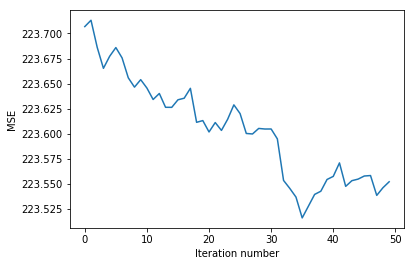

In [120]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


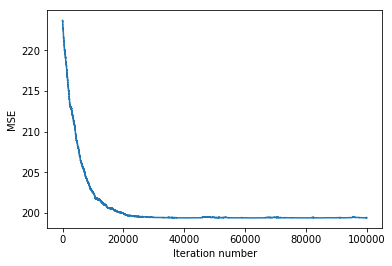

In [121]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [122]:
stoch_grad_desc_weights

array([ 0.        ,  3.81037337,  2.84603024,  0.09618347])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [123]:
stoch_errors_by_iter[-1]

199.44592385656728

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [103]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

199.445923857


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**